In [0]:
# import files
from google.colab import files
files.upload()

Saving Life Expectancy Data.csv to Life Expectancy Data.csv


{'Life Expectancy Data.csv': b"Country,Year,Status,Life expectancy ,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles , BMI ,under-five deaths ,Polio,Total expenditure,Diphtheria , HIV/AIDS,GDP,Population, thinness  1-19 years, thinness 5-9 years,Income composition of resources,Schooling\r\nAfghanistan,2015,Developing,65,263,62,0.01,71.27962362,65,1154,19.1,83,6,8.16,65,0.1,584.25921,33736494,17.2,17.3,0.479,10.1\r\nAfghanistan,2014,Developing,59.9,271,64,0.01,73.52358168,62,492,18.6,86,58,8.18,62,0.1,612.696514,327582,17.5,17.5,0.476,10\r\nAfghanistan,2013,Developing,59.9,268,66,0.01,73.21924272,64,430,18.1,89,62,8.13,64,0.1,631.744976,31731688,17.7,17.7,0.47,9.9\r\nAfghanistan,2012,Developing,59.5,272,69,0.01,78.1842153,67,2787,17.6,93,67,8.52,67,0.1,669.959,3696958,17.9,18,0.463,9.8\r\nAfghanistan,2011,Developing,59.2,275,71,0.01,7.097108703,68,3013,17.2,97,68,7.87,68,0.1,63.537231,2978599,18.2,18.2,0.454,9.5\r\nAfghanistan,2010,Developing,58.8,279,74,

In [0]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.decomposition import TruncatedSVD
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import PolynomialFeatures
import operator

import matplotlib.pyplot as plt

# Some useful functions

In [0]:
def plot_data(data, column_x, column_y, x_label, y_label):
  plt.scatter(data[column_x], data[column_y])
  plt.xlabel(x_label)
  plt.ylabel(y_label)
  
  
def plot_expected_and_trained_data(data_X, data_y_expected, data_y_predicted):
  # apply PCA to reduce dimensionality to 1
  clf = TruncatedSVD(n_components=1)
  Xpca = clf.fit_transform(data_X)
  
  # make the figure bigger
  plt.figure(num=None, figsize=(30, 15), dpi=80, facecolor='w', edgecolor='k')
  
  # Scatter expected data with RED
  plt.scatter(Xpca, data_y_expected,  color='red')
  # Scatter predicted data with BLUE
  plt.scatter(Xpca, data_y_predicted, color='blue')
  
  plt.show()

def pretty_print_coeficients_linear_regression(model):
  columns = ["Adult Mortality", "Alcohol", "Hepatitis B", "Measles ", " BMI ", "Polio", "Total expenditure", "Diphtheria ", "GDP", "Status"]
  epsilon = model.intercept_
  coeficients = list(model.coef_)
  for column, coeficient in zip(columns, coeficients):
    print(column + ": " + str(coeficient))
  print("Most important coeficient: ", columns[coeficients.index(max(coeficients))])
  print("Epsilon: ", str(epsilon))
  
def pretty_print_coeficients_decision_tree(model):
  columns = ["Adult Mortality", "Alcohol", "Hepatitis B", "Measles ", " BMI ", "Polio", "Total expenditure", "Diphtheria ", "GDP", "Status"]
  coeficients = list(model.feature_importances_)
  for column, coeficient in zip(columns, coeficients):
    print(column + ": " + str(coeficient))
  print("Most important coeficient: ", columns[coeficients.index(max(coeficients))])
  
def pretty_print_coeficients_poly_linear_regression(model):
  epsilon = model.intercept_
  coeficients = list(model.coef_)
  
  print("Coeficients for combinations between columns of power = 0 or 1 or 2 or 3 - (ex: a, b, c, a * b * c^3, c^3)")
  print(coeficients)
  print("Epsilon: ", str(epsilon))
  
  
def pretty_print_coeficients_poly_decision_tree(model):
  coeficients = list(model.feature_importances_)
  
  print("Coeficients for combinations between columns of power = 0 or 1 or 2 or 3 - (ex: a, b, c, a * b * c^3, c^3)")
  print(coeficients)
  
  
def plot_y_difference(y_test, y_predicted):
  dif = [abs(x - y) for (x, y) in zip(y_test.tolist(), y_predicted.tolist())]
  arr = list(range(len(dif)))
  plt.figure(1)
  plt.xlabel("Number")
  plt.ylabel("Difference")
  plt.plot(arr, dif)
  plt.show()
  plt.figure(2)
  plt.xlabel("Number")
  plt.ylabel("Difference")
  plt.scatter(arr, dif)
  plt.show()

In [0]:
# some constants
file_name = "Life Expectancy Data.csv"
used_columns = [ "Status", "Life expectancy ", "Adult Mortality", "Alcohol", "Hepatitis B", "Measles ", " BMI ", "Polio", "Total expenditure", "Diphtheria ", "GDP"]

In [0]:
# read data and selecte only the used columns
data = pd.read_csv(file_name)
data = data[used_columns]

# Plotting Data

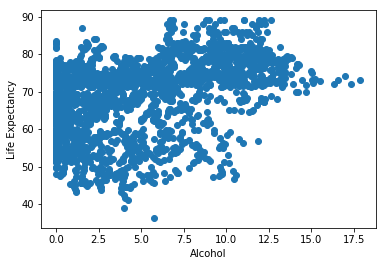

In [0]:
plot_data(data,  "Alcohol", "Life expectancy ",  "Alcohol", "Life Expectancy")

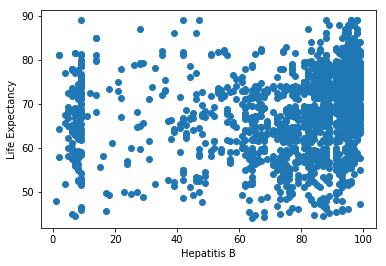

In [0]:
plot_data(data, "Hepatitis B", "Life expectancy ",  "Hepatitis B", "Life Expectancy")

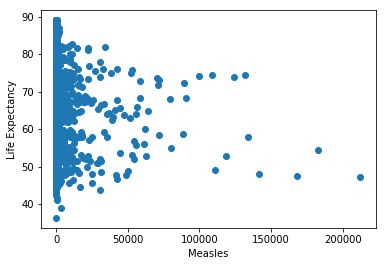

In [0]:
plot_data(data,  "Measles ", "Life expectancy ", "Measles", "Life Expectancy")

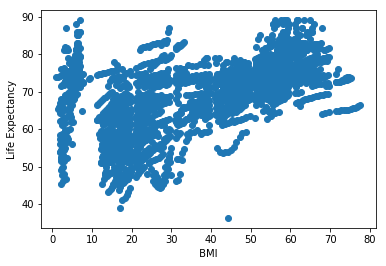

In [0]:
plot_data(data,  " BMI ", "Life expectancy ",  " BMI ", "Life Expectancy")

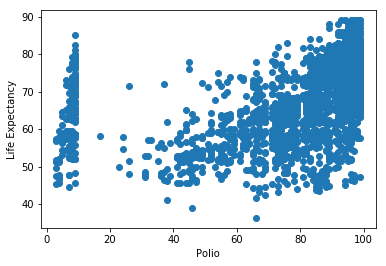

In [0]:
plot_data(data,  "Polio", "Life expectancy ", "Polio", "Life Expectancy")

In [0]:
plot_data(data, "Total expenditure", "Life expectancy ", "Total expenditure", "Life Expectancy")

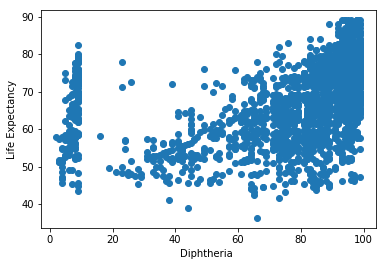

In [0]:
plot_data(data,  "Diphtheria ", "Life expectancy ", "Diphtheria ", "Life Expectancy")

In [0]:
plot_data(data, "GDP", "Life expectancy ",  "GDP", "Life Expectancy")

In [0]:
# are there any NaN values?
data.isna().sum()

Status                 0
Life expectancy       10
Adult Mortality       10
Alcohol              194
Hepatitis B          553
Measles                0
 BMI                  34
Polio                 19
Total expenditure    226
Diphtheria            19
GDP                  448
dtype: int64

In [0]:
# there are NaN values -> replace NaN with mean values
data.fillna(value=data.mean(), inplace = True)
data.isna().sum()

Status               0
Life expectancy      0
Adult Mortality      0
Alcohol              0
Hepatitis B          0
Measles              0
 BMI                 0
Polio                0
Total expenditure    0
Diphtheria           0
GDP                  0
dtype: int64

# Data Manipulation

In [0]:
# Split data into features and labels
Y = data["Life expectancy "]
X = data.drop(["Life expectancy "], axis=1)

# Data Normalization

In [0]:
# Handle "Status" column which is categorical
categorical_columns = ["Status"]
for column in categorical_columns:
    label_encoder = LabelEncoder()
    unique_columns = set(X[column].tolist())
    unique_columns = {key: value for key, value in zip(range(len(unique_columns)), unique_columns)}
    X[column + "_encoded"] = label_encoder.fit_transform(X[column])
    X = X.drop(column, axis=1) # drop the old collumns

In [0]:
# Normalization
# Normalize X
X["Adult Mortality"] = X["Adult Mortality"] / 1000.0
X["Alcohol"] = (X["Alcohol"] - X["Alcohol"].min()) / (X["Alcohol"].max() - X["Alcohol"].min())
X["Hepatitis B"] = X["Hepatitis B"] / 100.0
X["Measles "] = X["Measles "] / 1000.0
X[" BMI "] = (X[" BMI "] - X[" BMI "].min()) / (X[" BMI "].max() - X[" BMI "].min())
X["Polio"] = X["Polio"] / 100.0
X["Total expenditure"] = X["Total expenditure"] / 100.0
X["Diphtheria "] = X["Diphtheria "] / 100.0
X["GDP"] = (X["GDP"] - X["GDP"].min()) / (X["GDP"].max() - X["GDP"].min())


# Data Split - Train / Test

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.15) # split data into train and test

In [0]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(2497, 10)
(2497,)
(441, 10)
(441,)


In [0]:
# Also try a polynomial transformer
poly_features_transformer = PolynomialFeatures(3, interaction_only = True)
poly_features_transformer.fit(X)
X_train_poly = poly_features_transformer.transform(X_train)
X_test_poly = poly_features_transformer.transform(X_test)

# Linear Regression

LinearRegression {}
Mean squared error: 30.146428815485145
Variance: 0.677851869802738
Adult Mortality: -35.81561698315162
Alcohol: 3.2814287538429996
Hepatitis B: -1.6632337316706889
Measles : -0.044075095427570155
 BMI : 8.791016049043527
Polio: 4.277993190261097
Total expenditure: -1.9862848997745952
Diphtheria : 6.419089091587809
GDP: 10.601138223616474
Status: -2.69909750756497
Most important coeficient:  GDP
Epsilon:  64.78478854594432
--------------------------------------------------------------------------------------------------------



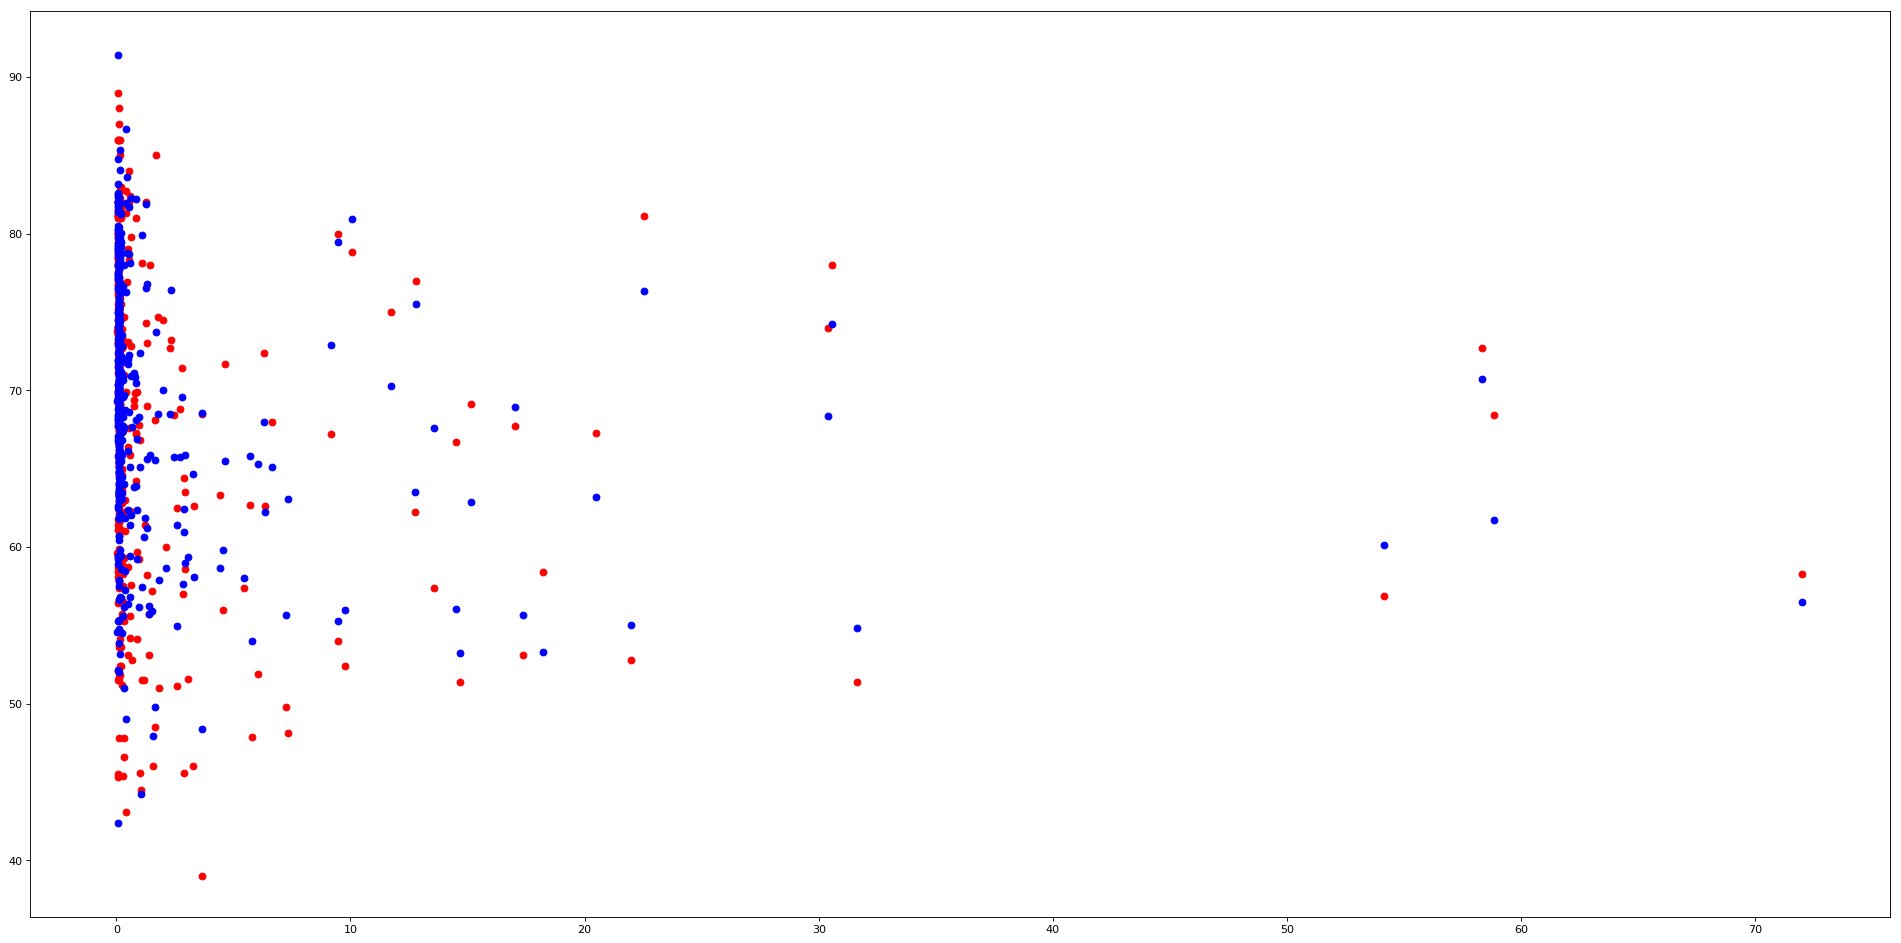

In [0]:
linear_regression_models = [(LinearRegression, {})]

for i, (Model, kwargs) in enumerate(linear_regression_models):
  model = Model(**kwargs)
  model.fit(X_train, y_train)
  y_predicted = model.predict(X_test)
  mse = mean_squared_error(y_test, y_predicted)
  variance = r2_score(y_test, y_predicted)

  print(Model.__name__, kwargs)
  print("Mean squared error:", mse)
  print("Variance:", r2_score(y_test, y_predicted))
  pretty_print_coeficients_linear_regression(model)
  print("--------------------------------------------------------------------------------------------------------")
  print()
  
  plot_y_difference(y_test, y_predicted)
  plot_expected_and_trained_data(X_test, y_test, y_predicted)

# Linear Regression - Polynomial Features

LinearRegression {}
Mean squared error: 31.638292416596354
Variance: 0.6619096475067272
Coeficients for combinations between columns of power = 0 or 1 or 2 or 3 - (ex: a, b, c, a * b * c^3, c^3)
[-4807994561549.169, -43.964708108222105, 18.302337850753194, 52.174197870625186, 8.764252517096647, -39.6158670372181, 10.64548056071705, 547.5054504929004, 79.76378522729055, -180.97727938912627, 41.61066538128197, 50.677683784981745, 34.60679724118269, -11.328101530493887, -62.96974326117519, -114.95382818020705, 620.4590788377252, -5.7765905187448325, -391.31640378711165, 63.02001206904555, -12.1675832711121, -3.502169601832078, 40.38800455989699, -6.89715990134732, -209.1423304137392, -13.846327966187154, 223.84710174675573, -15.30289329376141, -5.461122861773286, 59.34435259711154, -33.8517139003031, -712.3713018267798, -5.097155184964354, 24.420487689645633, -57.88377636061679, 7.745756971828214, -11.512080094025691, -20.256435616580163, 7.127266355118195, -16.123792134937744, -8.3385277

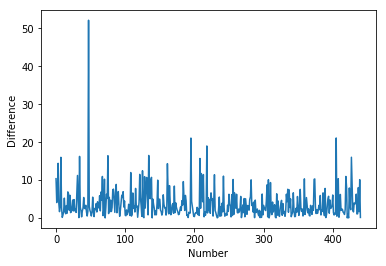

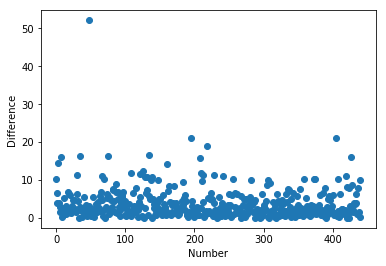

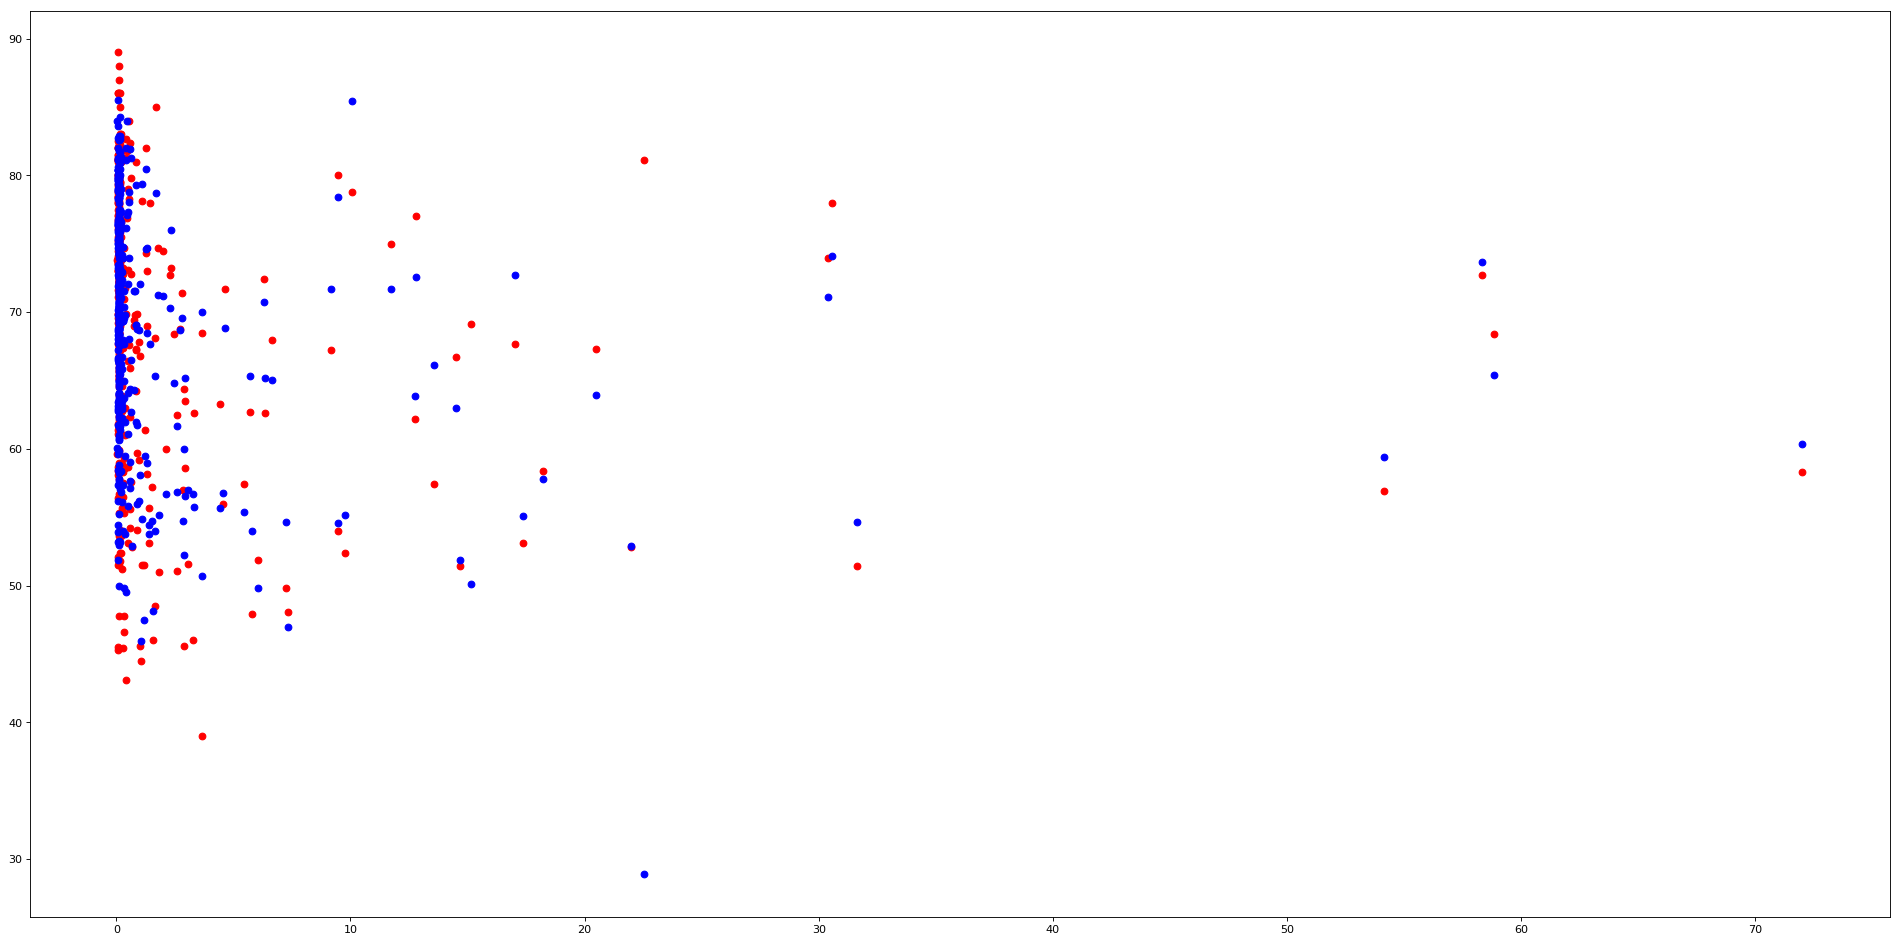

In [0]:
linear_regression_models = [(LinearRegression, {})]


for i, (Model, kwargs) in enumerate(linear_regression_models):
  model = Model(**kwargs)
  model.fit(X_train_poly, y_train)
  y_predicted = model.predict(X_test_poly)
  mse = mean_squared_error(y_test, y_predicted)
  variance = r2_score(y_test, y_predicted)

  print(Model.__name__, kwargs)
  print("Mean squared error:", mse)
  print("Variance:", r2_score(y_test, y_predicted))
  pretty_print_coeficients_poly_linear_regression(model)
  print("--------------------------------------------------------------------------------------------------------")
  print()
  
  plot_y_difference(y_test, y_predicted)
  plot_expected_and_trained_data(X_test, y_test, y_predicted)

# Decision Trees - Regression

DecisionTreeRegressor {}
Mean squared error: 9.250913984001263
Variance: 0.9011436923158571
Adult Mortality: 0.7001024673692358
Alcohol: 0.015494950093067188
Hepatitis B: 0.004153079496308496
Measles : 0.006209456665465432
 BMI : 0.08287592143511127
Polio: 0.007530070517442699
Total expenditure: 0.010481496871210437
Diphtheria : 0.103715637141838
GDP: 0.023376397632854803
Status: 0.046060522777465925
Most important coeficient:  Adult Mortality
--------------------------------------------------------------------------------------------------------



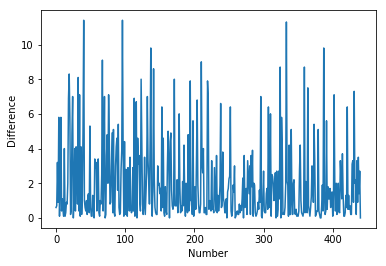

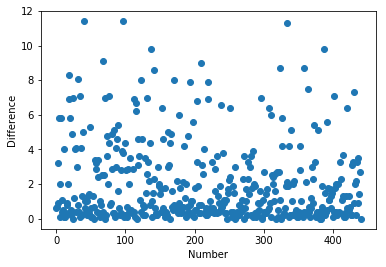

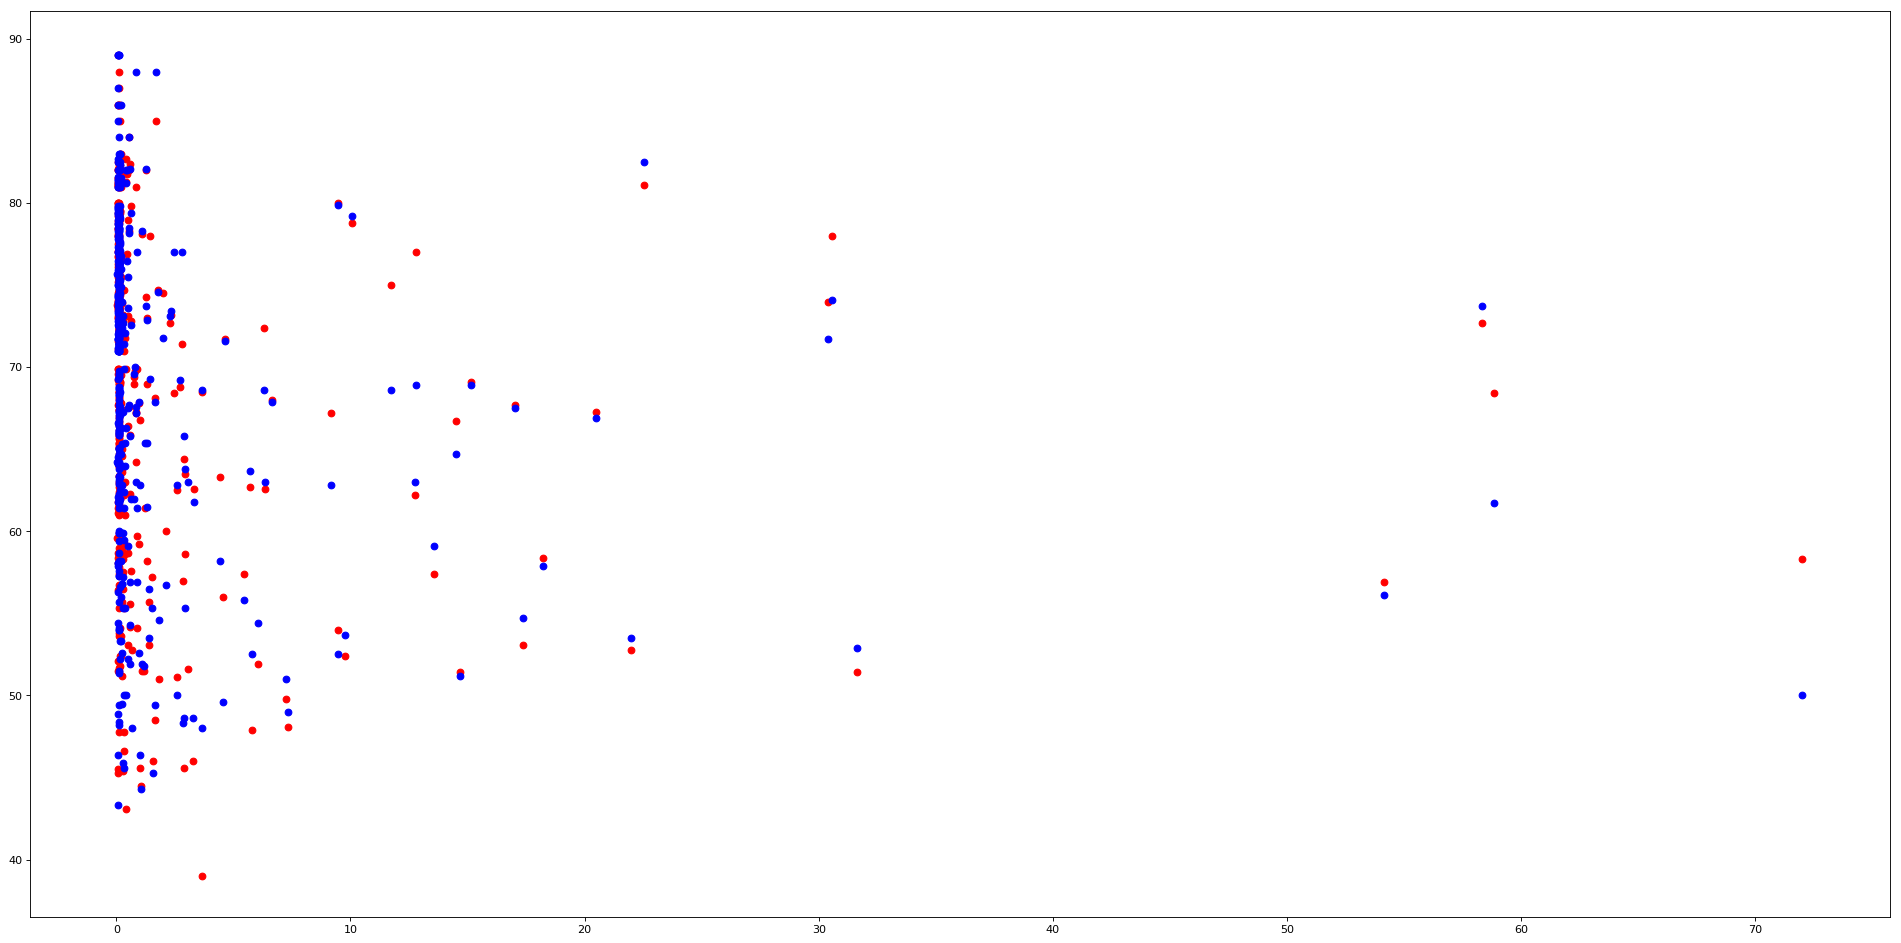

DecisionTreeRegressor {'max_depth': 2}
Mean squared error: 40.29272039416628
Variance: 0.5694274563999344
Adult Mortality: 0.846702754652063
Alcohol: 0.0
Hepatitis B: 0.0
Measles : 0.0
 BMI : 0.0
Polio: 0.0
Total expenditure: 0.0
Diphtheria : 0.15329724534793707
GDP: 0.0
Status: 0.0
Most important coeficient:  Adult Mortality
--------------------------------------------------------------------------------------------------------



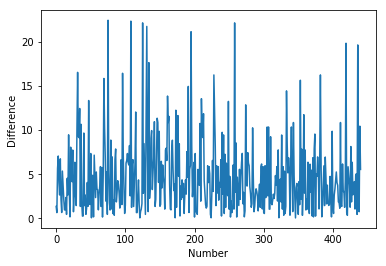

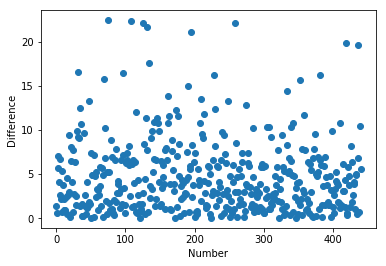

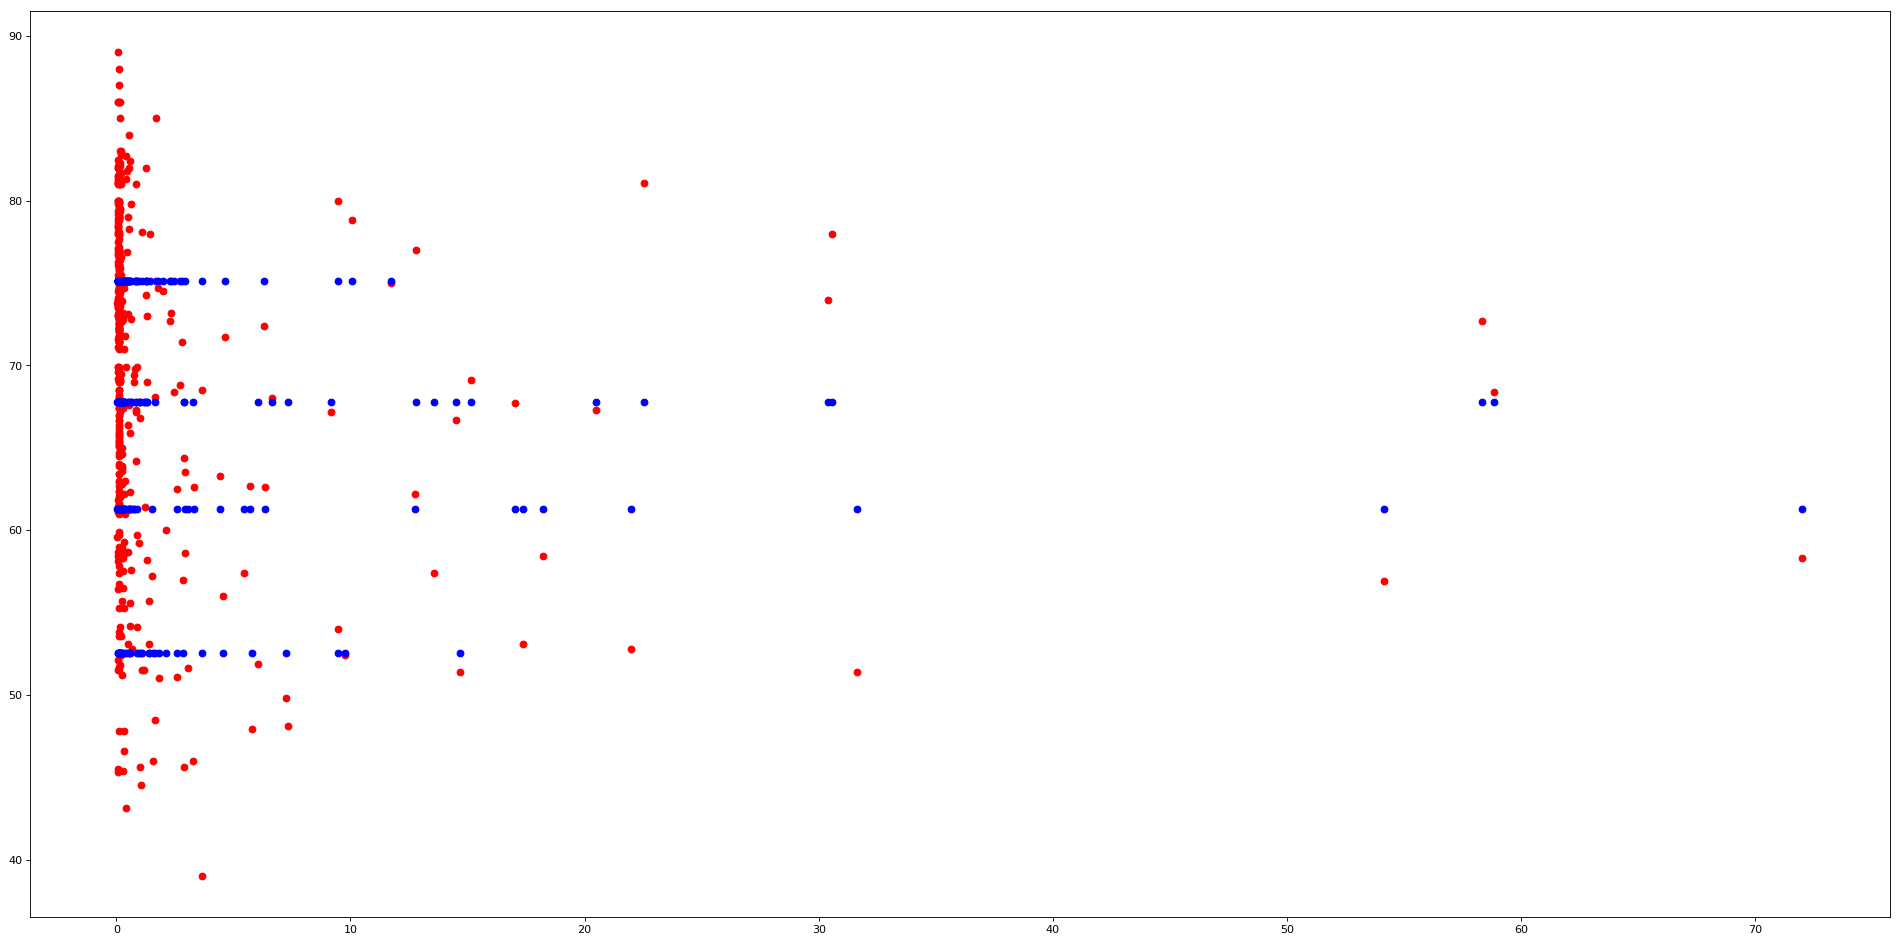

DecisionTreeRegressor {'max_depth': 5}
Mean squared error: 16.774847010077973
Variance: 0.8207420974564683
Adult Mortality: 0.7334513458768399
Alcohol: 0.0
Hepatitis B: 0.0
Measles : 0.0012494404964127803
 BMI : 0.0849648439666728
Polio: 0.004194098141089515
Total expenditure: 0.0
Diphtheria : 0.11392655897806989
GDP: 0.00927422404293196
Status: 0.05293948849798317
Most important coeficient:  Adult Mortality
--------------------------------------------------------------------------------------------------------



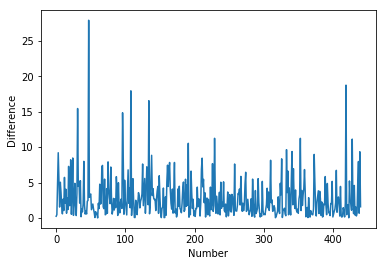

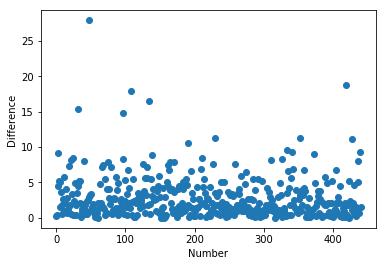

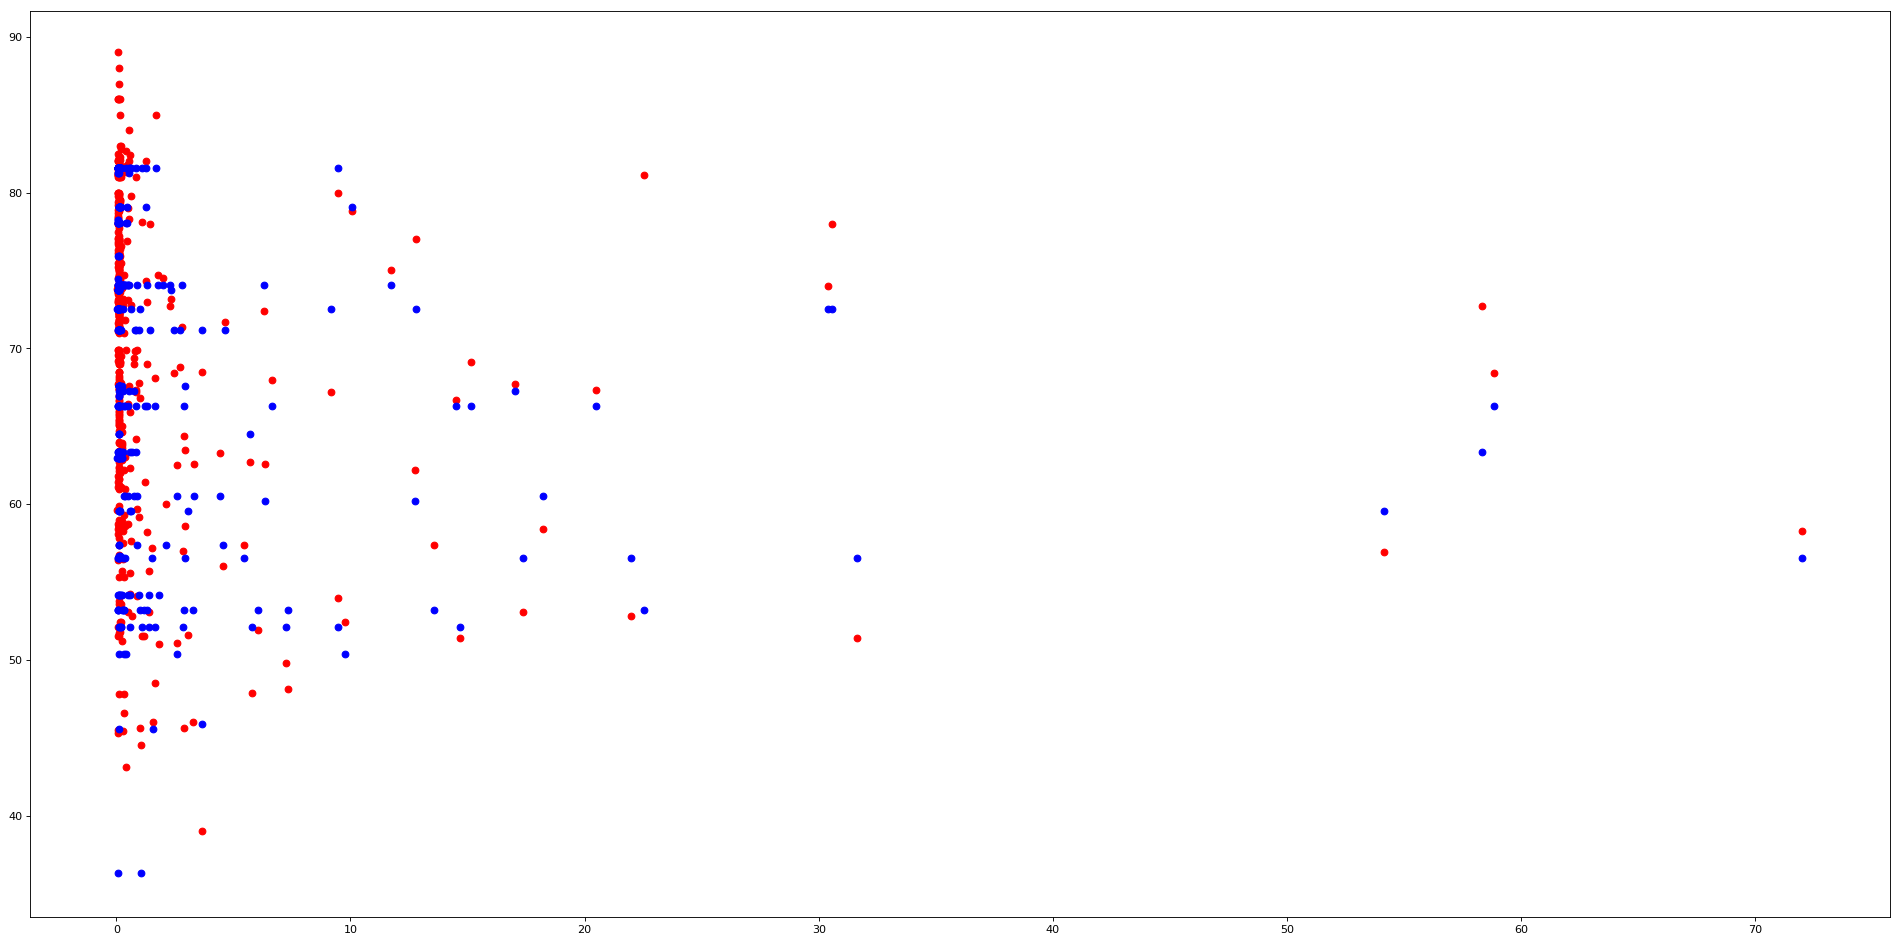

DecisionTreeRegressor {'max_depth': 7}
Mean squared error: 8.463011398465001
Variance: 0.9095633079944385
Adult Mortality: 0.7297418964804965
Alcohol: 0.008100432611747829
Hepatitis B: 0.00038509683225417755
Measles : 0.002700730822135128
 BMI : 0.08149274906806574
Polio: 0.004468722543325335
Total expenditure: 0.002381407469655744
Diphtheria : 0.10746488940650009
GDP: 0.013971323446399076
Status: 0.04929275131942052
Most important coeficient:  Adult Mortality
--------------------------------------------------------------------------------------------------------



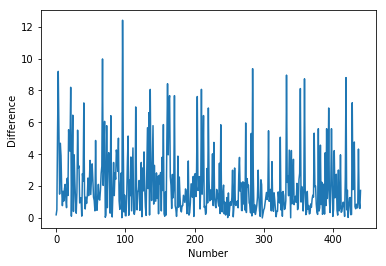

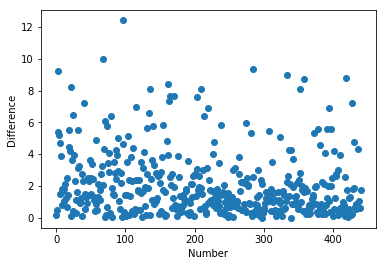

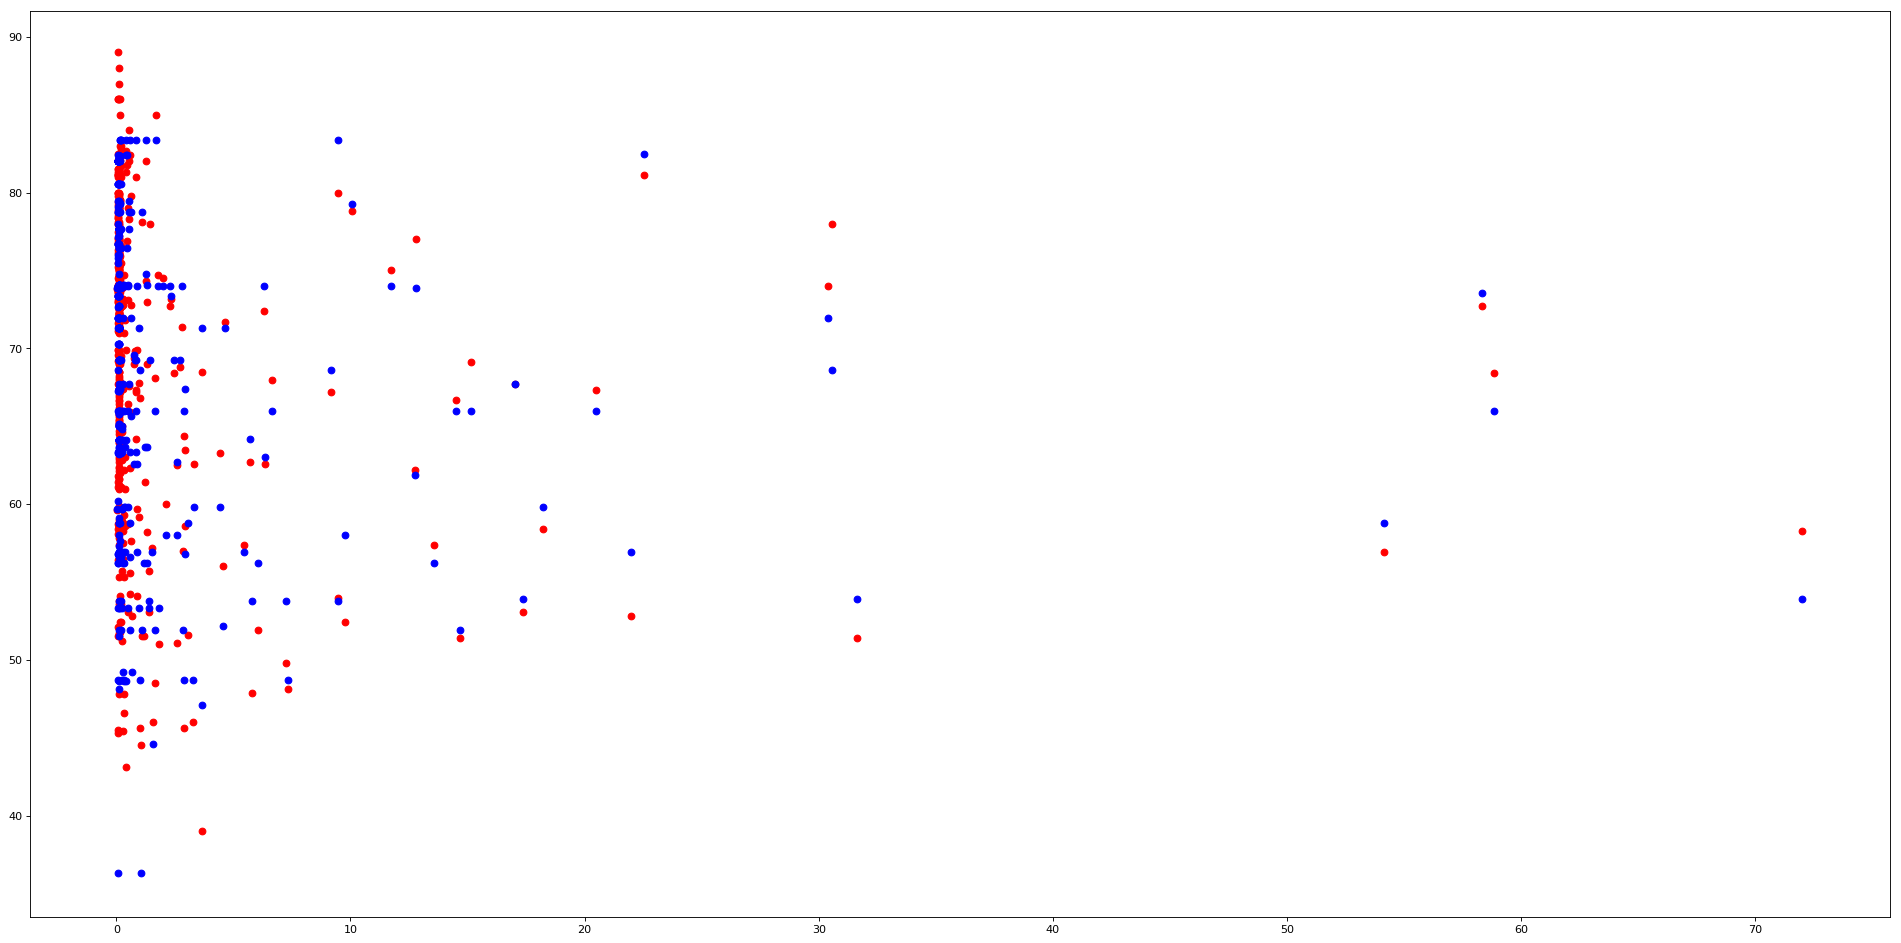

DecisionTreeRegressor {'max_depth': 10}
Mean squared error: 8.242864927880477
Variance: 0.9119158179485164
Adult Mortality: 0.7089073796214358
Alcohol: 0.014159656244599195
Hepatitis B: 0.003368355378824248
Measles : 0.004550153675447889
 BMI : 0.08151245393438936
Polio: 0.006573031082517783
Total expenditure: 0.008108311951544725
Diphtheria : 0.10433914746244707
GDP: 0.017605537529727745
Status: 0.05087597311906611
Most important coeficient:  Adult Mortality
--------------------------------------------------------------------------------------------------------



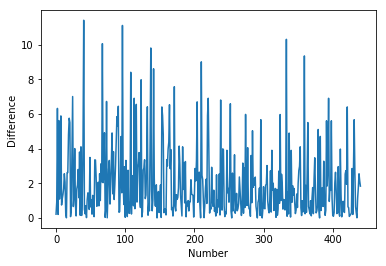

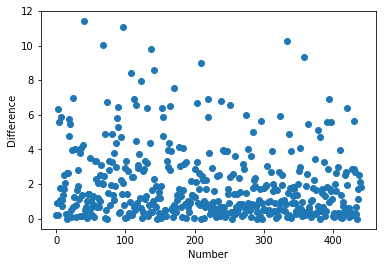

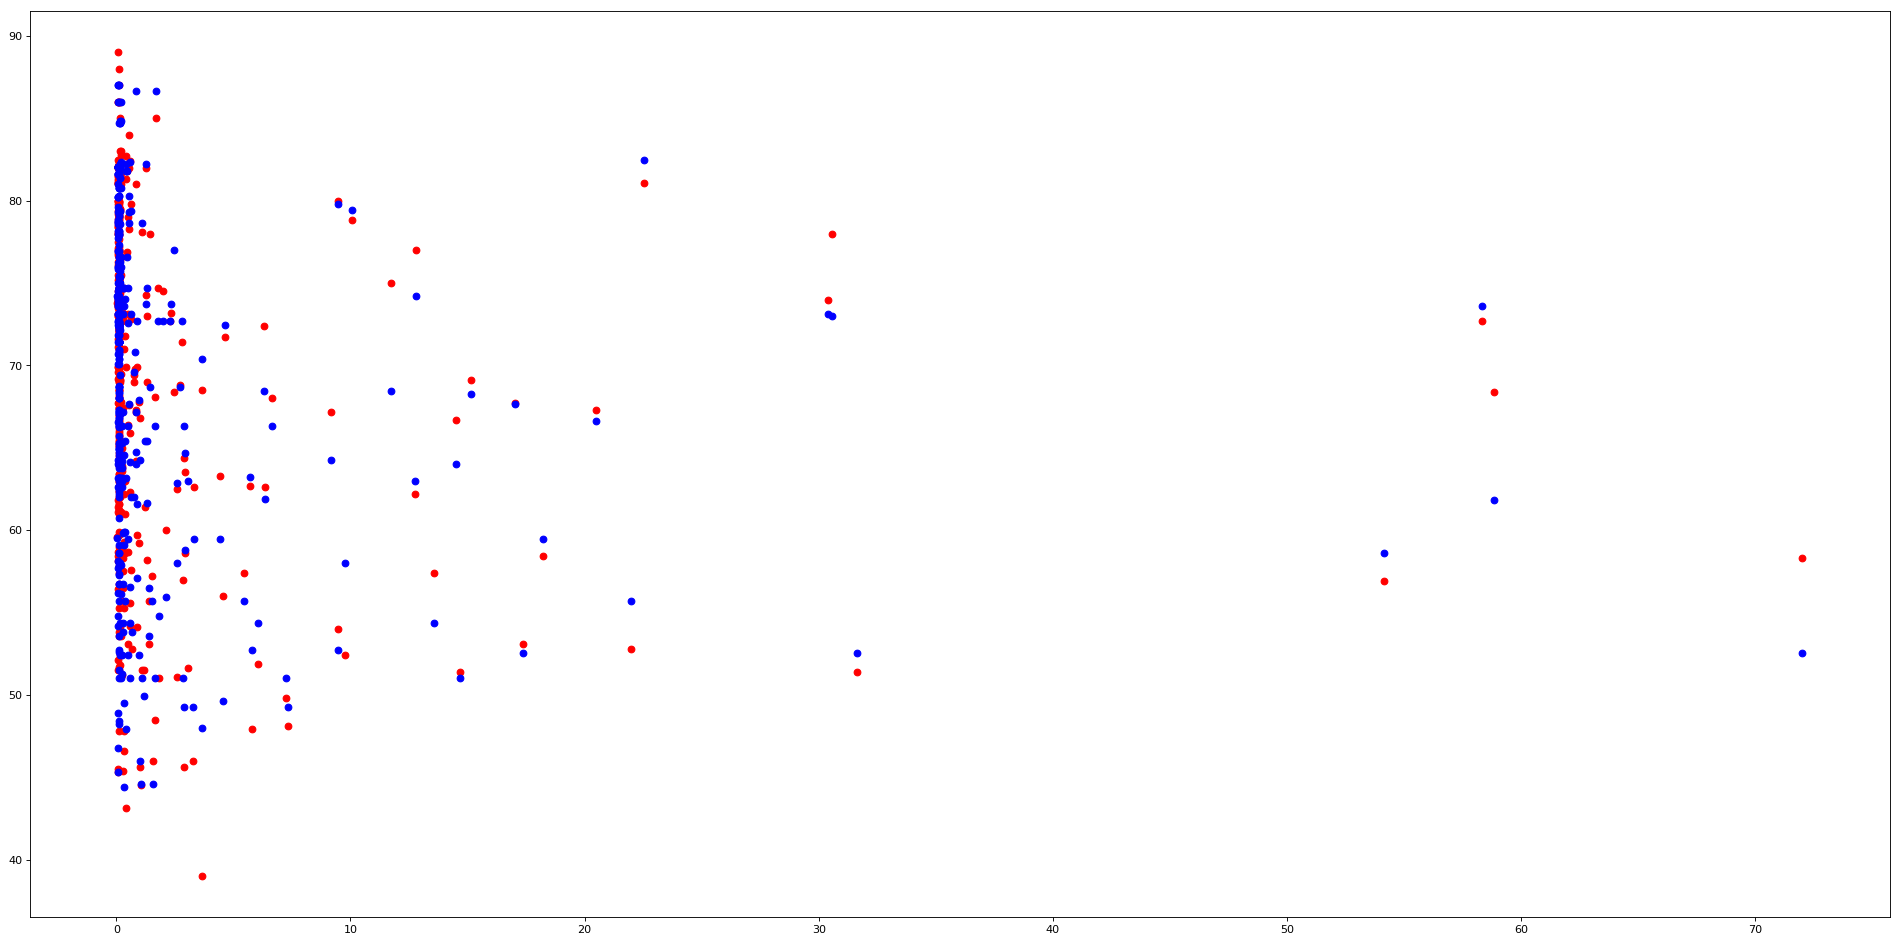

DecisionTreeRegressor {'criterion': 'friedman_mse'}
Mean squared error: 9.199186151734326
Variance: 0.9016964617515321
Adult Mortality: 0.7001266678023627
Alcohol: 0.016210871933998214
Hepatitis B: 0.004873736848693743
Measles : 0.006411919304800469
 BMI : 0.08258196011376387
Polio: 0.00705158880916011
Total expenditure: 0.009091350014415895
Diphtheria : 0.10340121440748427
GDP: 0.024190167987906082
Status: 0.04606052277741467
Most important coeficient:  Adult Mortality
--------------------------------------------------------------------------------------------------------



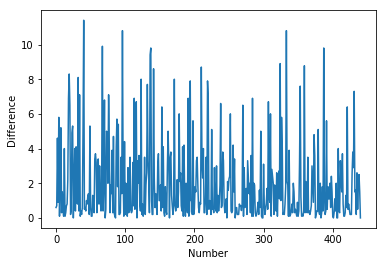

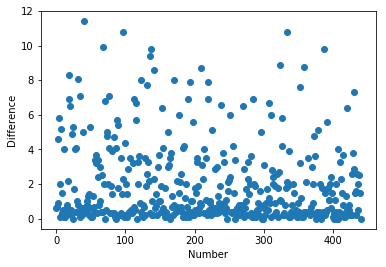

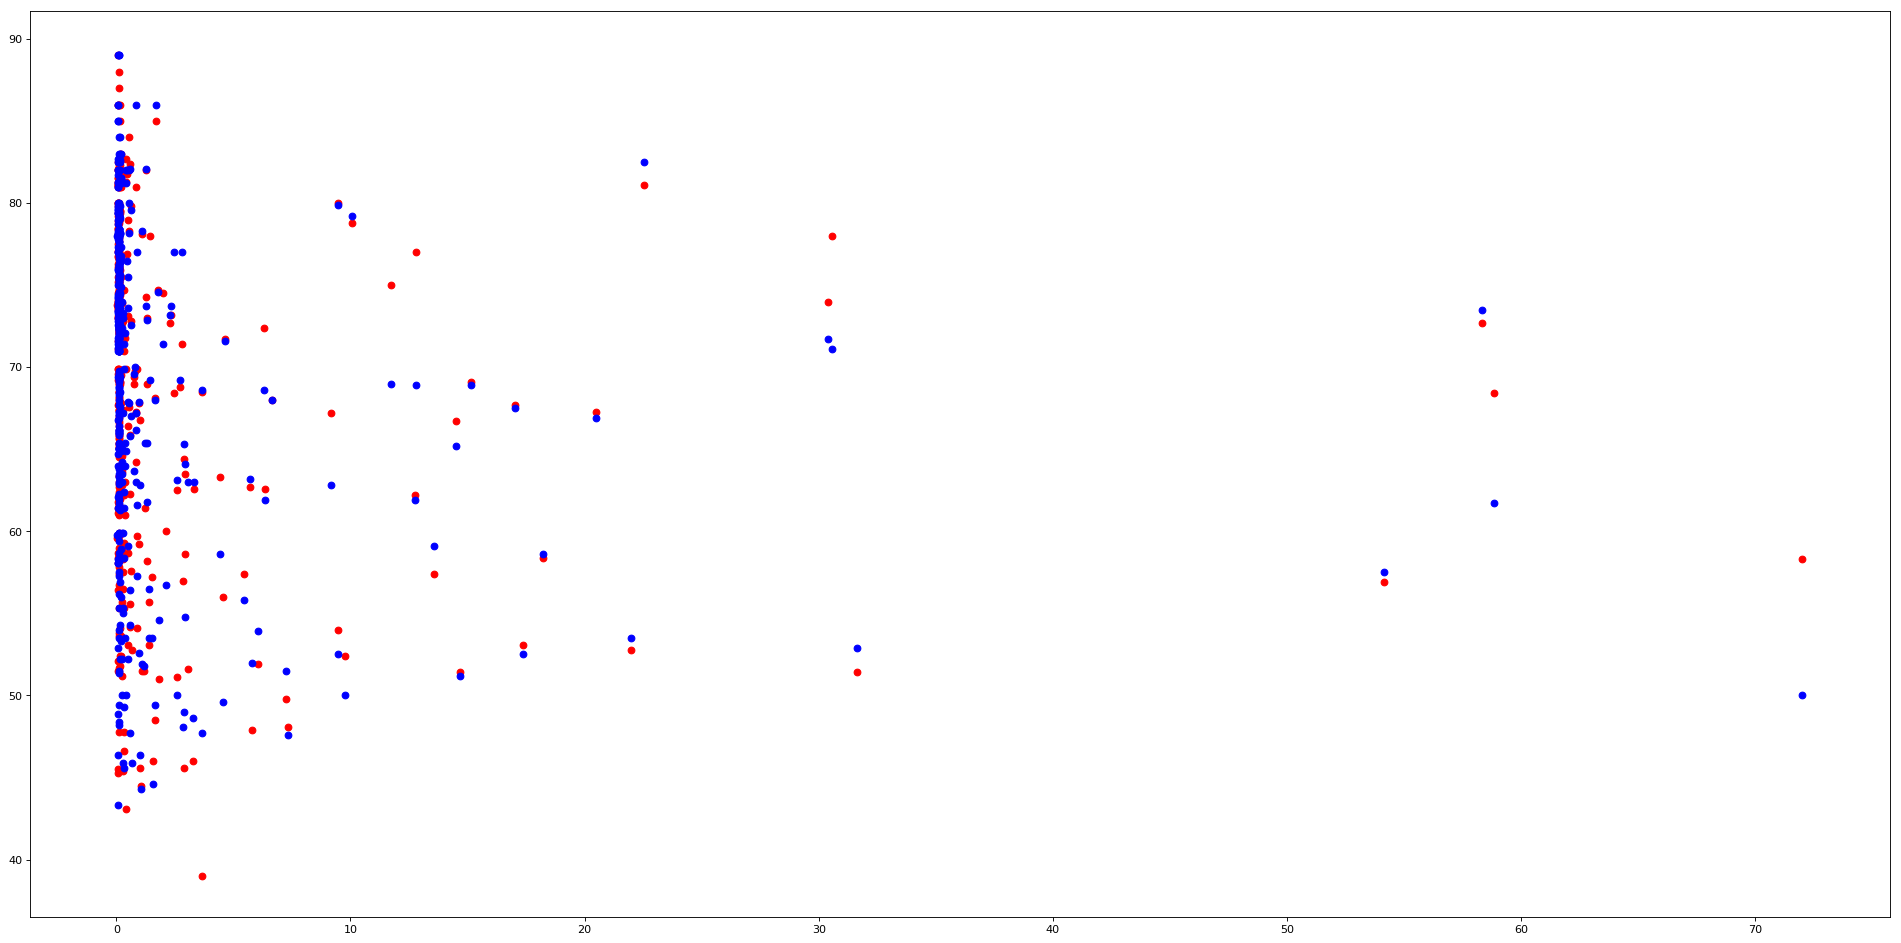

DecisionTreeRegressor {'criterion': 'friedman_mse', 'max_depth': 2}
Mean squared error: 40.292720394166295
Variance: 0.5694274563999342
Adult Mortality: 0.8467027546520689
Alcohol: 0.0
Hepatitis B: 0.0
Measles : 0.0
 BMI : 0.0
Polio: 0.0
Total expenditure: 0.0
Diphtheria : 0.15329724534793113
GDP: 0.0
Status: 0.0
Most important coeficient:  Adult Mortality
--------------------------------------------------------------------------------------------------------



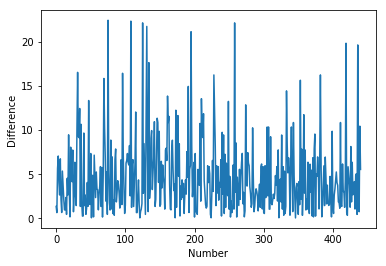

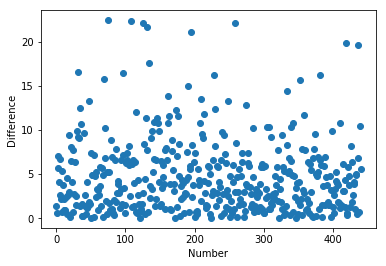

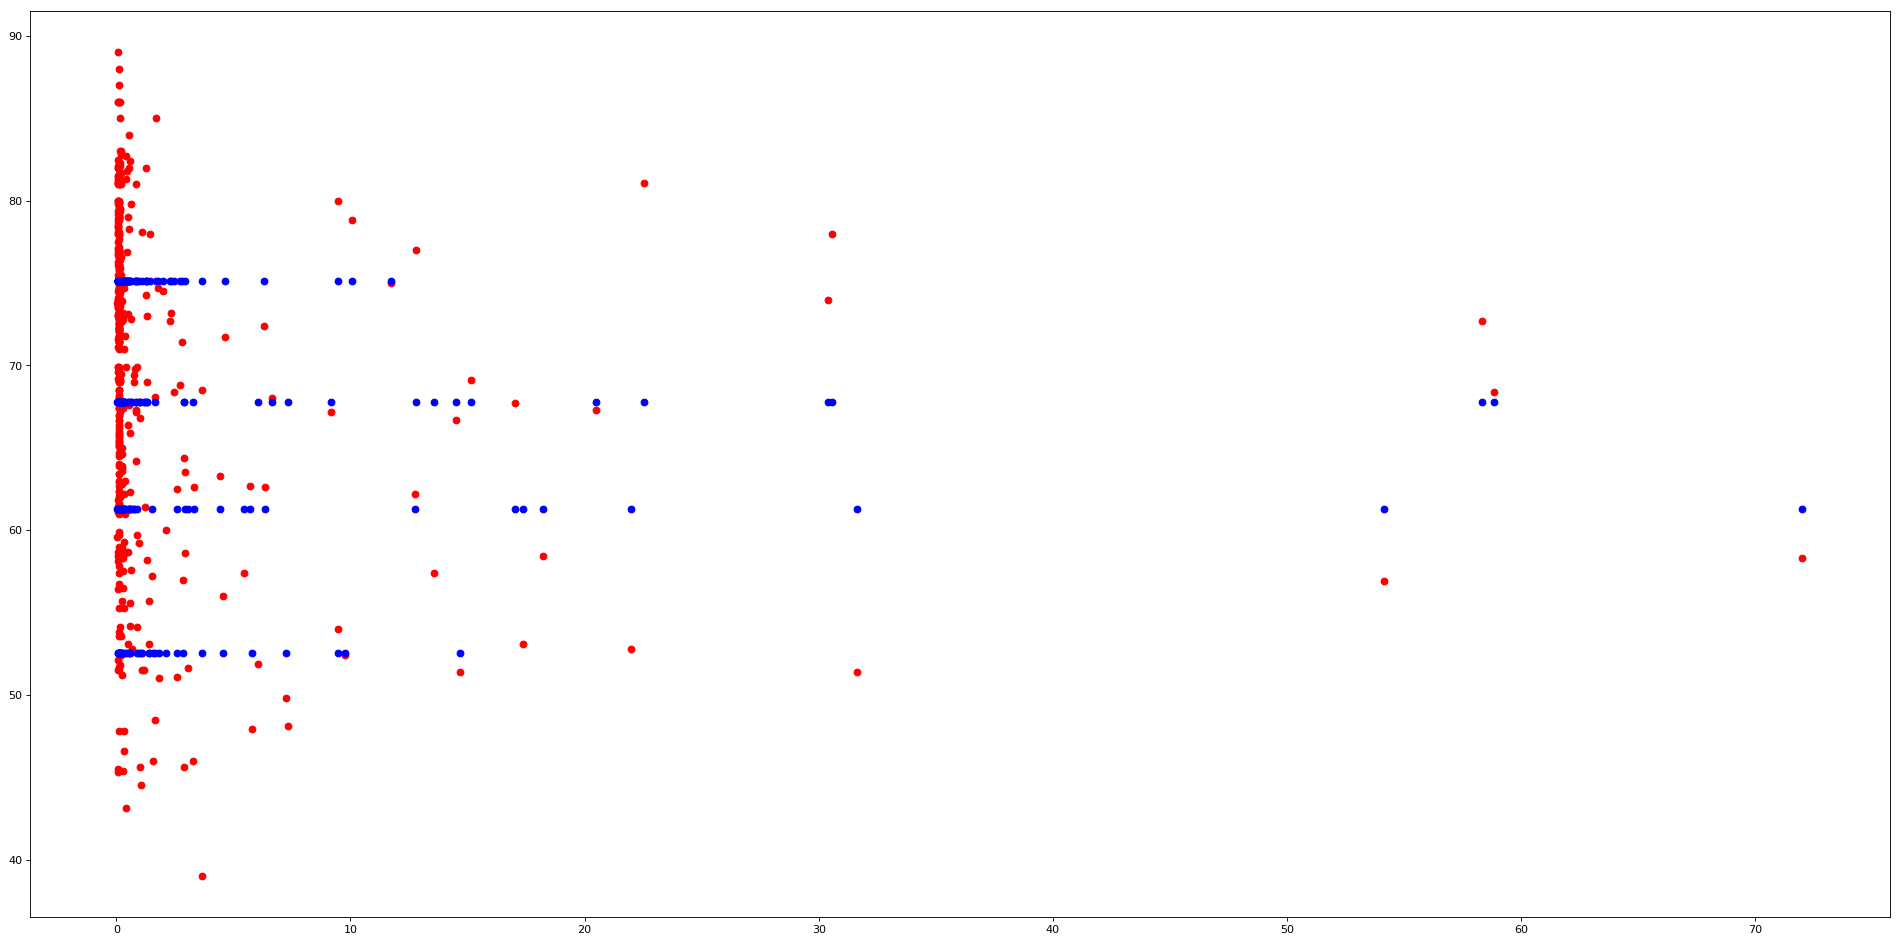

DecisionTreeRegressor {'criterion': 'friedman_mse', 'max_depth': 5}
Mean squared error: 16.433081137062093
Variance: 0.8243942460287313
Adult Mortality: 0.7334513458767641
Alcohol: 0.0
Hepatitis B: 0.0
Measles : 0.0012494404964153041
 BMI : 0.08538487783111107
Polio: 0.0037740642766308286
Total expenditure: 0.0
Diphtheria : 0.11392655897813453
GDP: 0.009274224042973912
Status: 0.05293948849797024
Most important coeficient:  Adult Mortality
--------------------------------------------------------------------------------------------------------



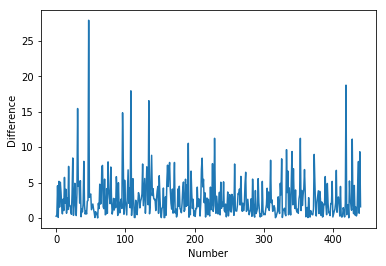

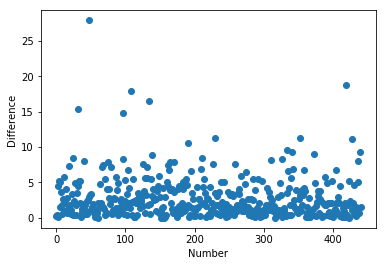

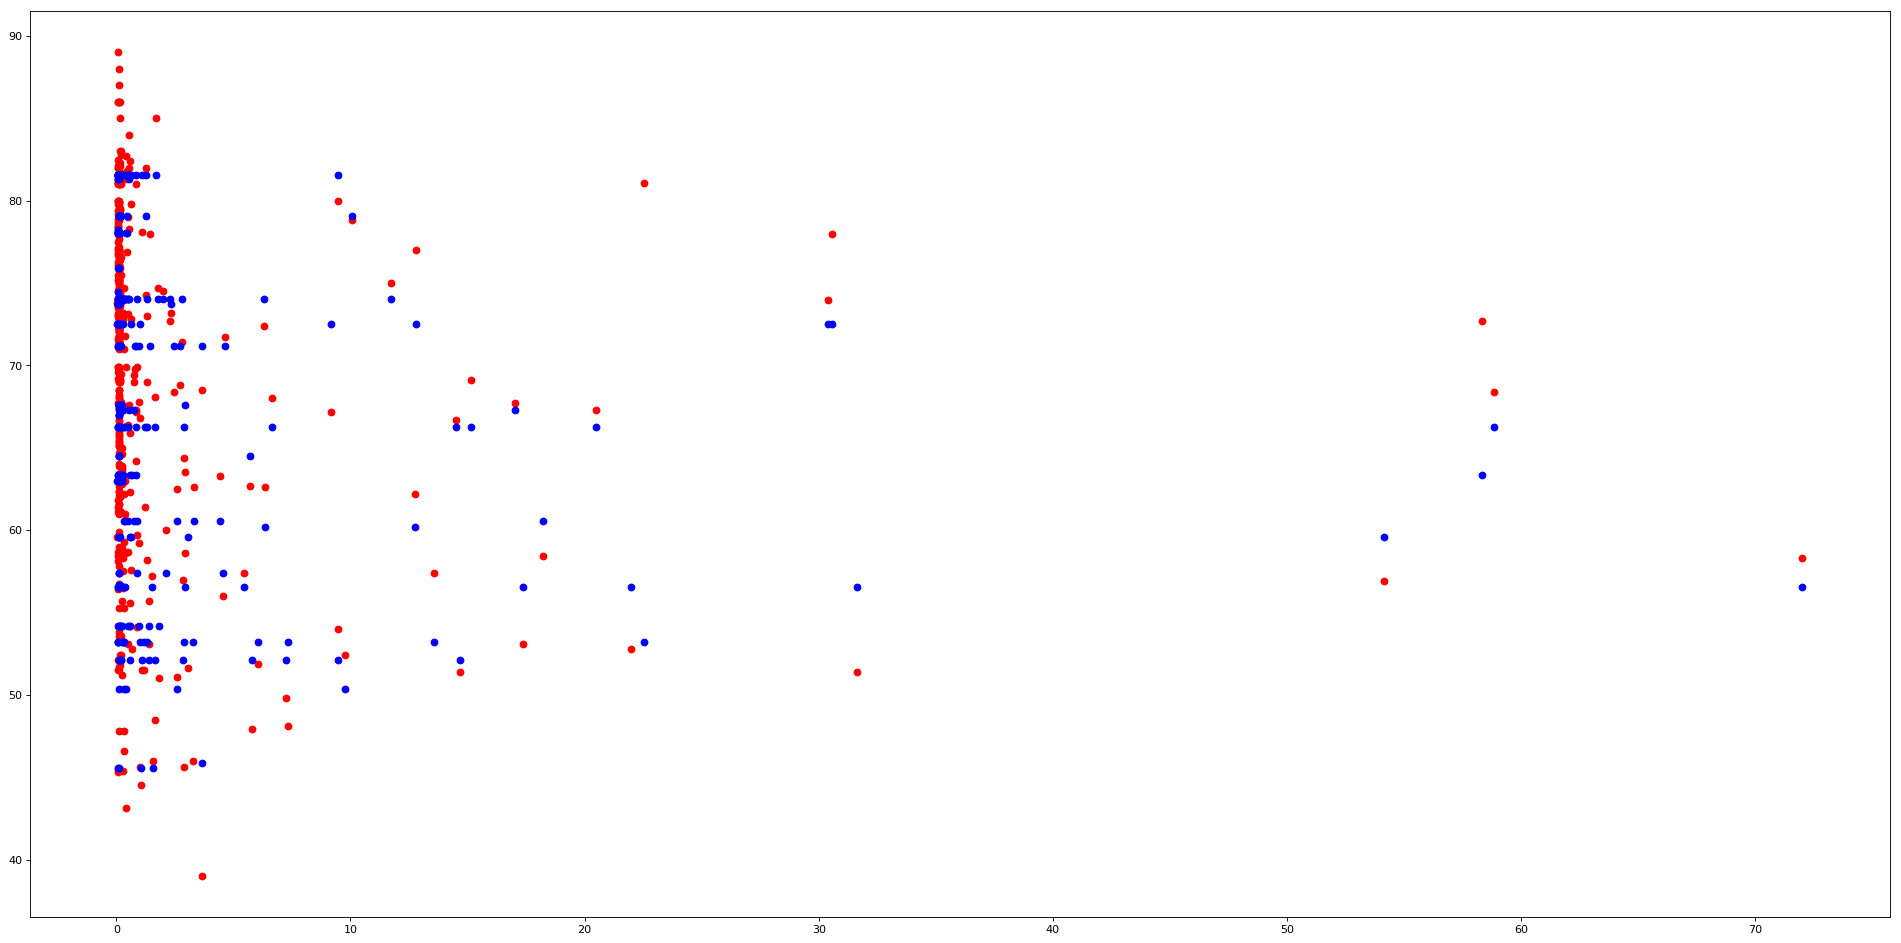

DecisionTreeRegressor {'criterion': 'friedman_mse', 'max_depth': 7}
Mean squared error: 7.94205401818107
Variance: 0.9151303171748004
Adult Mortality: 0.7296181562242097
Alcohol: 0.008129173864368875
Hepatitis B: 0.0003850968322539967
Measles : 0.0027906854021089323
 BMI : 0.08188384889568856
Polio: 0.003982528523480836
Total expenditure: 0.0023440756654327898
Diphtheria : 0.1074691673778067
GDP: 0.0141045158951097
Status: 0.04929275131954005
Most important coeficient:  Adult Mortality
--------------------------------------------------------------------------------------------------------



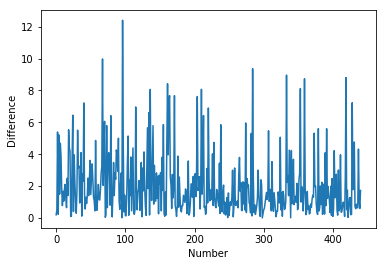

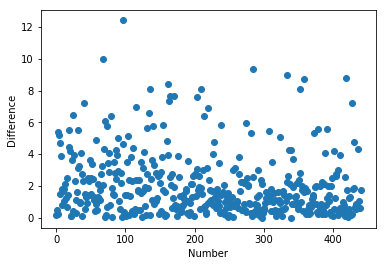

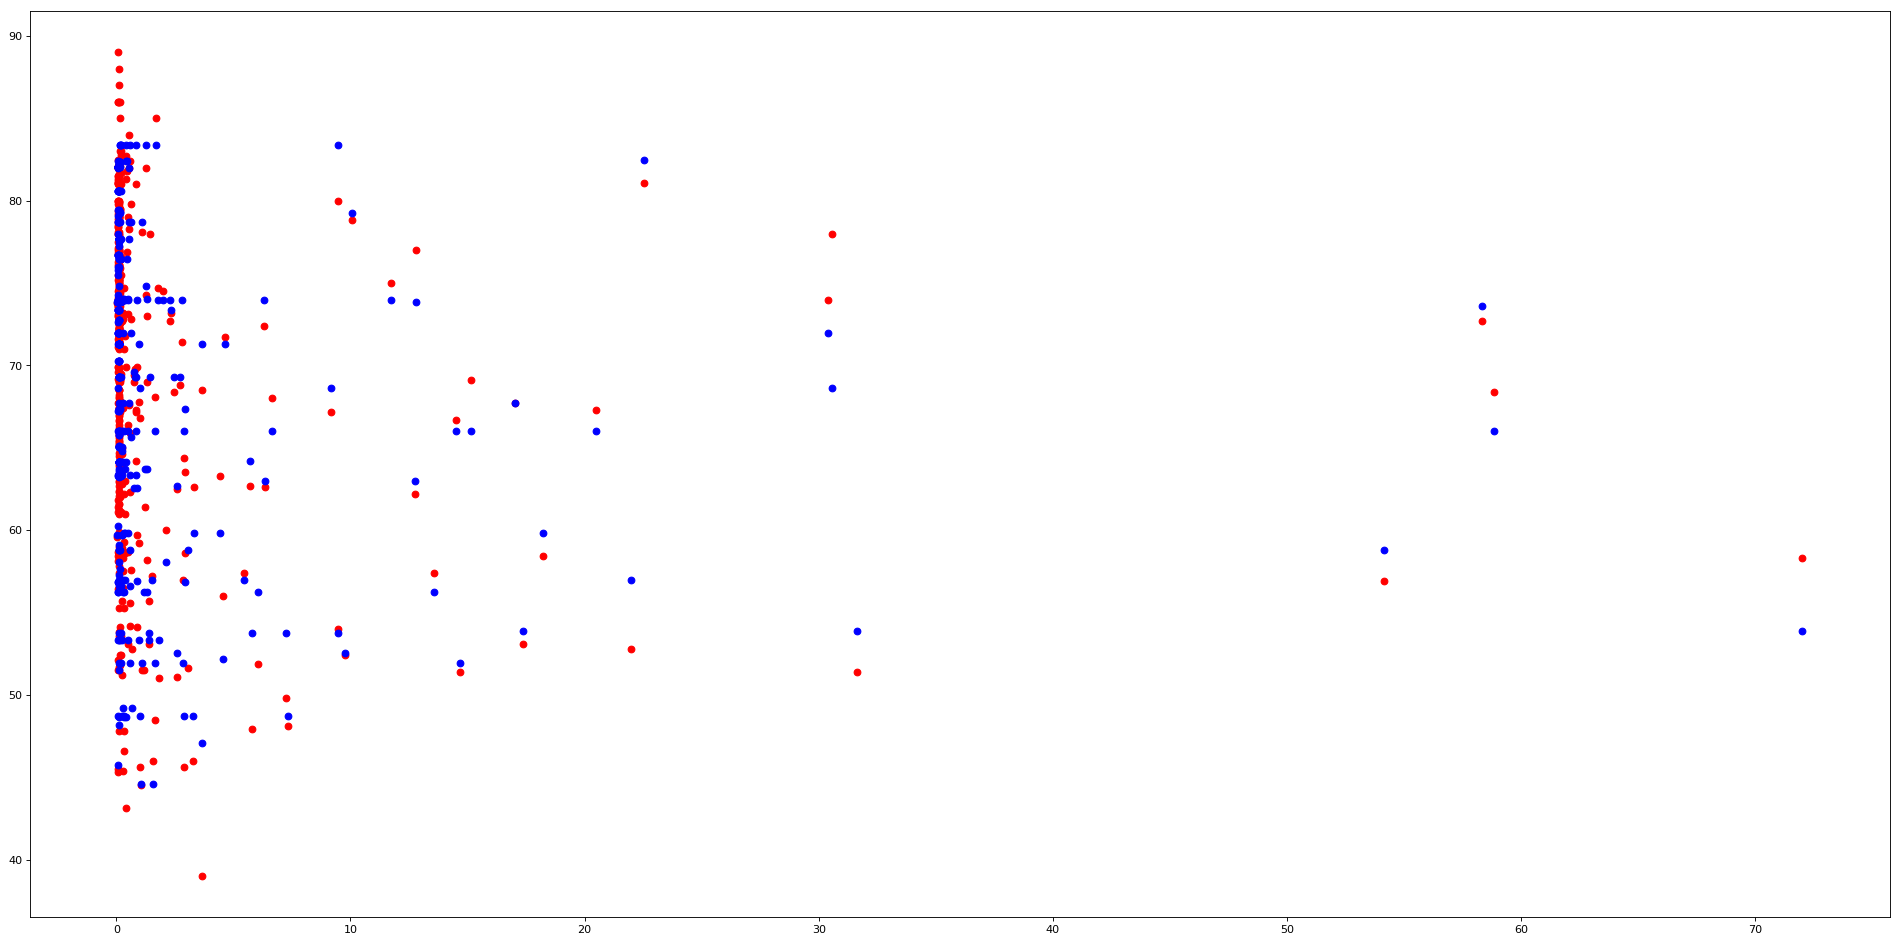

DecisionTreeRegressor {'criterion': 'friedman_mse', 'max_depth': 10}
Mean squared error: 8.218267948226936
Variance: 0.9121786640405821
Adult Mortality: 0.7102020704042424
Alcohol: 0.013360425834675284
Hepatitis B: 0.002918171023572361
Measles : 0.004487625295745847
 BMI : 0.08181753694441114
Polio: 0.0064633417467909885
Total expenditure: 0.0074419111459880834
Diphtheria : 0.10387353662349319
GDP: 0.022509032510367098
Status: 0.04692634847071358
Most important coeficient:  Adult Mortality
--------------------------------------------------------------------------------------------------------



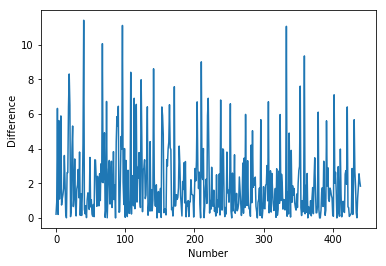

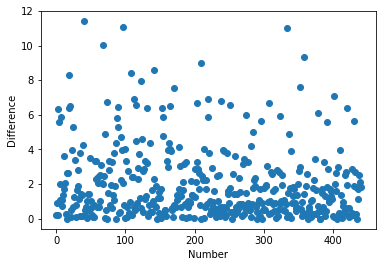

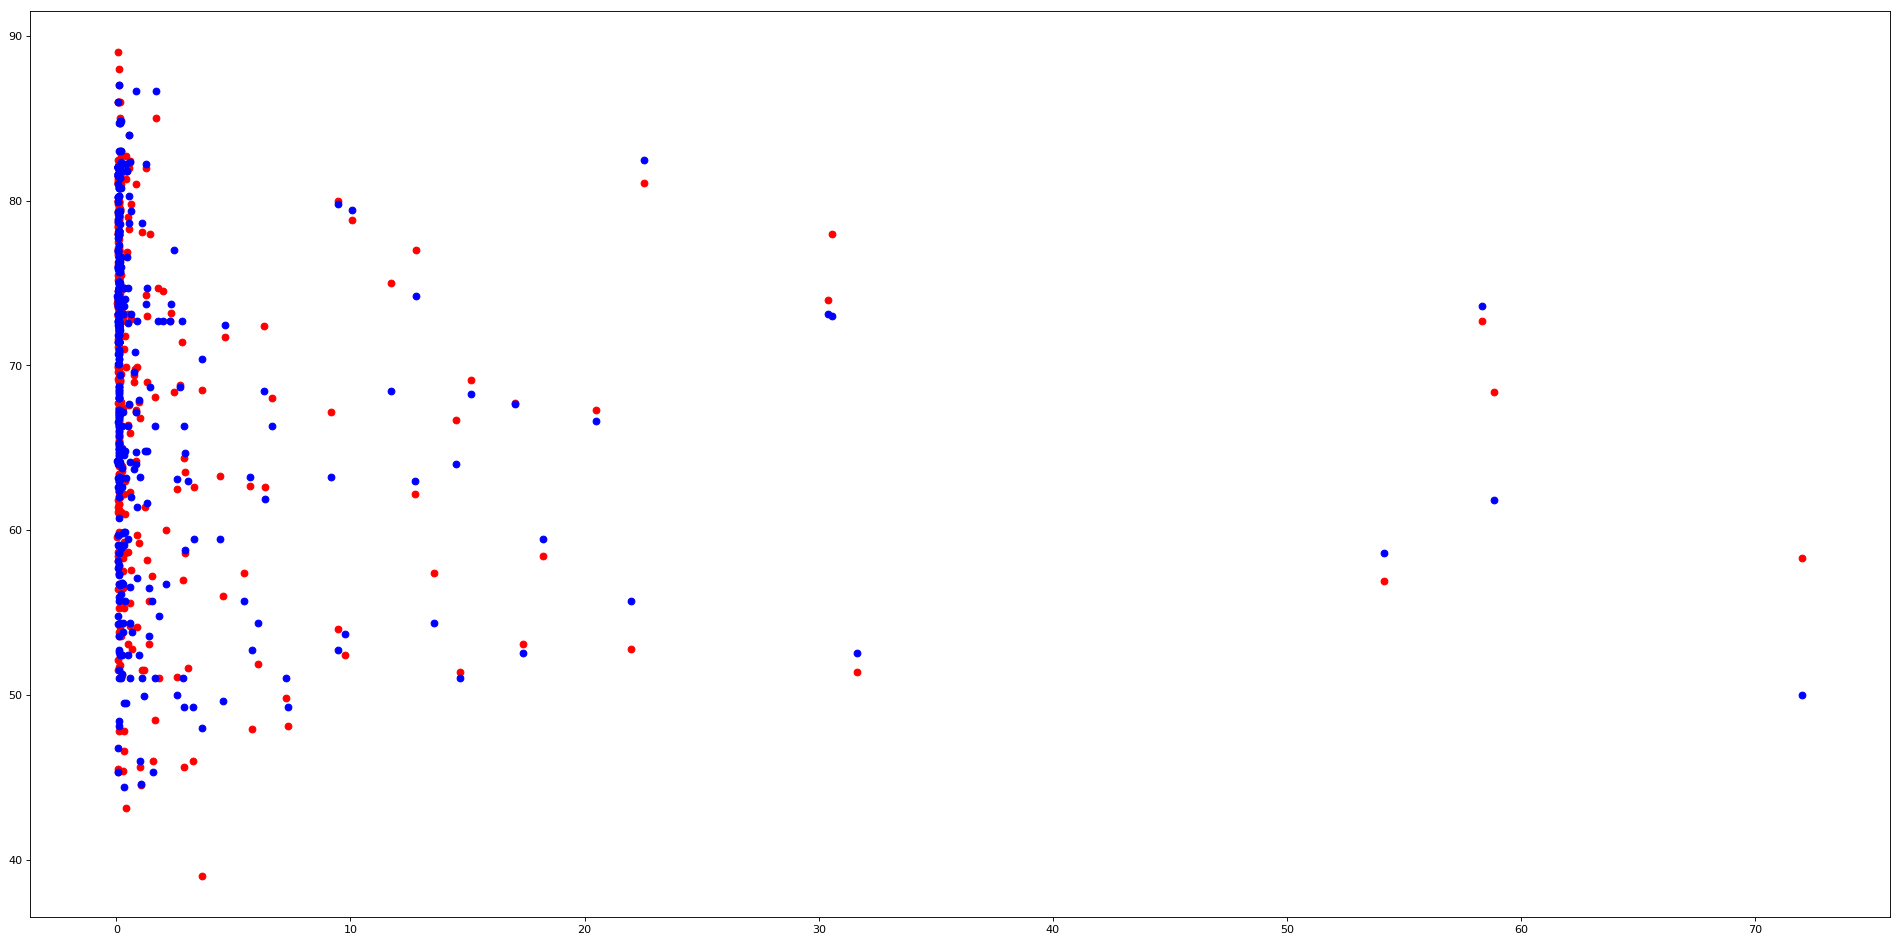

DecisionTreeRegressor {'criterion': 'mae'}
Mean squared error: 15.74767006802721
Variance: 0.8317186258303175
Adult Mortality: 0.6035257412986642
Alcohol: 0.0619252377728475
Hepatitis B: 0.019088430426155878
Measles : 0.02236203333242596
 BMI : 0.08353844465098555
Polio: 0.02574948538057938
Total expenditure: 0.028369409983894537
Diphtheria : 0.04700915204519394
GDP: 0.040366841997541376
Status: 0.06806522311171175
Most important coeficient:  Adult Mortality
--------------------------------------------------------------------------------------------------------



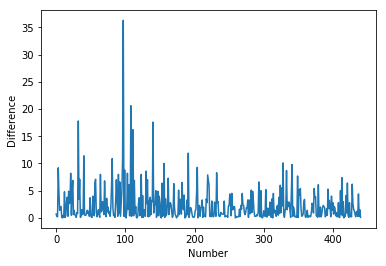

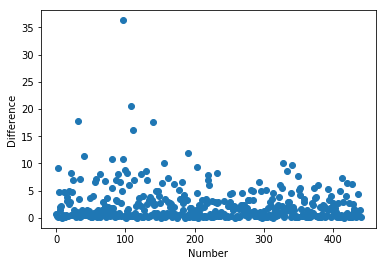

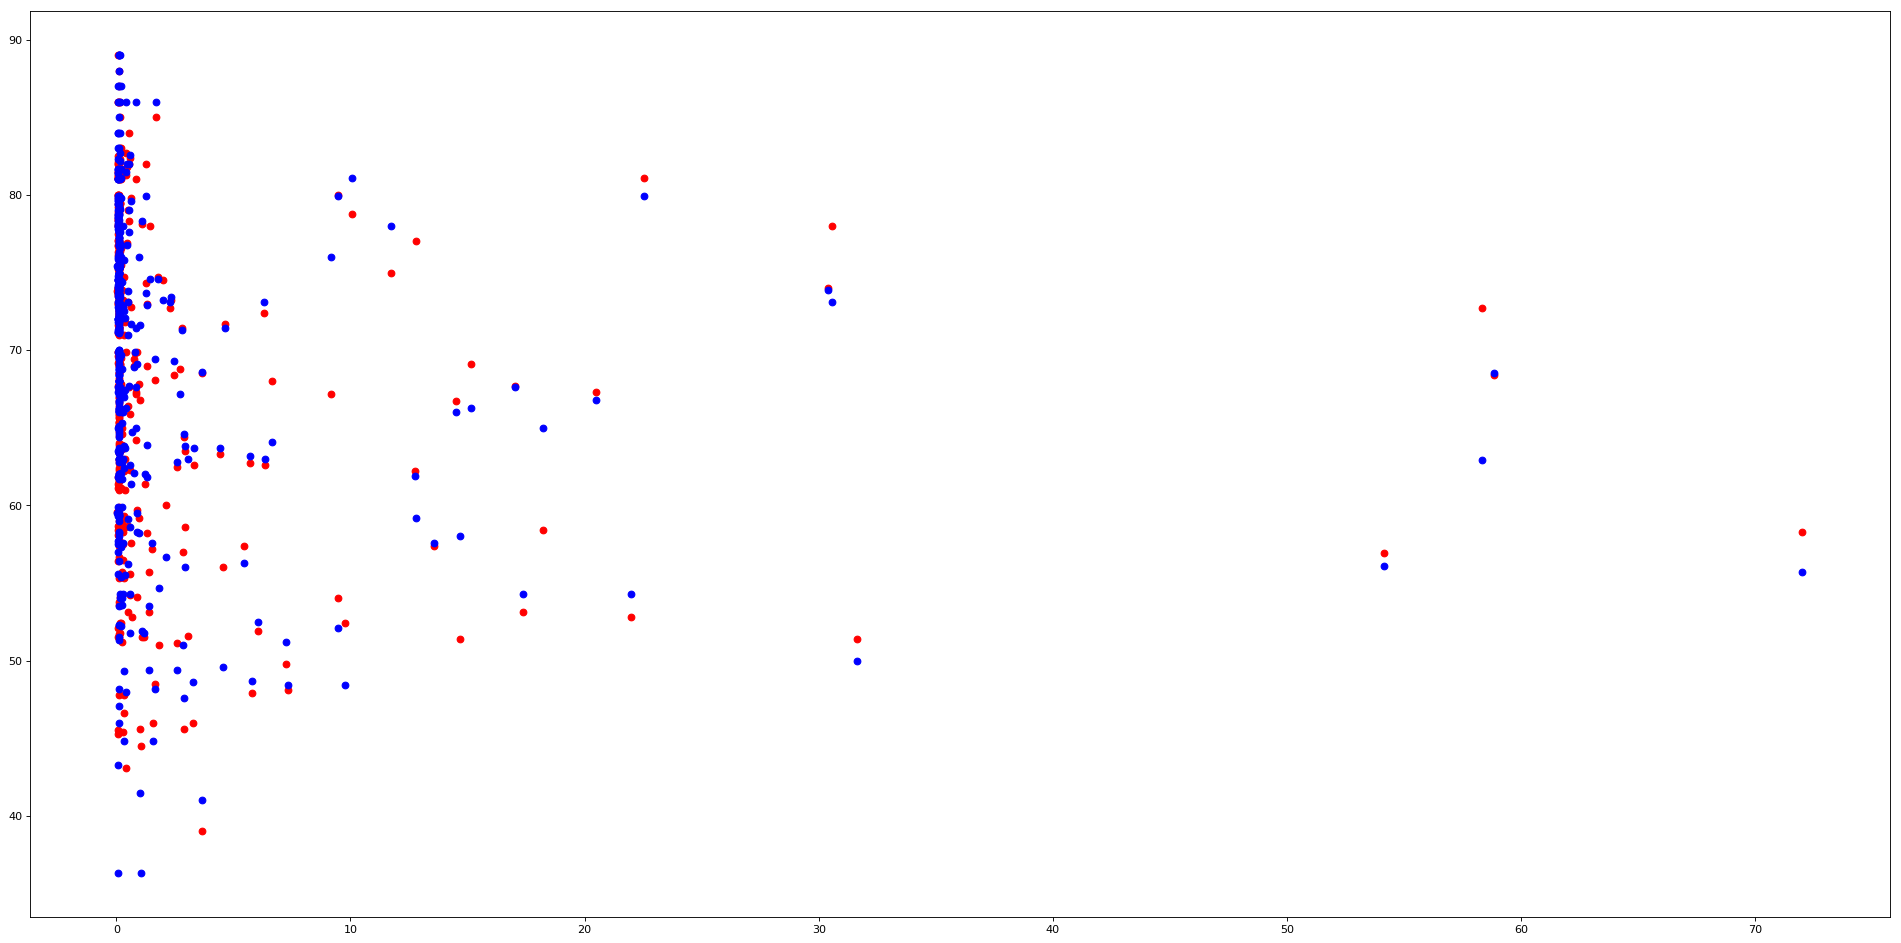

DecisionTreeRegressor {'criterion': 'mae', 'max_depth': 2}
Mean squared error: 40.60980725623582
Variance: 0.5660390305153618
Adult Mortality: 0.8521088229473454
Alcohol: 0.0
Hepatitis B: 0.0
Measles : 0.0
 BMI : 0.0
Polio: 0.0
Total expenditure: 0.0
Diphtheria : 0.0
GDP: 0.0
Status: 0.14789117705265456
Most important coeficient:  Adult Mortality
--------------------------------------------------------------------------------------------------------



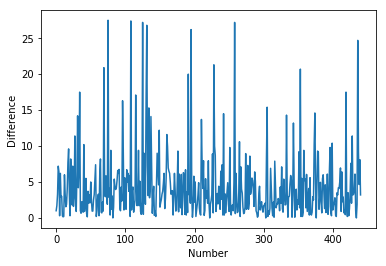

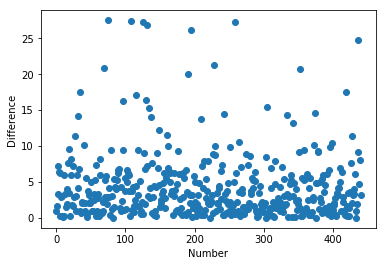

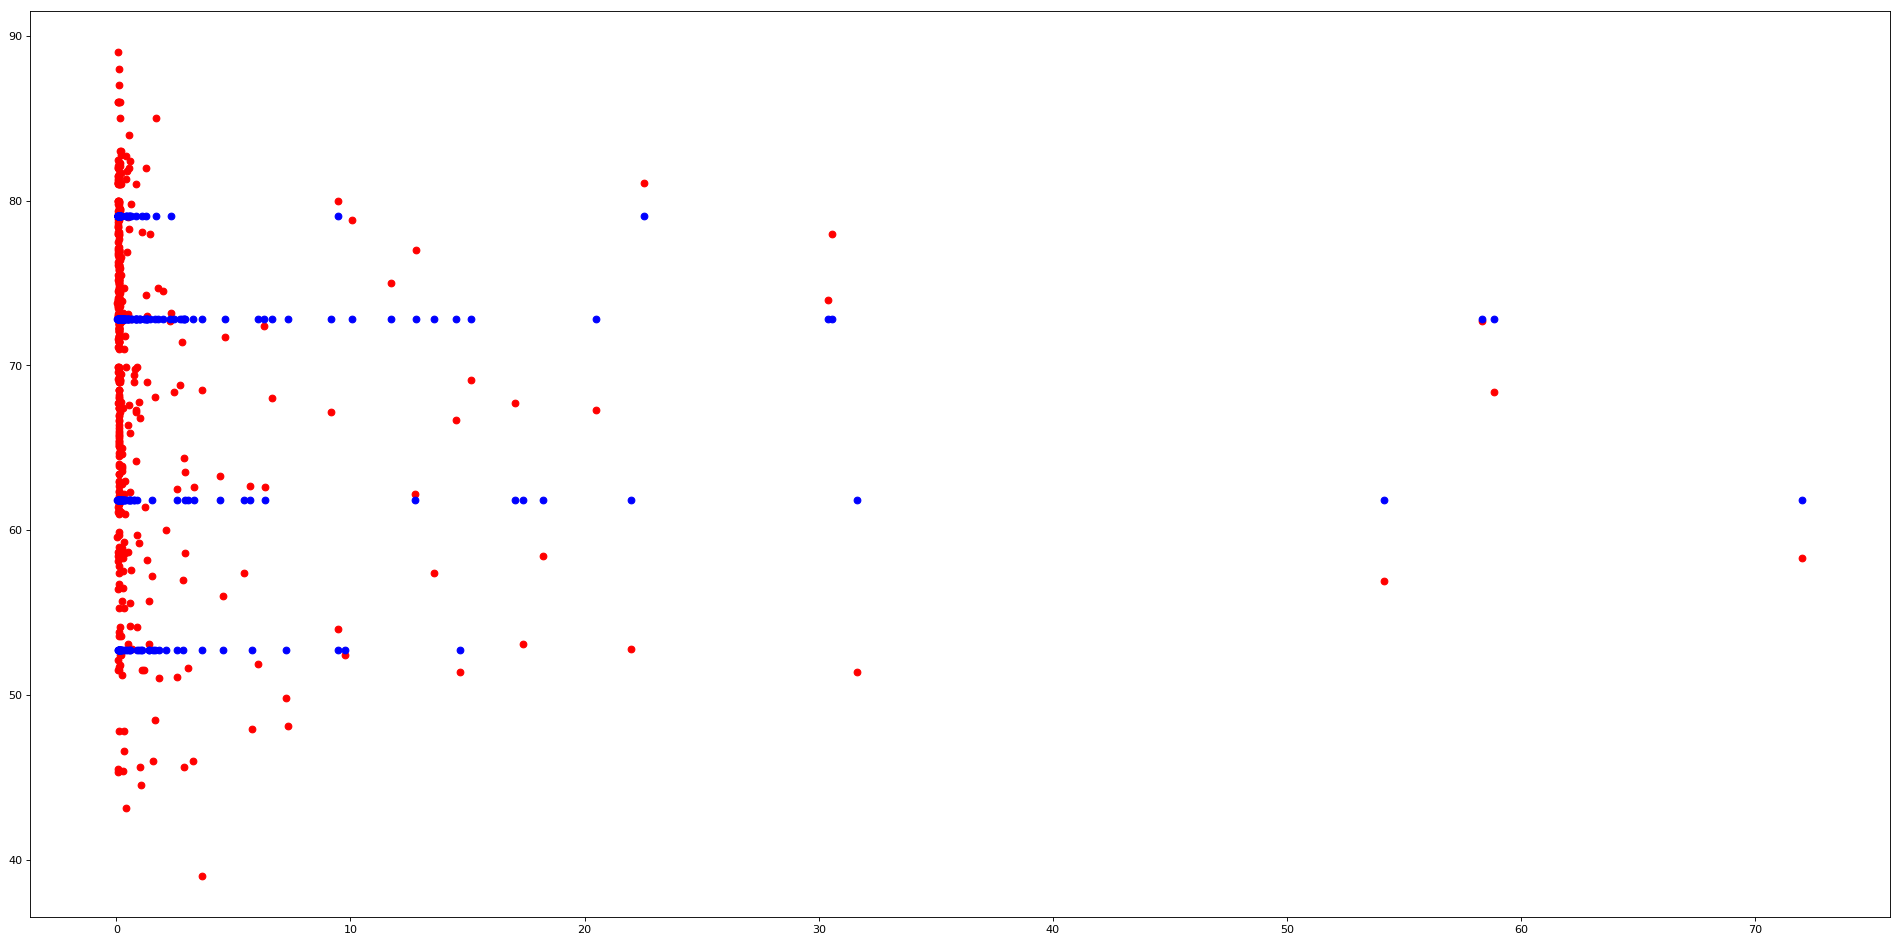

DecisionTreeRegressor {'criterion': 'mae', 'max_depth': 5}
Mean squared error: 18.872369614512472
Variance: 0.7983277349062357
Adult Mortality: 0.7387607750318422
Alcohol: 0.024471590777956357
Hepatitis B: 0.0
Measles : 0.0
 BMI : 0.0673298233733091
Polio: 0.008012225040512322
Total expenditure: 0.0
Diphtheria : 0.04637354552830326
GDP: 0.01367026045258758
Status: 0.10138177979548912
Most important coeficient:  Adult Mortality
--------------------------------------------------------------------------------------------------------



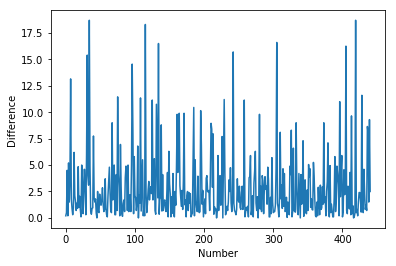

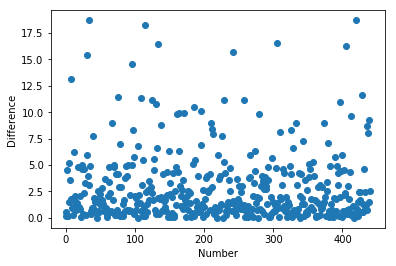

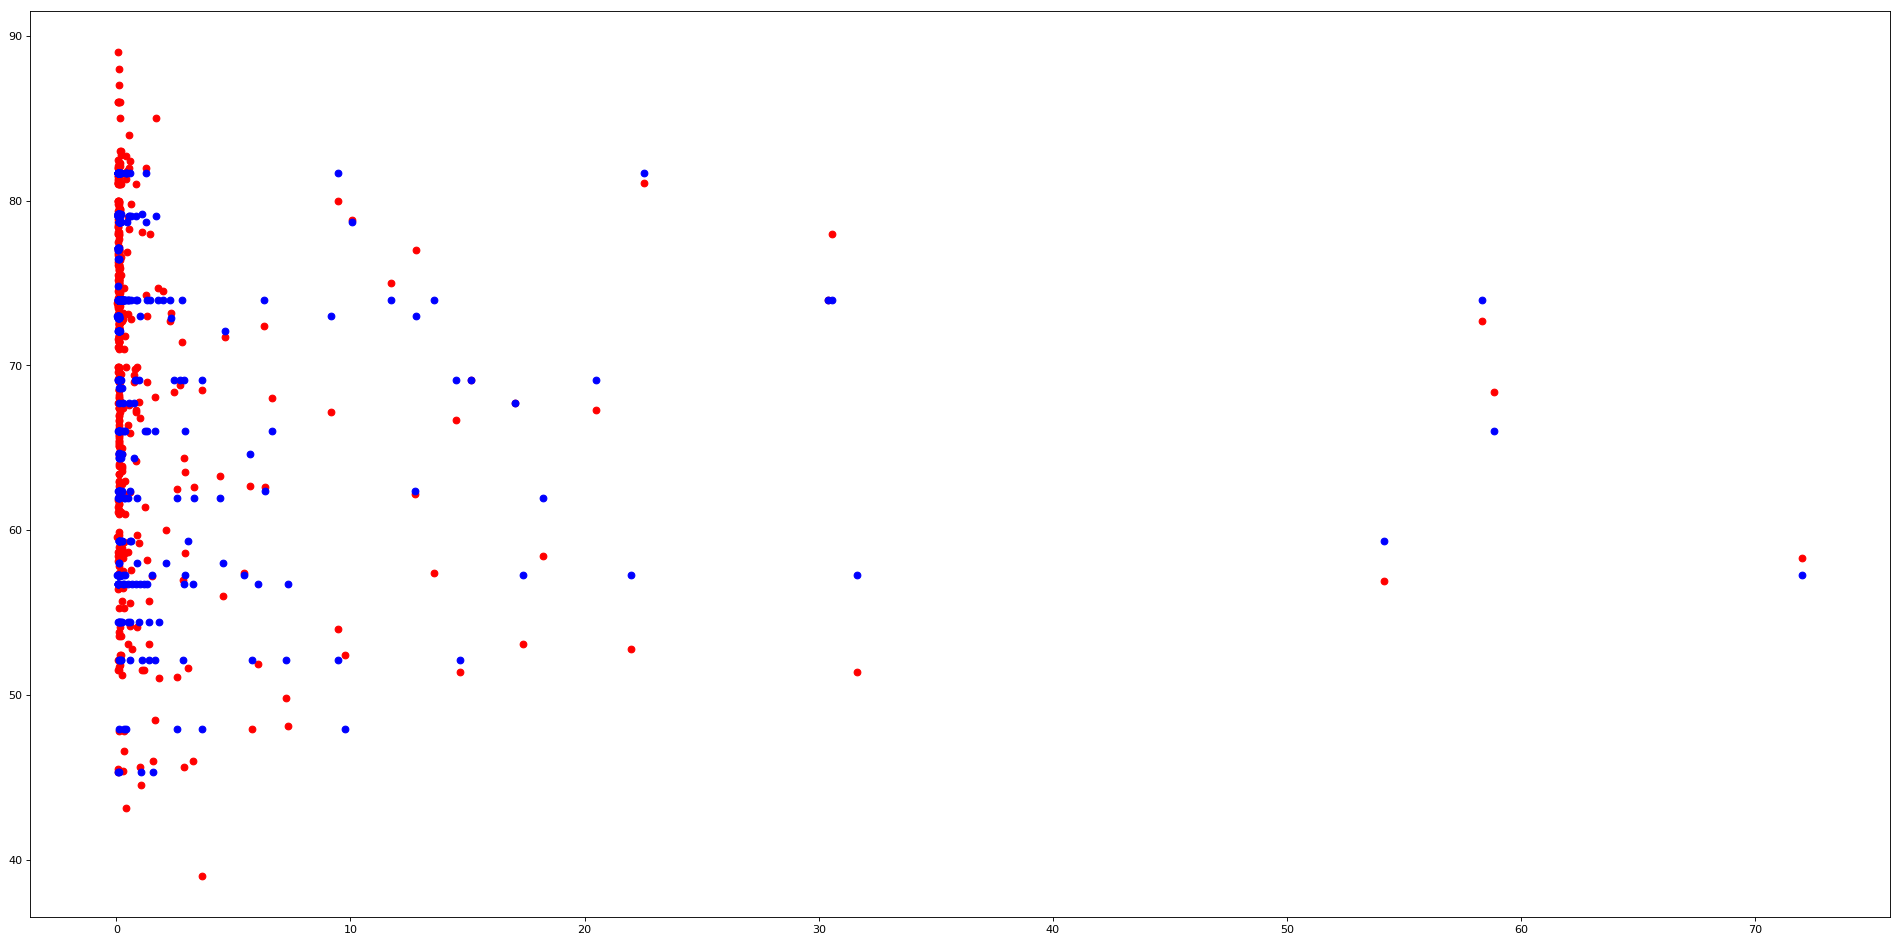

DecisionTreeRegressor {'criterion': 'mae', 'max_depth': 7}
Mean squared error: 16.558466770248838
Variance: 0.8230543610449431
Adult Mortality: 0.6982005894859087
Alcohol: 0.04382000572044465
Hepatitis B: 0.0029270323985794025
Measles : 0.002157885198952693
 BMI : 0.07588380528202317
Polio: 0.015390065725863962
Total expenditure: 0.008403645329254776
Diphtheria : 0.04082889718018422
GDP: 0.021913573456031493
Status: 0.0904745002227568
Most important coeficient:  Adult Mortality
--------------------------------------------------------------------------------------------------------



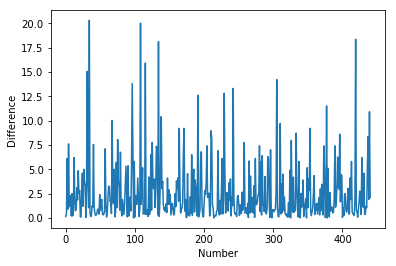

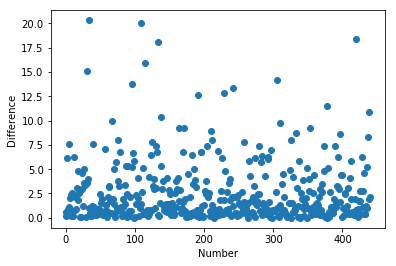

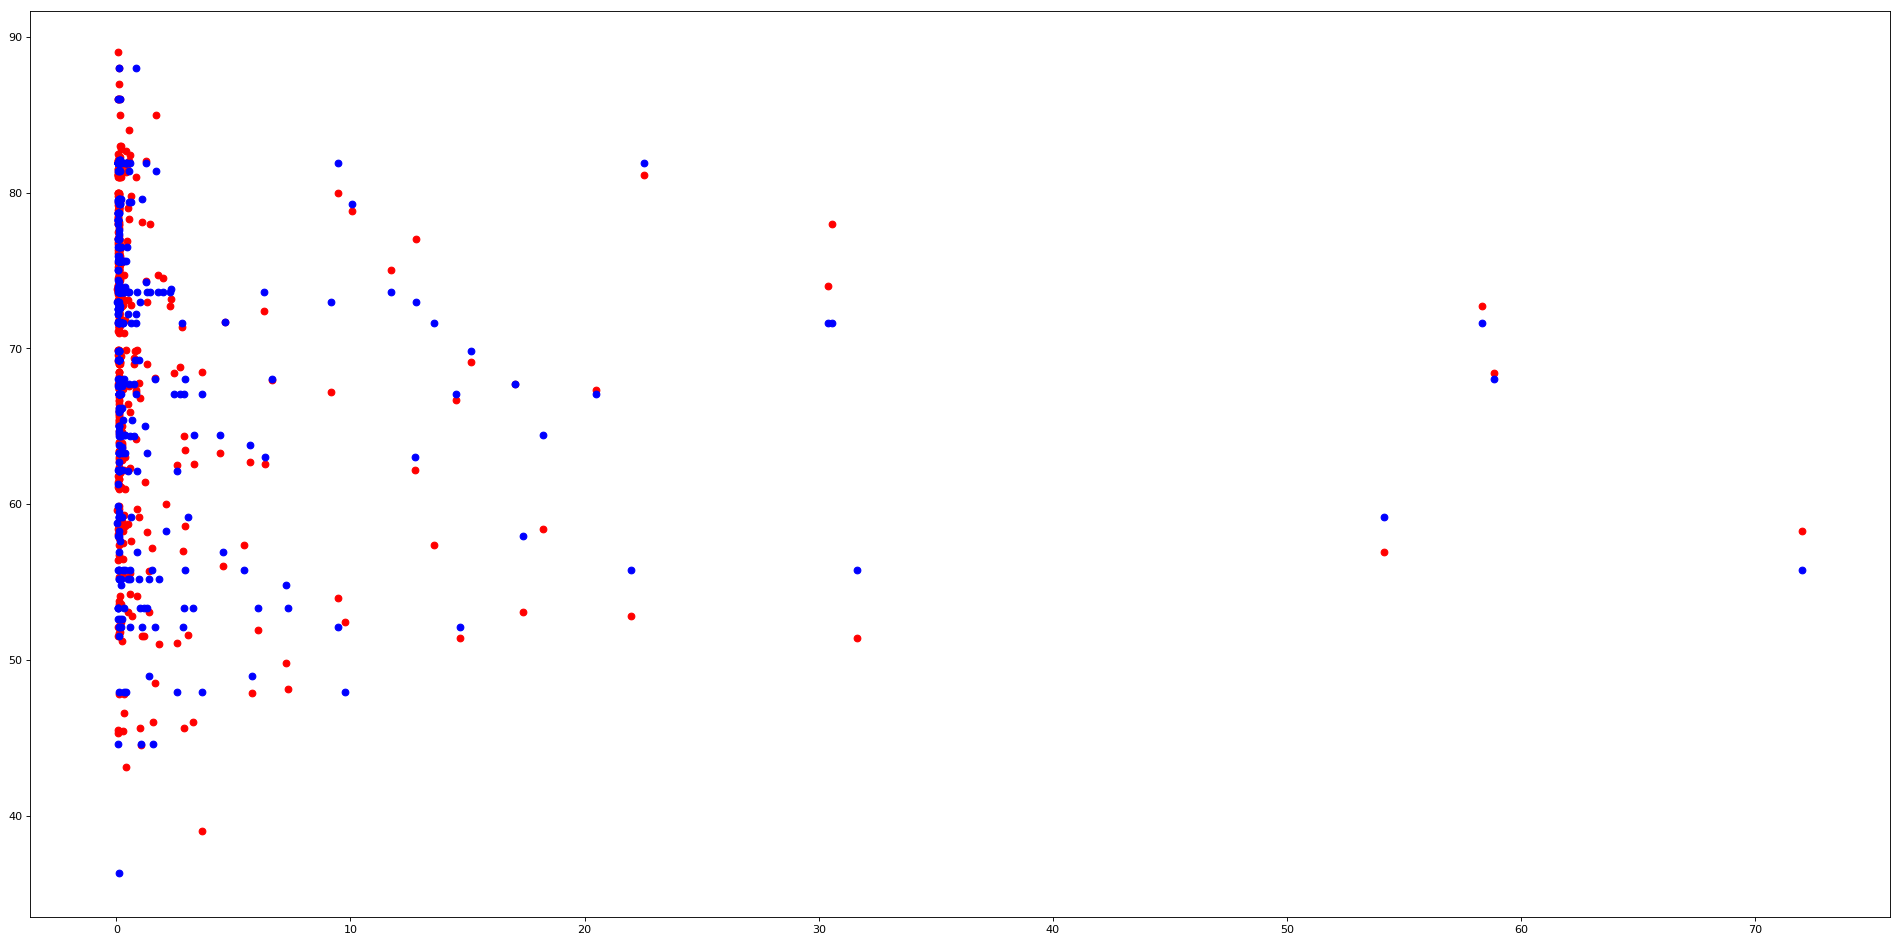

DecisionTreeRegressor {'criterion': 'mae', 'max_depth': 10}
Mean squared error: 11.849143990929704
Variance: 0.8733787141263187
Adult Mortality: 0.6590673573226957
Alcohol: 0.05241208191727019
Hepatitis B: 0.009987904055834124
Measles : 0.010085645012955434
 BMI : 0.07820036415516647
Polio: 0.018998398540455156
Total expenditure: 0.019844443664430694
Diphtheria : 0.043433637820783334
GDP: 0.03036384755608659
Status: 0.07760631995432238
Most important coeficient:  Adult Mortality
--------------------------------------------------------------------------------------------------------



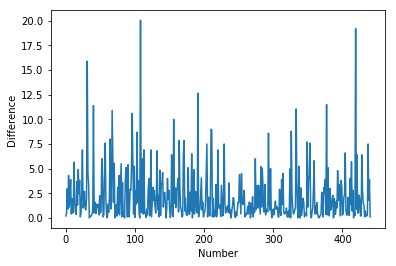

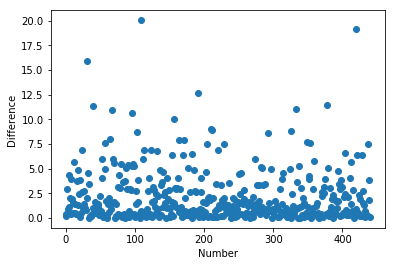

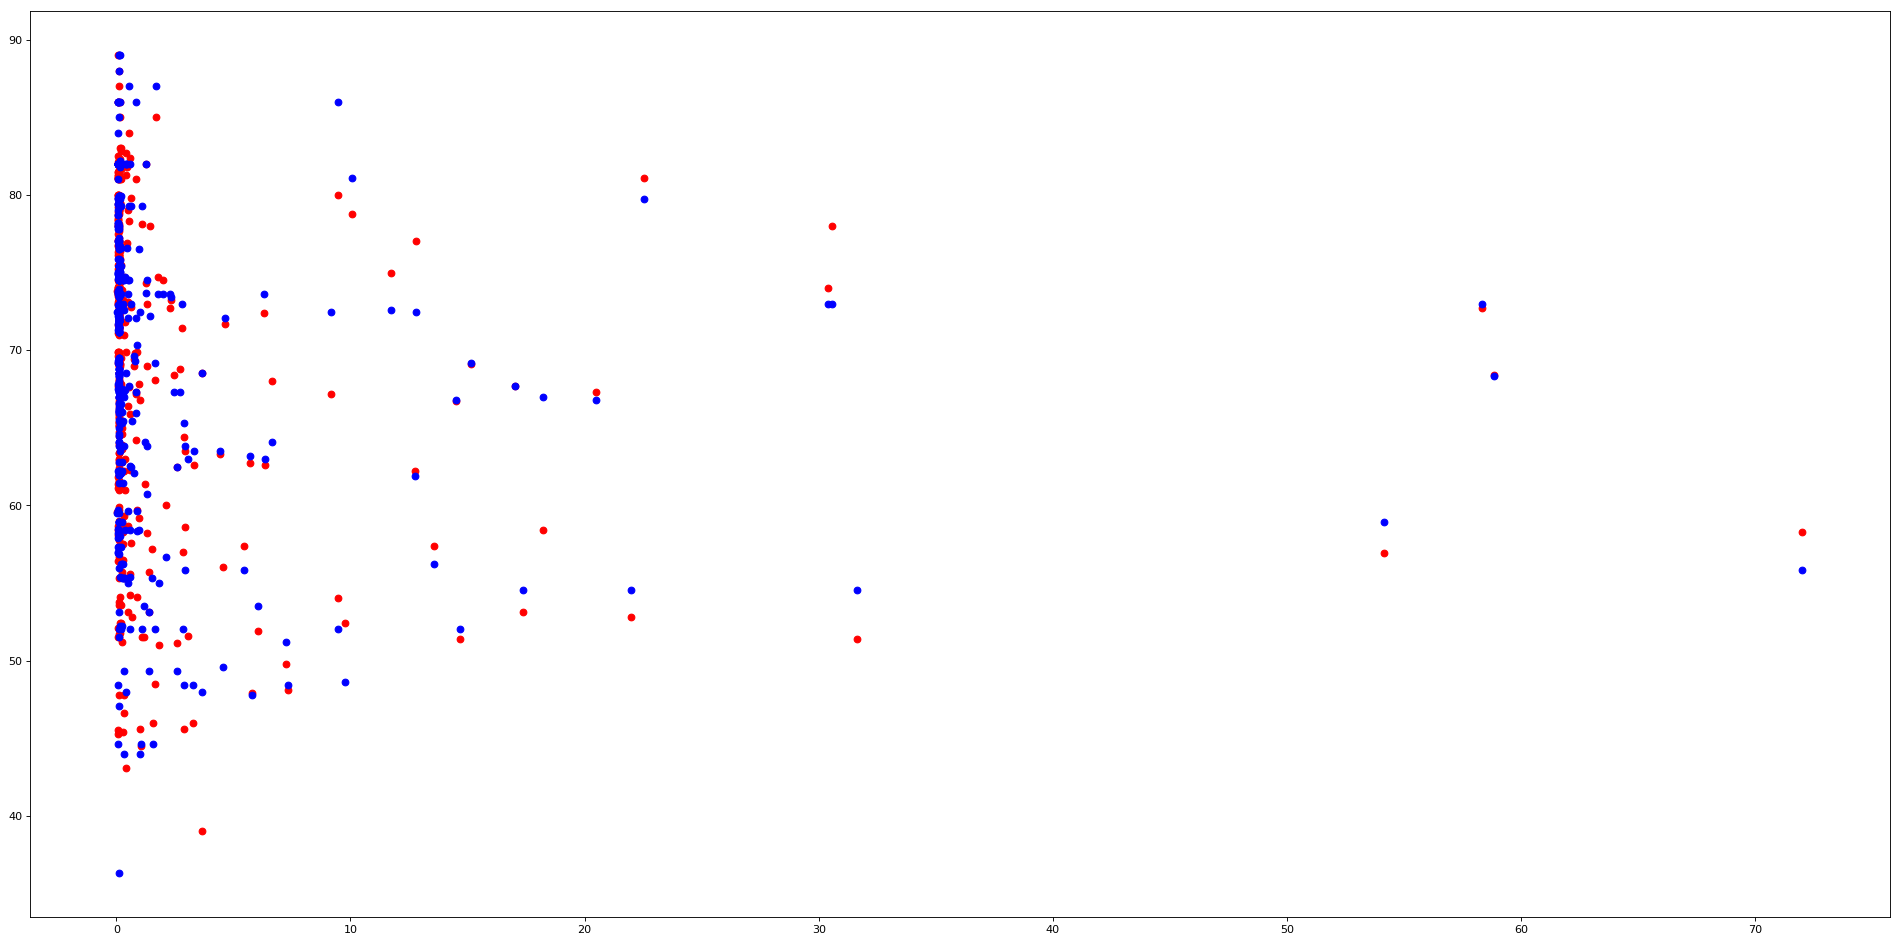

In [0]:
decision_tree_regressor_models = [
    (DecisionTreeRegressor, {}),
    (DecisionTreeRegressor, {"max_depth" : 2}),
    (DecisionTreeRegressor, {"max_depth" : 5}),
    (DecisionTreeRegressor, {"max_depth" : 7}),
    (DecisionTreeRegressor, {"max_depth" : 10}),
    (DecisionTreeRegressor, {'criterion': "friedman_mse"}),
    (DecisionTreeRegressor, {'criterion': "friedman_mse", "max_depth" : 2}),
    (DecisionTreeRegressor, {'criterion': "friedman_mse", "max_depth" : 5}),
    (DecisionTreeRegressor, {'criterion': "friedman_mse", "max_depth" : 7}),
    (DecisionTreeRegressor, {'criterion': "friedman_mse", "max_depth" : 10}),
    (DecisionTreeRegressor, {'criterion': "mae"}),
    (DecisionTreeRegressor, {'criterion': "mae", "max_depth" : 2}),
    (DecisionTreeRegressor, {'criterion': "mae", "max_depth" : 5}),
    (DecisionTreeRegressor, {'criterion': "mae", "max_depth" : 7}),
    (DecisionTreeRegressor, {'criterion': "mae", "max_depth" : 10}),
]


for i, (Model, kwargs) in enumerate(decision_tree_regressor_models):
  model = Model(**kwargs)
  model.fit(X_train, y_train)
  y_predicted = model.predict(X_test)
  mse = mean_squared_error(y_test, y_predicted)
  variance = r2_score(y_test, y_predicted)

  print(Model.__name__, kwargs)
  print("Mean squared error:", mse)
  print("Variance:", r2_score(y_test, y_predicted))
  pretty_print_coeficients_decision_tree(model)
  print("--------------------------------------------------------------------------------------------------------")
  print()
  
  plot_y_difference(y_test, y_predicted)
  plot_expected_and_trained_data(X_test, y_test, y_predicted)

# Decision Trees - Regression - Polynomial Features

DecisionTreeRegressor {}
Mean squared error: 11.341995464852609
Variance: 0.8787981603369462
Coeficients for combinations between columns of power = 0 or 1 or 2 or 3 - (ex: a, b, c, a * b * c^3, c^3)
[0.0, 0.12224587406021255, 0.00034321763687582193, 0.00022847578835534545, 3.717296429267369e-05, 0.0005975734501824636, 0.001364791008565863, 0.0001995116464500164, 0.0002937417091116239, 0.0006641713471896542, 0.0, 0.0006536376385768118, 0.0021767425754005416, 2.1902583060646027e-05, 0.0028007335746406082, 0.0006404774710311065, 0.00015612129675099333, 0.02183388609173166, 0.0011866738570385131, 0.5629200953993245, 0.00011030904170245698, 5.7419381731092584e-05, 1.8720428783130428e-05, 0.00020271487873018762, 8.835153802479049e-05, 0.00012994262595442571, 2.553825105422195e-05, 6.28352183350301e-05, 5.4894577456772103e-05, 0.00010735514655047354, 0.0007513536844579278, 0.0013773008922130338, 1.4680420060838532e-05, 0.0006050664162842644, 0.00021306611195338578, 0.00021920473319161205, 3.

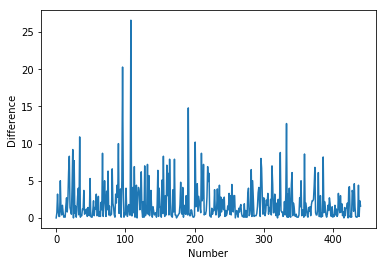

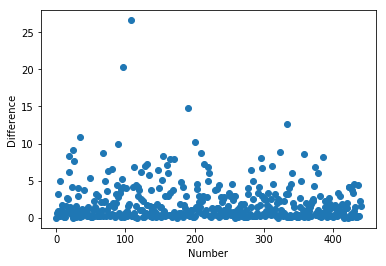

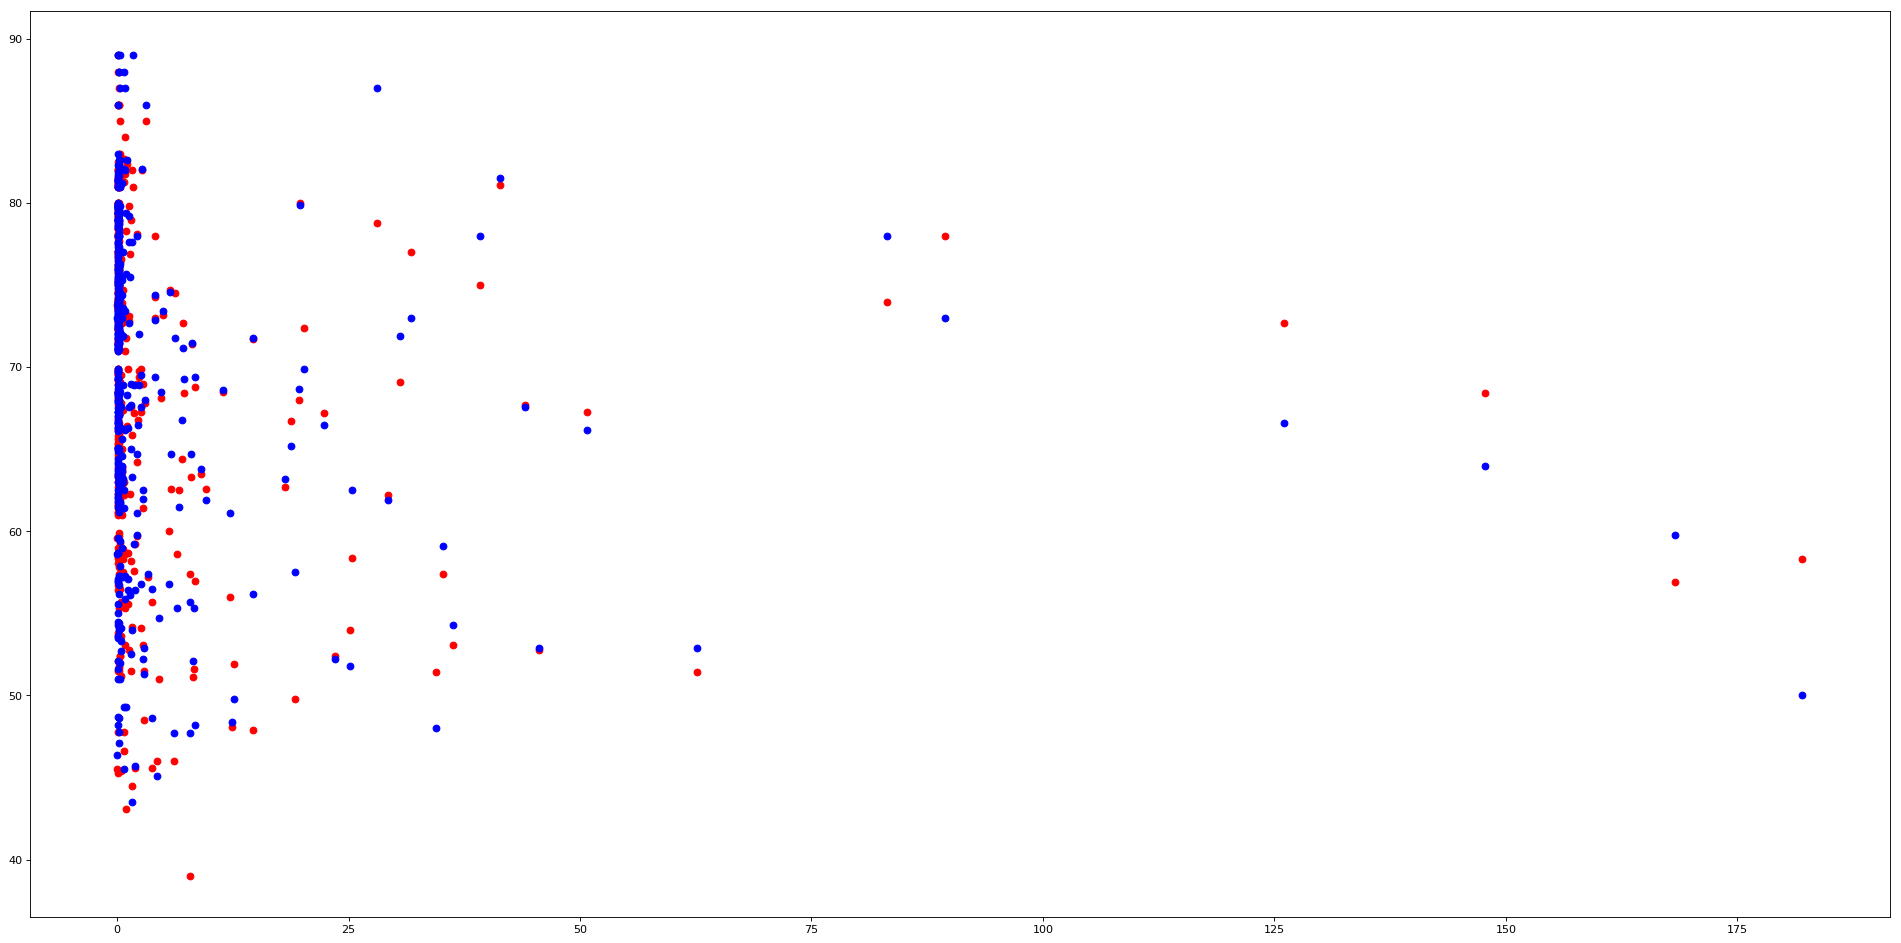

DecisionTreeRegressor {'max_depth': 2}
Mean squared error: 38.54661270641549
Variance: 0.5880865596116237
Coeficients for combinations between columns of power = 0 or 1 or 2 or 3 - (ex: a, b, c, a * b * c^3, c^3)
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.8214542270647227, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0

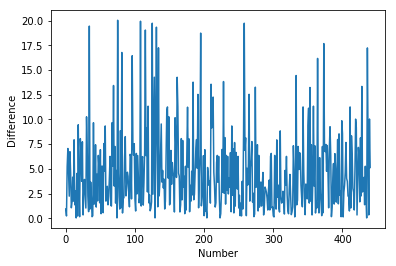

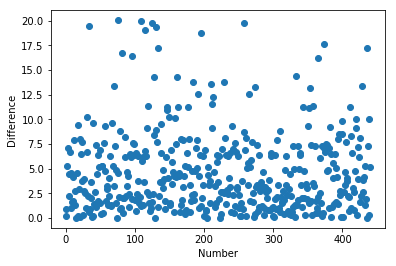

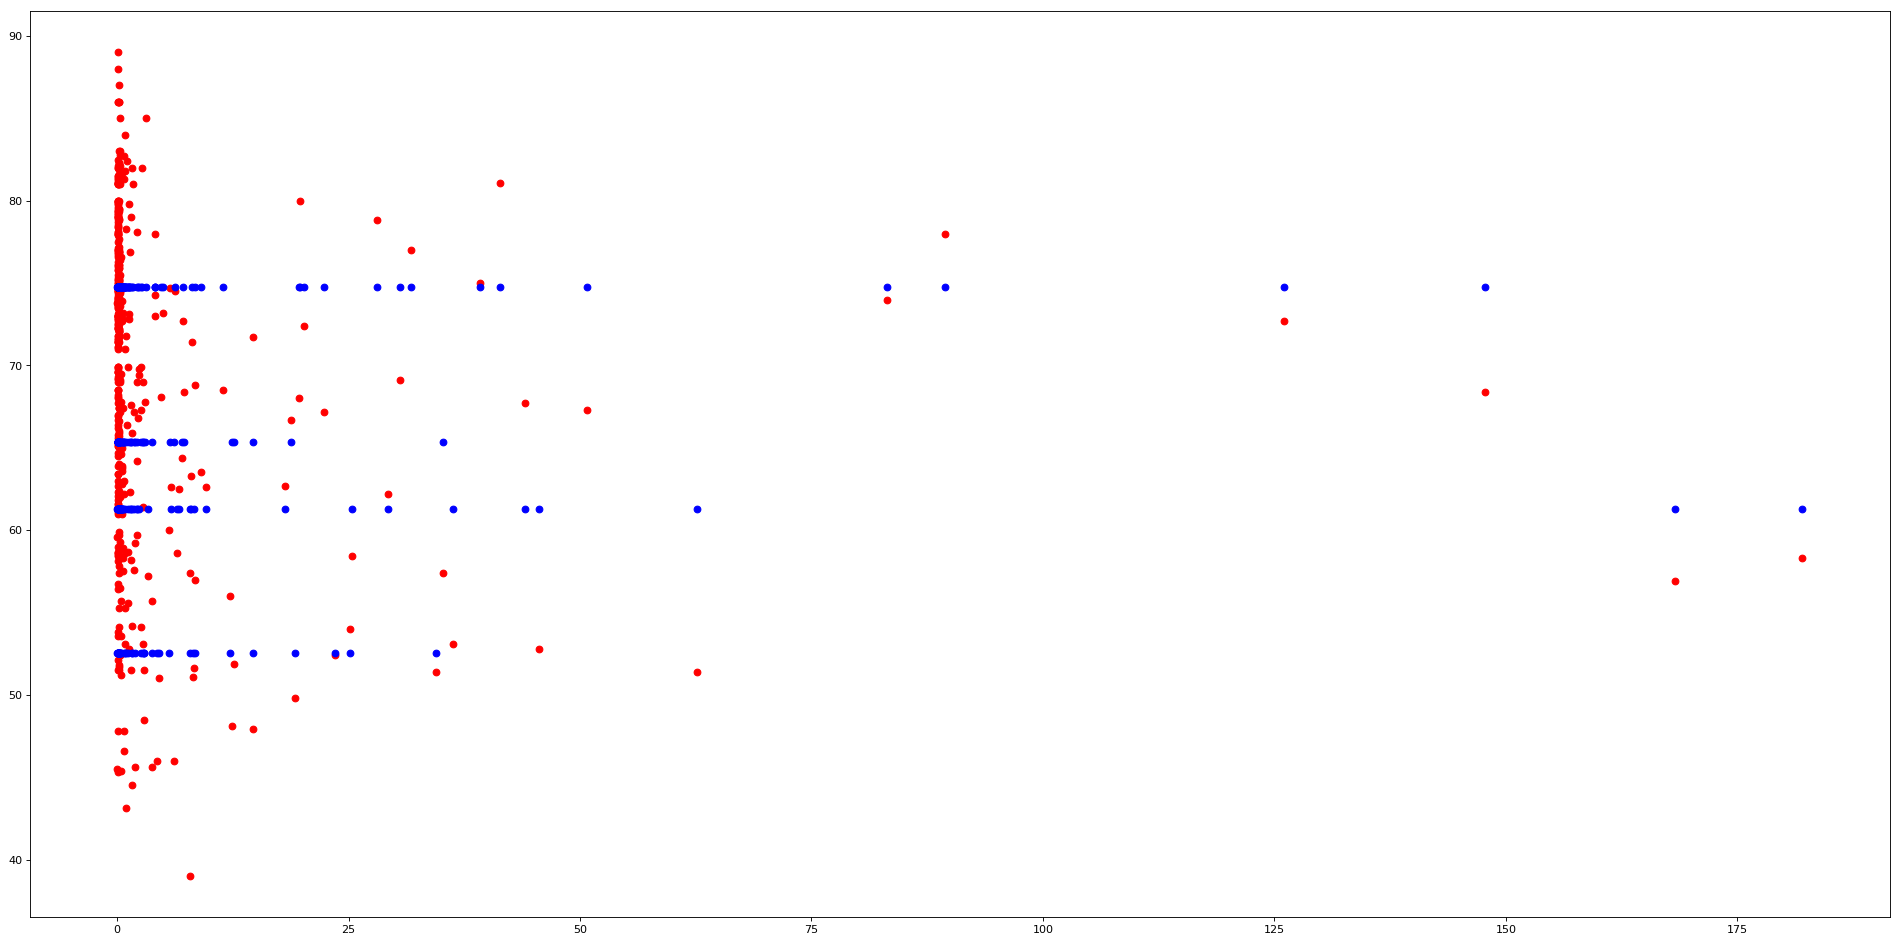

DecisionTreeRegressor {'max_depth': 5}
Mean squared error: 14.939979698094316
Variance: 0.8403496959993506
Coeficients for combinations between columns of power = 0 or 1 or 2 or 3 - (ex: a, b, c, a * b * c^3, c^3)
[0.0, 0.11498793761253699, 0.0, 0.0, 0.0, 0.0, 0.0011203855379103265, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00041855501278547475, 0.0, 0.013974844184412596, 0.0, 0.6374279785868759, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.009585969897420164, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.006106805724102329, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0006337684073787859, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0014208752790661372, 0.0, 0.002629248072616146, 0.0, 0.0032644758733995174, 0.0, 0.00024155727555240093, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0

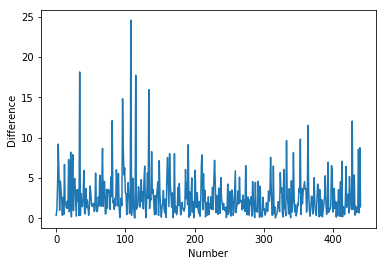

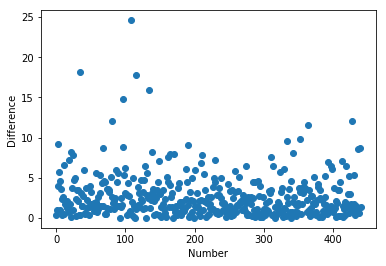

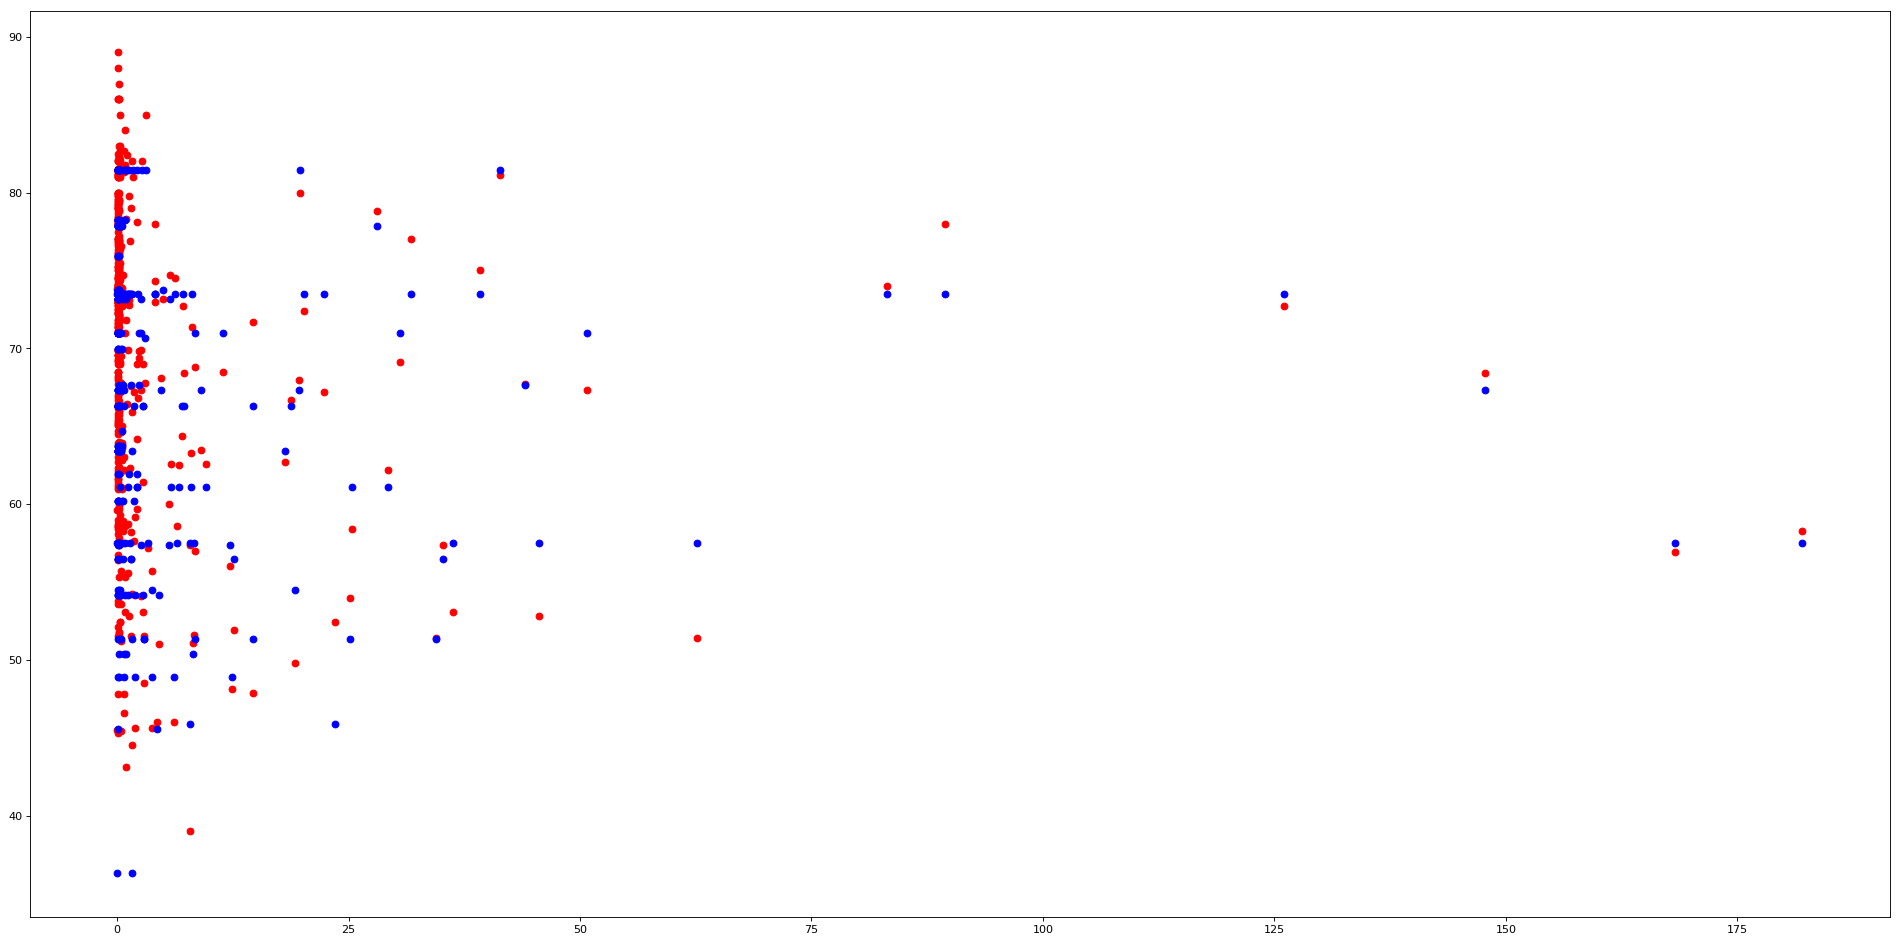

DecisionTreeRegressor {'max_depth': 7}
Mean squared error: 12.366369881062335
Variance: 0.867851580069556
Coeficients for combinations between columns of power = 0 or 1 or 2 or 3 - (ex: a, b, c, a * b * c^3, c^3)
[0.0, 0.13988895347794722, 0.0006887326623365376, 0.0, 0.0, 9.91838689137327e-05, 0.0010430655598655224, 0.00015893074479683634, 0.0005900308209088756, 0.001094935599650073, 0.0, 8.994527578401071e-05, 0.0, 2.416840649566935e-05, 0.0026584677038101866, 0.0005997581813839334, 0.0, 0.016049601159050075, 0.0, 0.5836207630401253, 0.0, 0.0, 0.0, 0.0, 0.0, 1.6234421733563847e-05, 0.0004092437515514122, 0.0, 0.0, 0.0, 0.0012429342354771944, 0.0015671851119006615, 0.0, 0.00017024358281909416, 0.0010885054685077196, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.007738044659209382, 3.0471248605557967e-05, 7.134267366580371e-08, 0.0, 0.0004568028723807952, 3.1462119072565174e-05, 0.0, 0.00047399663235465455, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0005532786642914526, 0.005685363221914064, 0.0, 0.001132626837

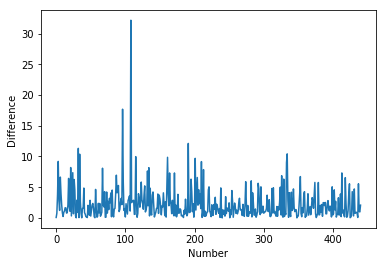

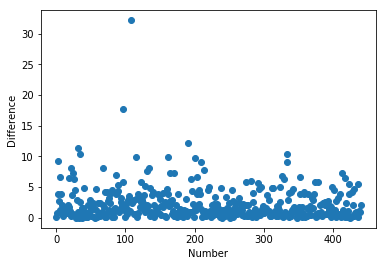

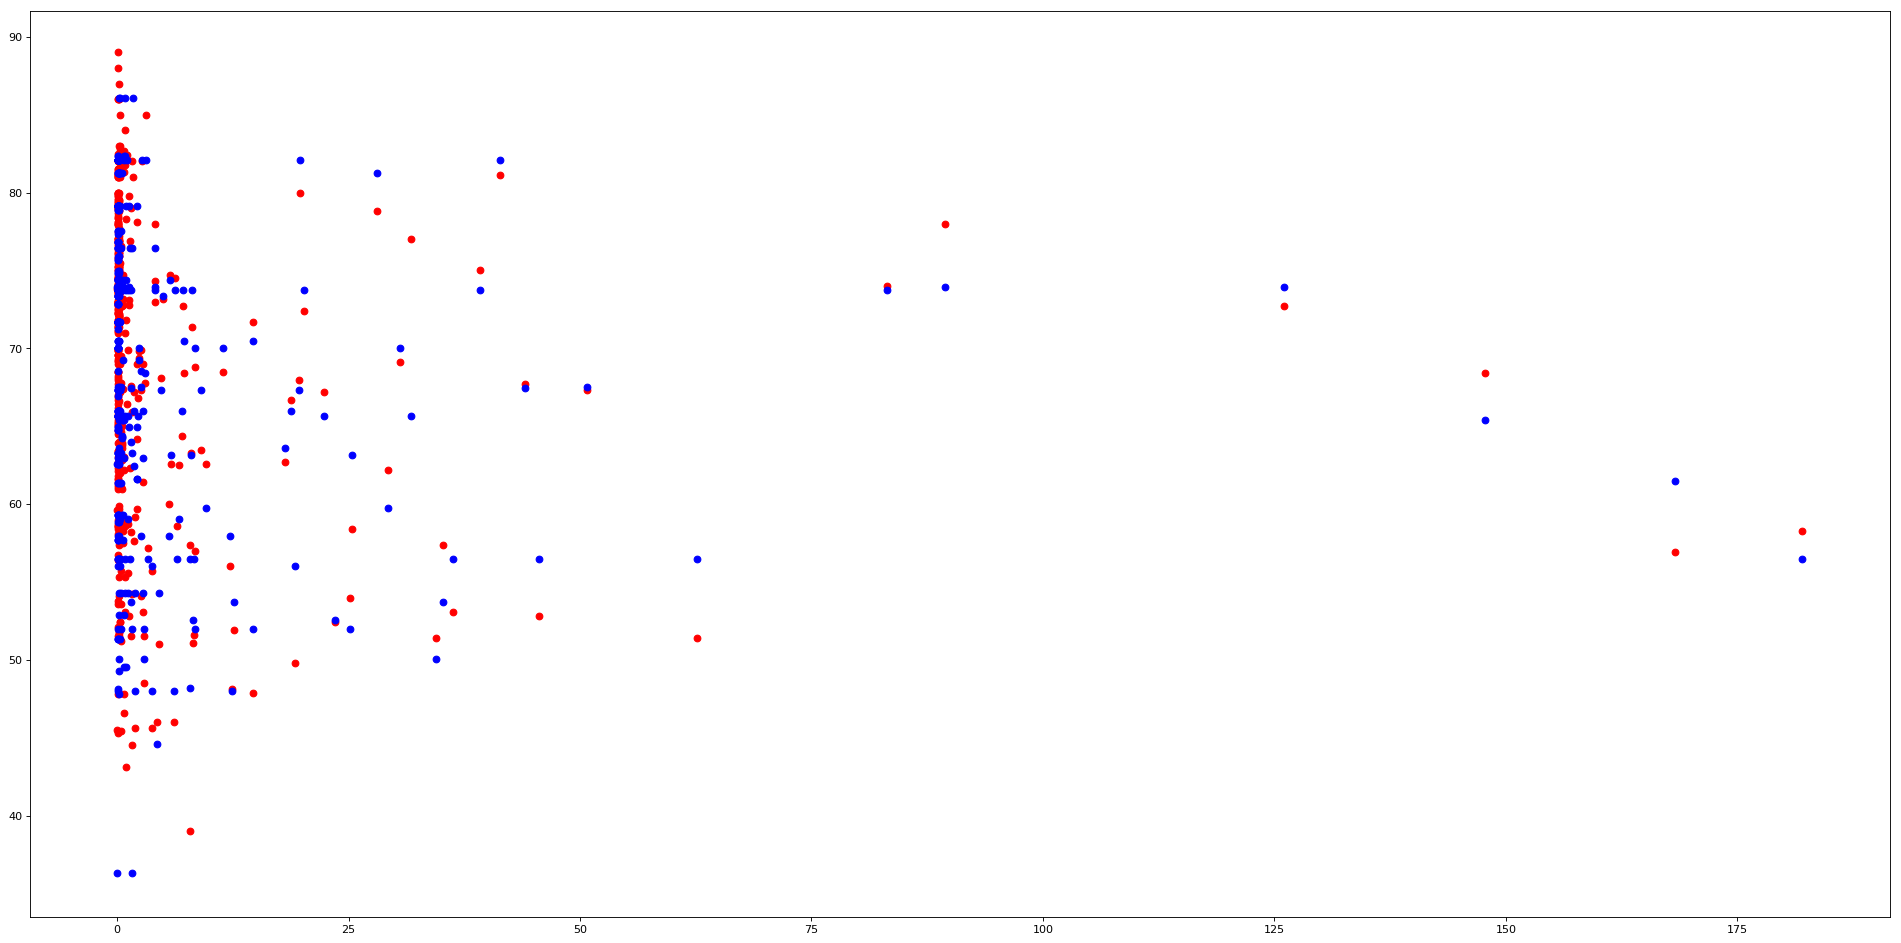

DecisionTreeRegressor {'max_depth': 10}
Mean squared error: 10.916317854454824
Variance: 0.883346999176061
Coeficients for combinations between columns of power = 0 or 1 or 2 or 3 - (ex: a, b, c, a * b * c^3, c^3)
[0.0, 0.054598554913095725, 0.00022072793097351016, 0.000849975350087043, 6.998566443056975e-06, 0.008668713520215818, 2.288007370802677e-05, 1.5344191371690432e-06, 0.0005804554833675616, 0.0008581784296158983, 0.0, 0.00010244024435740451, 0.0006219366272873727, 0.0003718640478245793, 0.0027124053022430754, 0.0006844550392163654, 0.00041956895763413035, 0.015997776137103552, 0.0004341096310609077, 0.6406764452108717, 2.035124328626963e-07, 3.866951582474692e-05, 0.0002670383542972612, 4.725472549478598e-05, 1.5067196502868827e-05, 7.322176173228656e-05, 0.0005370481180153756, 0.0011686344345356342, 0.0004064528516256539, 7.322062131876003e-05, 2.0555509474153013e-05, 0.001878317194664823, 8.140497317078593e-07, 5.728498111597049e-07, 1.3064995691547653e-06, 0.000116331871122

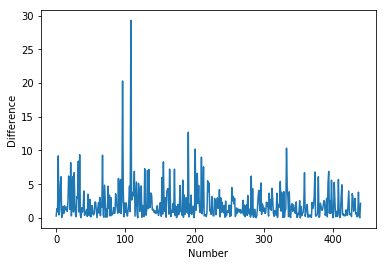

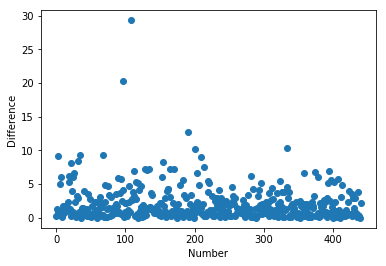

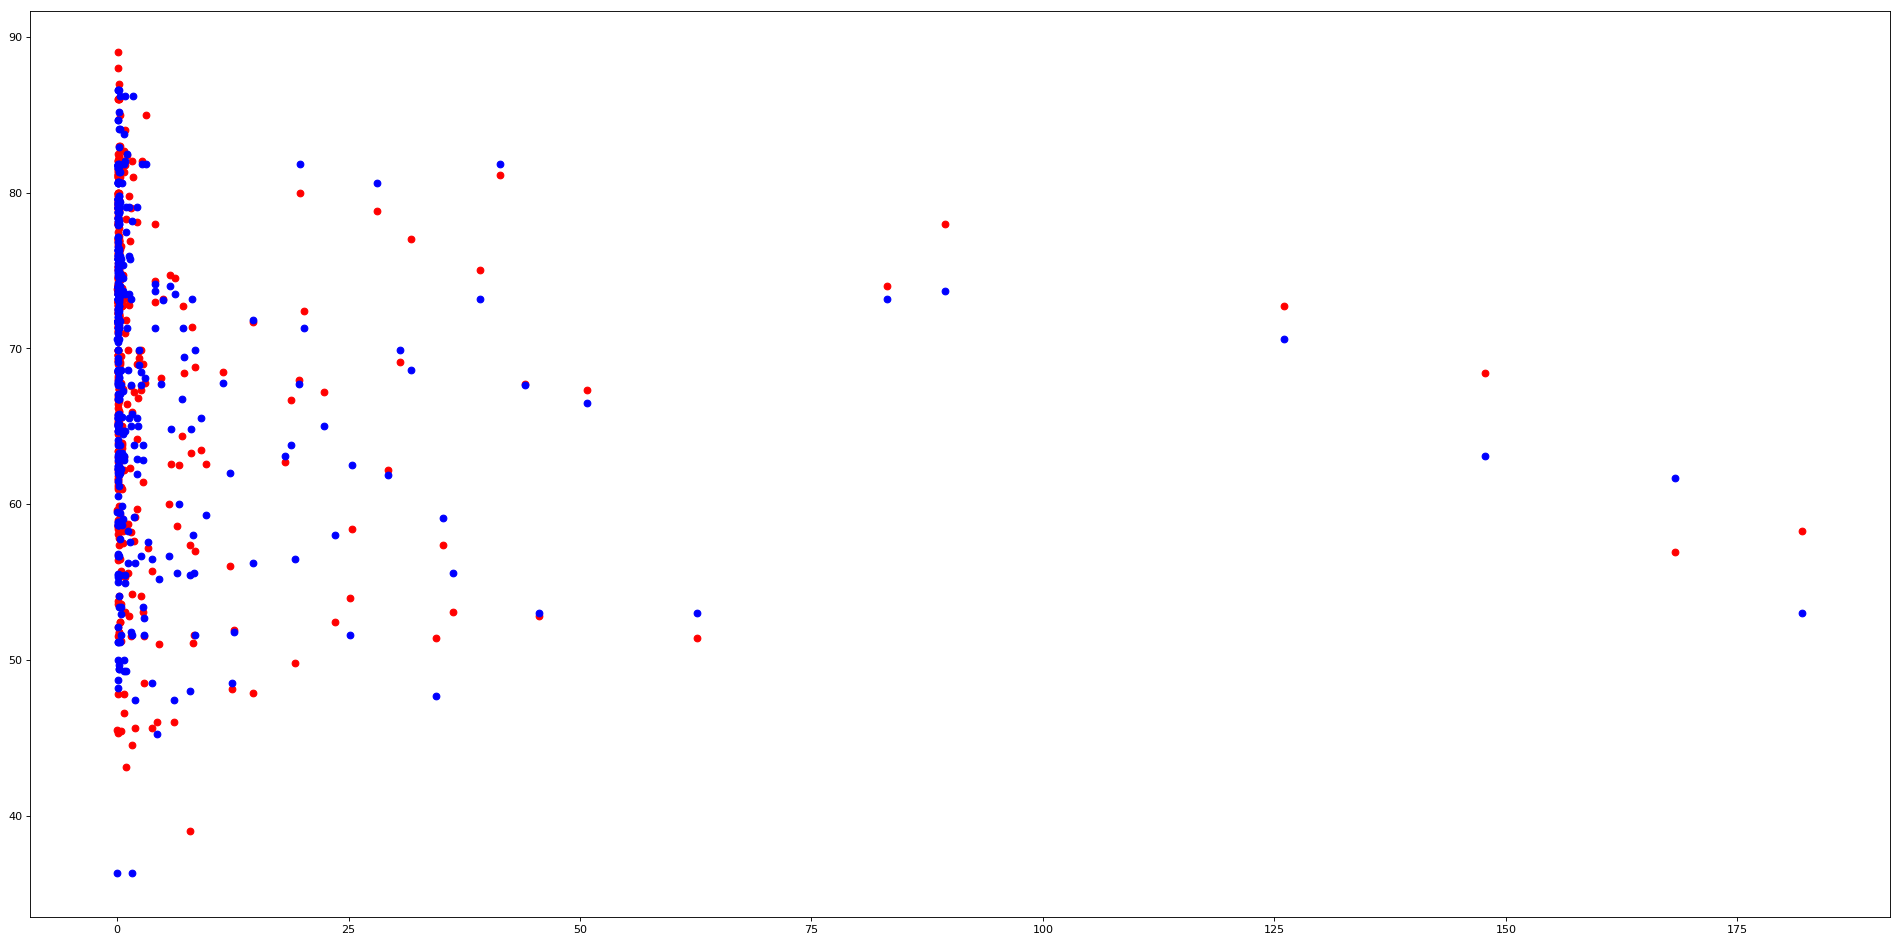

DecisionTreeRegressor {'criterion': 'friedman_mse'}
Mean squared error: 10.989841269841273
Variance: 0.8825613196868773
Coeficients for combinations between columns of power = 0 or 1 or 2 or 3 - (ex: a, b, c, a * b * c^3, c^3)
[0.0, 0.5703272869393399, 0.0007260579157236524, 4.147102181615093e-05, 1.138200653937803e-05, 0.0005577276681757359, 5.752852109321087e-05, 0.0005039518903779073, 0.00019798177462373895, 0.001055091232978079, 0.0, 0.00028369450422732463, 0.0016024913920265529, 1.5840257601439983e-05, 0.0004254236377506262, 0.0007774134419669664, 0.0007841134006800783, 0.018914880885337982, 0.0006254919919058049, 0.11640288065785495, 0.00042282808867661877, 1.8139840598413464e-05, 0.0006628684373571834, 0.00014162105739608846, 0.00030086294874407066, 0.00025711120178690167, 0.00030436219593063773, 7.781619898687017e-05, 1.7592863622252173e-05, 3.148345636528645e-06, 0.0013854417554410442, 0.0015101596312955157, 0.0008260666058359368, 0.0010054770676537889, 1.9287953733327685e-05,

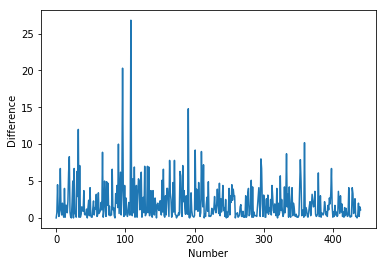

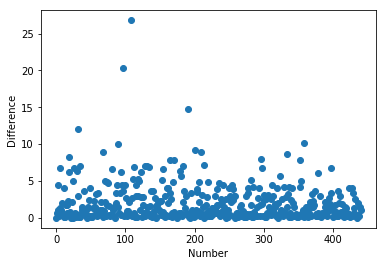

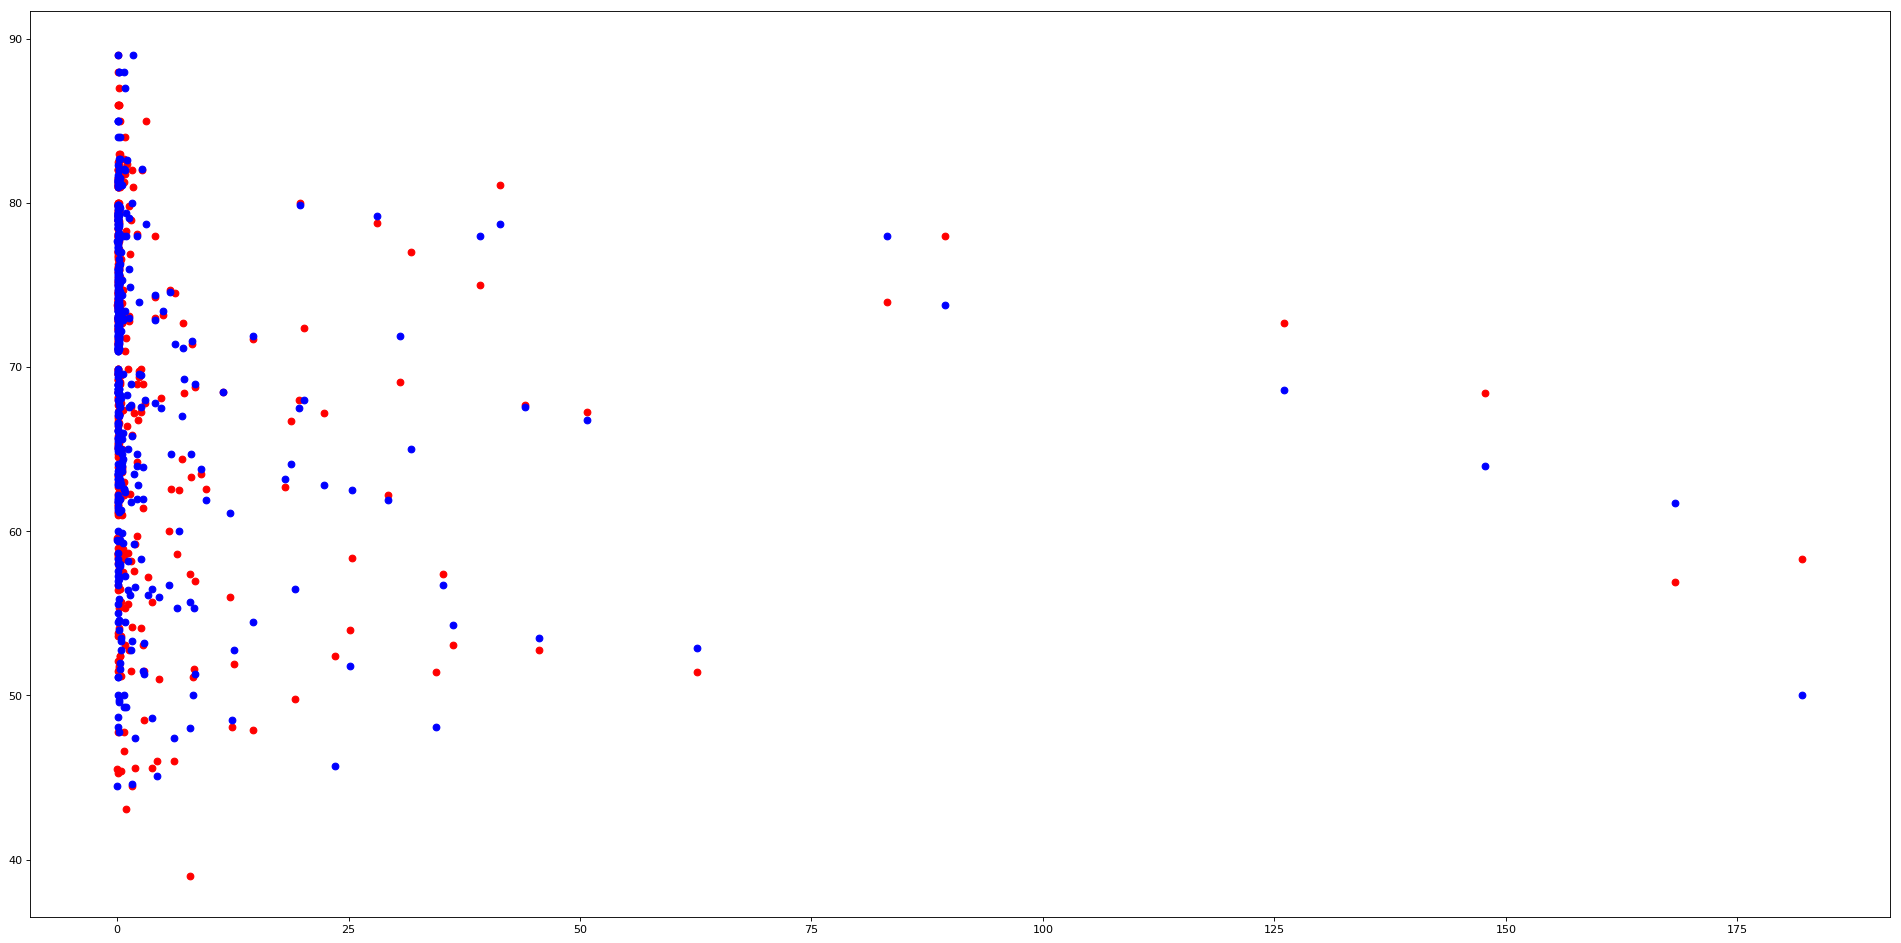

DecisionTreeRegressor {'criterion': 'friedman_mse', 'max_depth': 2}
Mean squared error: 38.54661270641549
Variance: 0.5880865596116237
Coeficients for combinations between columns of power = 0 or 1 or 2 or 3 - (ex: a, b, c, a * b * c^3, c^3)
[0.0, 0.82145422706481, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,

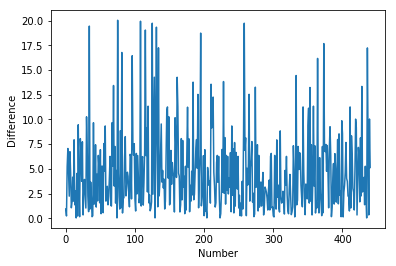

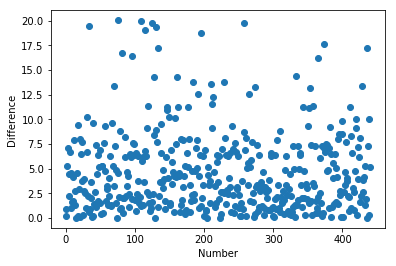

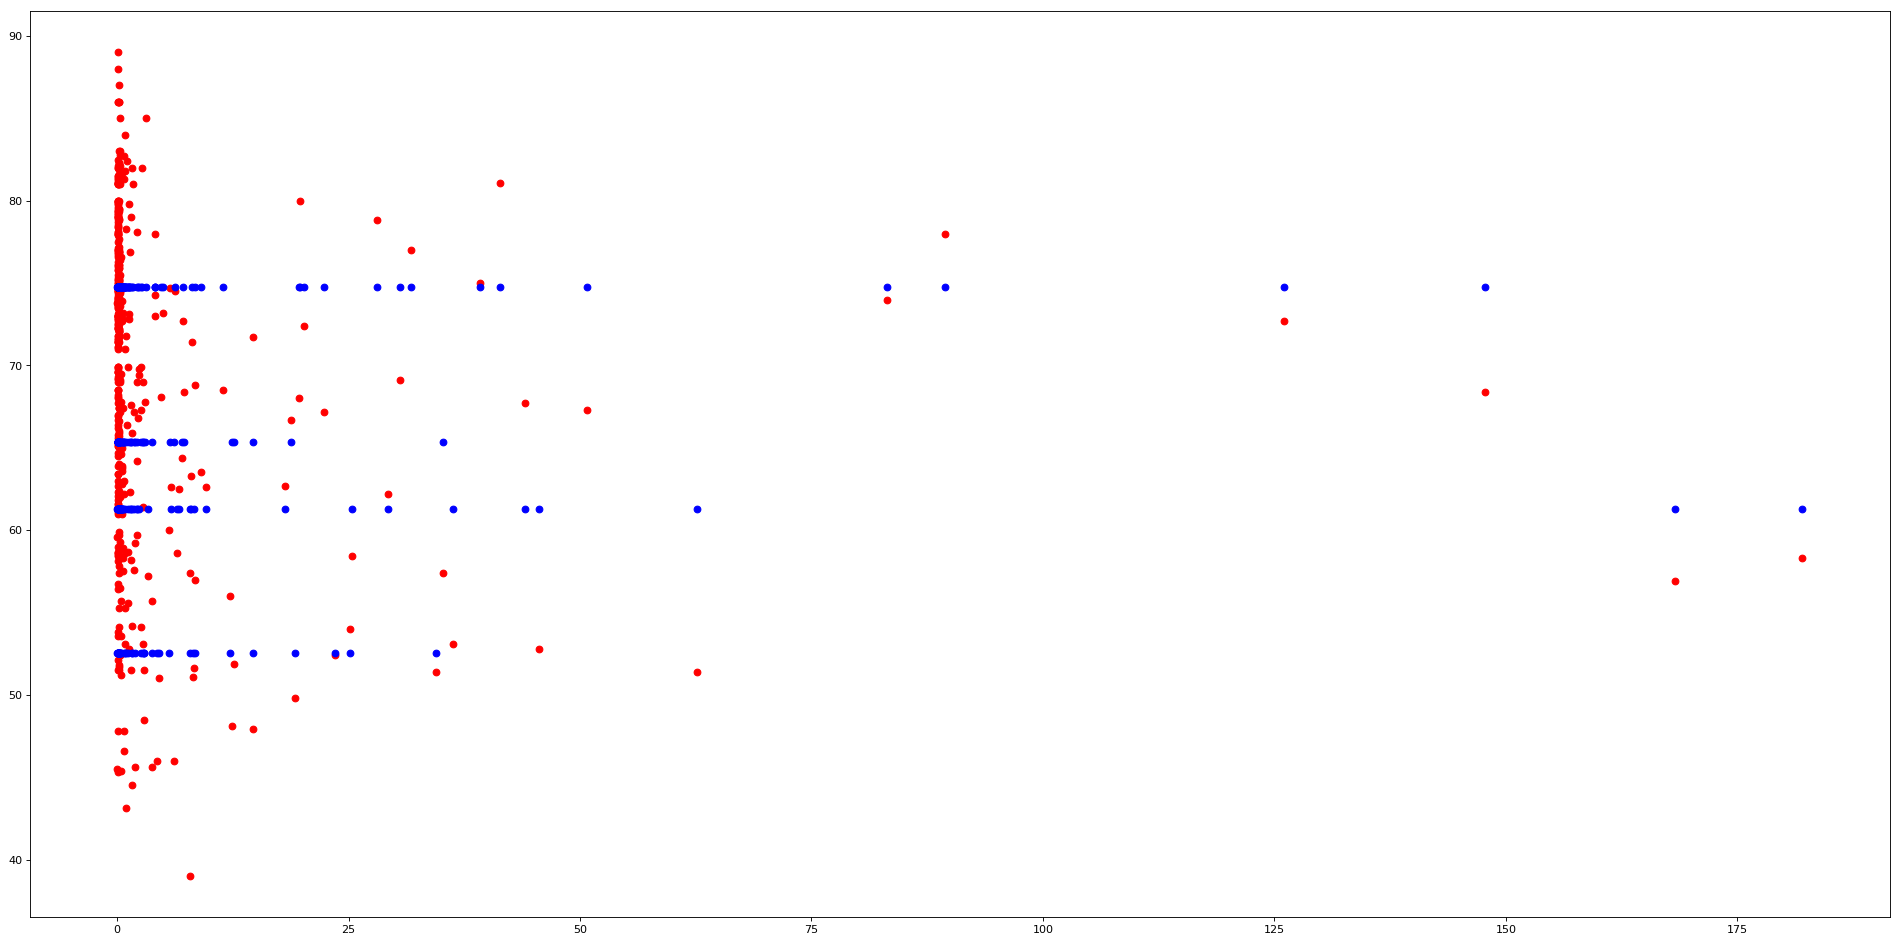

DecisionTreeRegressor {'criterion': 'friedman_mse', 'max_depth': 5}
Mean squared error: 14.598213825078446
Variance: 0.8440018445716135
Coeficients for combinations between columns of power = 0 or 1 or 2 or 3 - (ex: a, b, c, a * b * c^3, c^3)
[0.0, 0.6472377515445005, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00024155727555181644, 0.0, 0.017239320057832533, 0.0, 0.10517816465462268, 0.0, 0.0, 0.0, 0.0, 0.0004185550127853729, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.009585969897473604, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0011203855379105755, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.006106805724101941, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0014208752790587221, 0.0, 0.0026292480726179076, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.012053

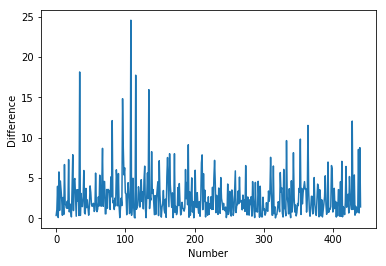

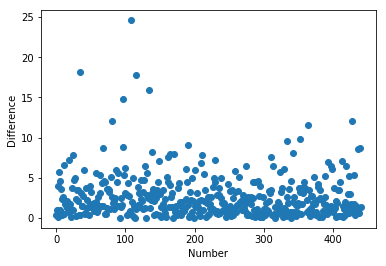

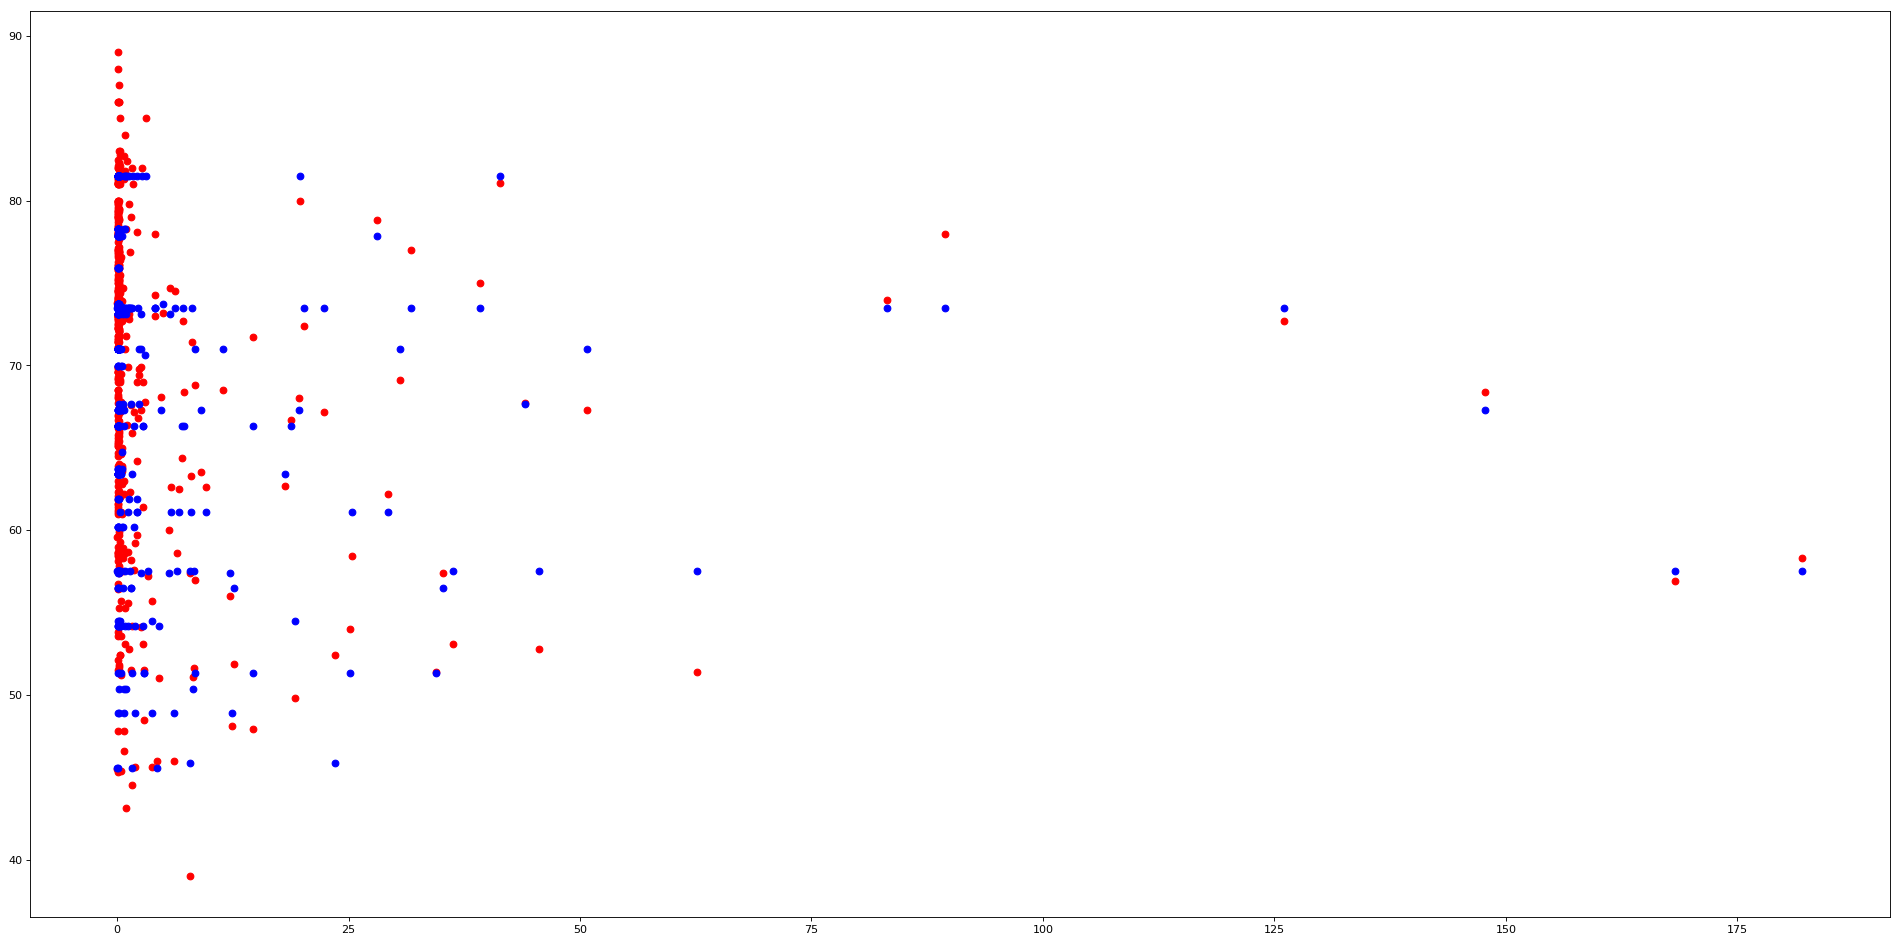

DecisionTreeRegressor {'criterion': 'friedman_mse', 'max_depth': 7}
Mean squared error: 11.598407333559136
Variance: 0.876058114258196
Coeficients for combinations between columns of power = 0 or 1 or 2 or 3 - (ex: a, b, c, a * b * c^3, c^3)
[0.0, 0.5865450173845665, 0.0, 0.0008921675037878835, 0.0, 0.00010888250904614994, 0.0, 0.0, 0.0, 0.0012513275313668793, 0.0, 0.0, 0.00010050229437730538, 0.0, 0.0, 0.005632136859742638, 0.0, 0.016049601159035254, 0.000382104119006394, 0.13696469913339848, 0.0, 0.0, 0.0006887326623442867, 0.0, 0.0, 0.0, 0.0, 8.994527578401094e-05, 0.0, 3.169815966174295e-05, 0.0, 0.0, 0.001614854059125982, 0.0, 1.3745355120370726e-05, 0.00020295880873943625, 1.623442173355956e-05, 0.0, 0.0, 0.0, 0.0, 0.007868224032149282, 3.0471248605869493e-05, 8.612079891903118e-07, 0.0, 0.00038966971990692356, 0.0, 0.0007314622441697918, 1.9421061160734865e-07, 0.001043065559865248, 0.0, 8.92261019990511e-05, 0.00012188499442185584, 0.0, 0.00019633796471888305, 0.000396886732576

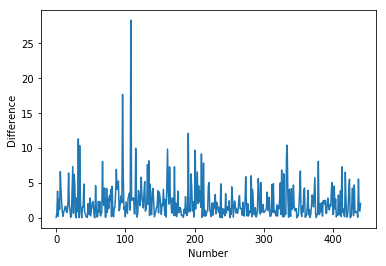

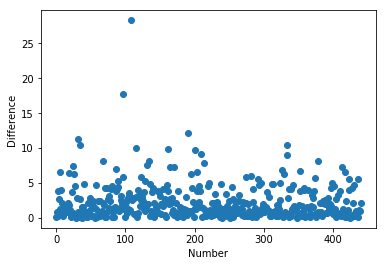

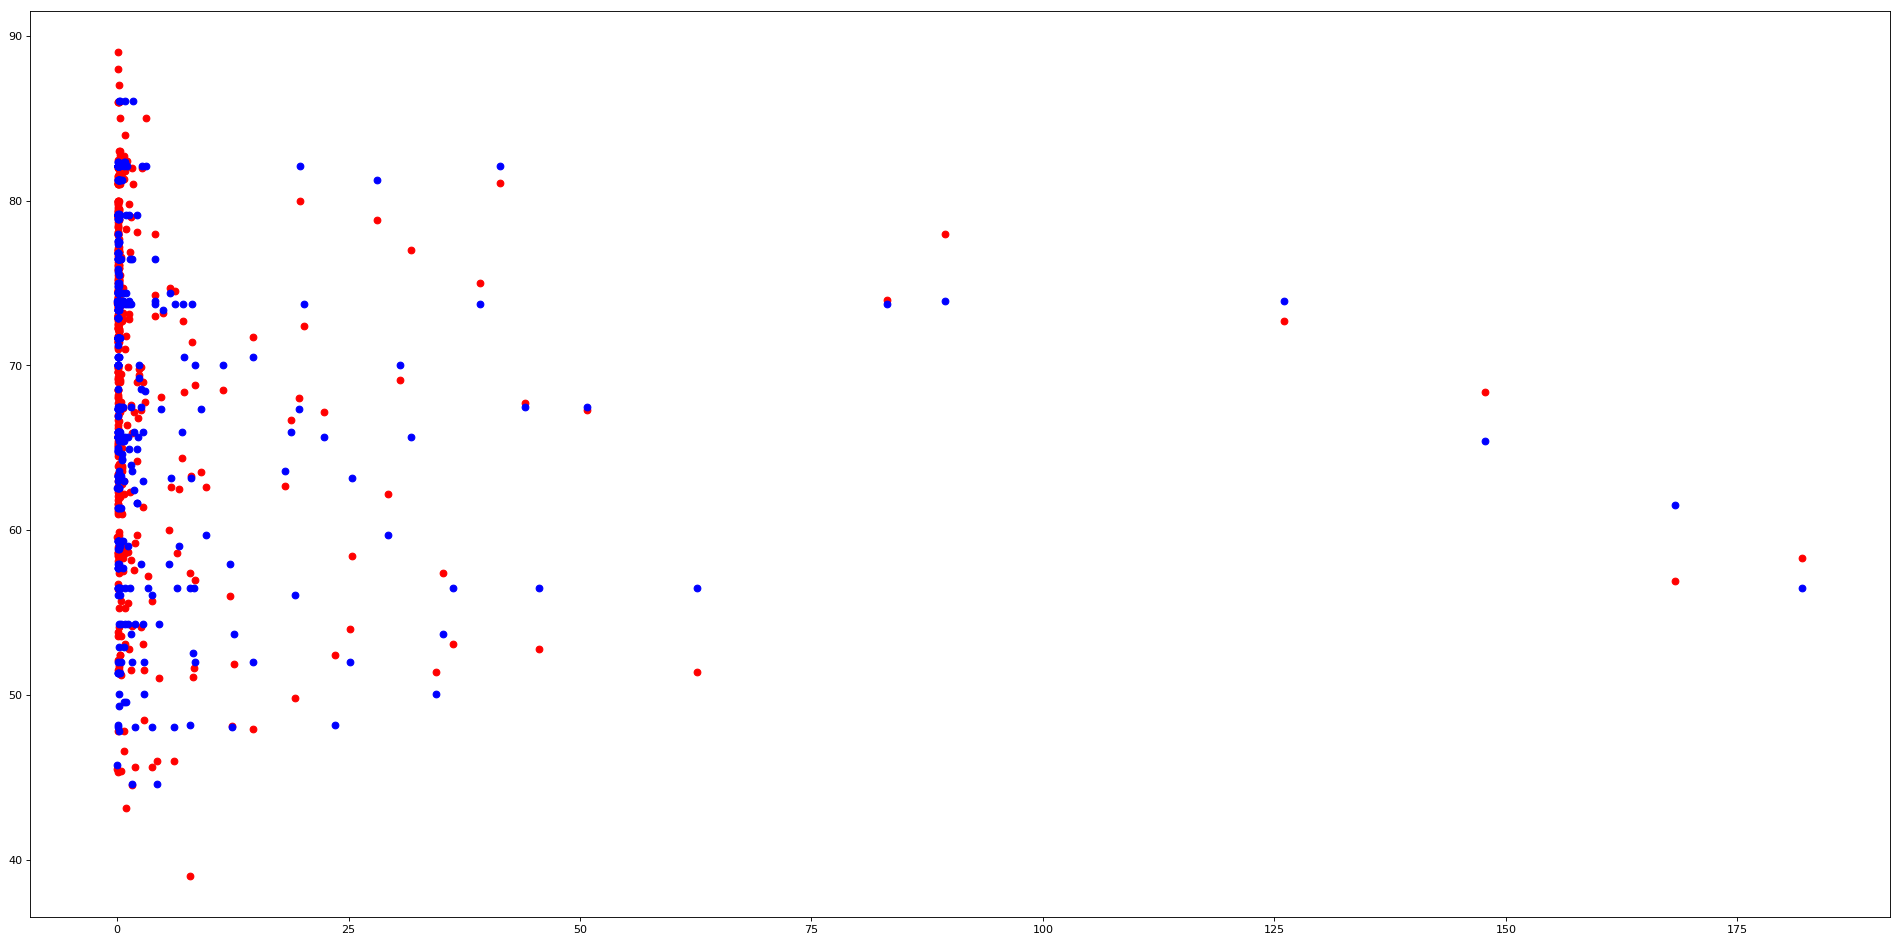

DecisionTreeRegressor {'criterion': 'friedman_mse', 'max_depth': 10}
Mean squared error: 10.60548777618724
Variance: 0.8866685643649544
Coeficients for combinations between columns of power = 0 or 1 or 2 or 3 - (ex: a, b, c, a * b * c^3, c^3)
[0.0, 0.6029970456124278, 0.0002141836243832209, 1.216049599126331e-06, 0.0, 0.008564774375952773, 0.001028226216064068, 0.0002771898681872984, 0.0012461593374983257, 0.00037964821100990856, 0.0, 0.00027659923918121155, 0.0015107203311165449, 0.0003724218226374802, 0.00017715955272533732, 0.004868202072145171, 0.0002460787429221818, 0.018820725421922212, 5.77315778449472e-05, 0.09226699911286157, 5.003175493656452e-05, 1.311524567680301e-05, 2.6363905059705168e-05, 1.2601108742167406e-05, 0.00014527988068254946, 0.00019299171092599564, 0.0003891368577961937, 0.0, 0.0, 0.0010391671831627316, 0.0013919879783314733, 0.0012386163785704635, 0.00021813991594981332, 0.001575945260927182, 0.00020071602133761433, 0.0, 1.2738370800888292e-06, 6.134542575764

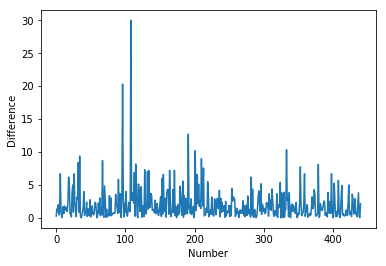

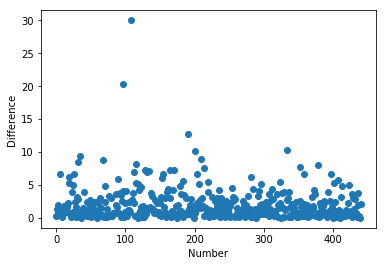

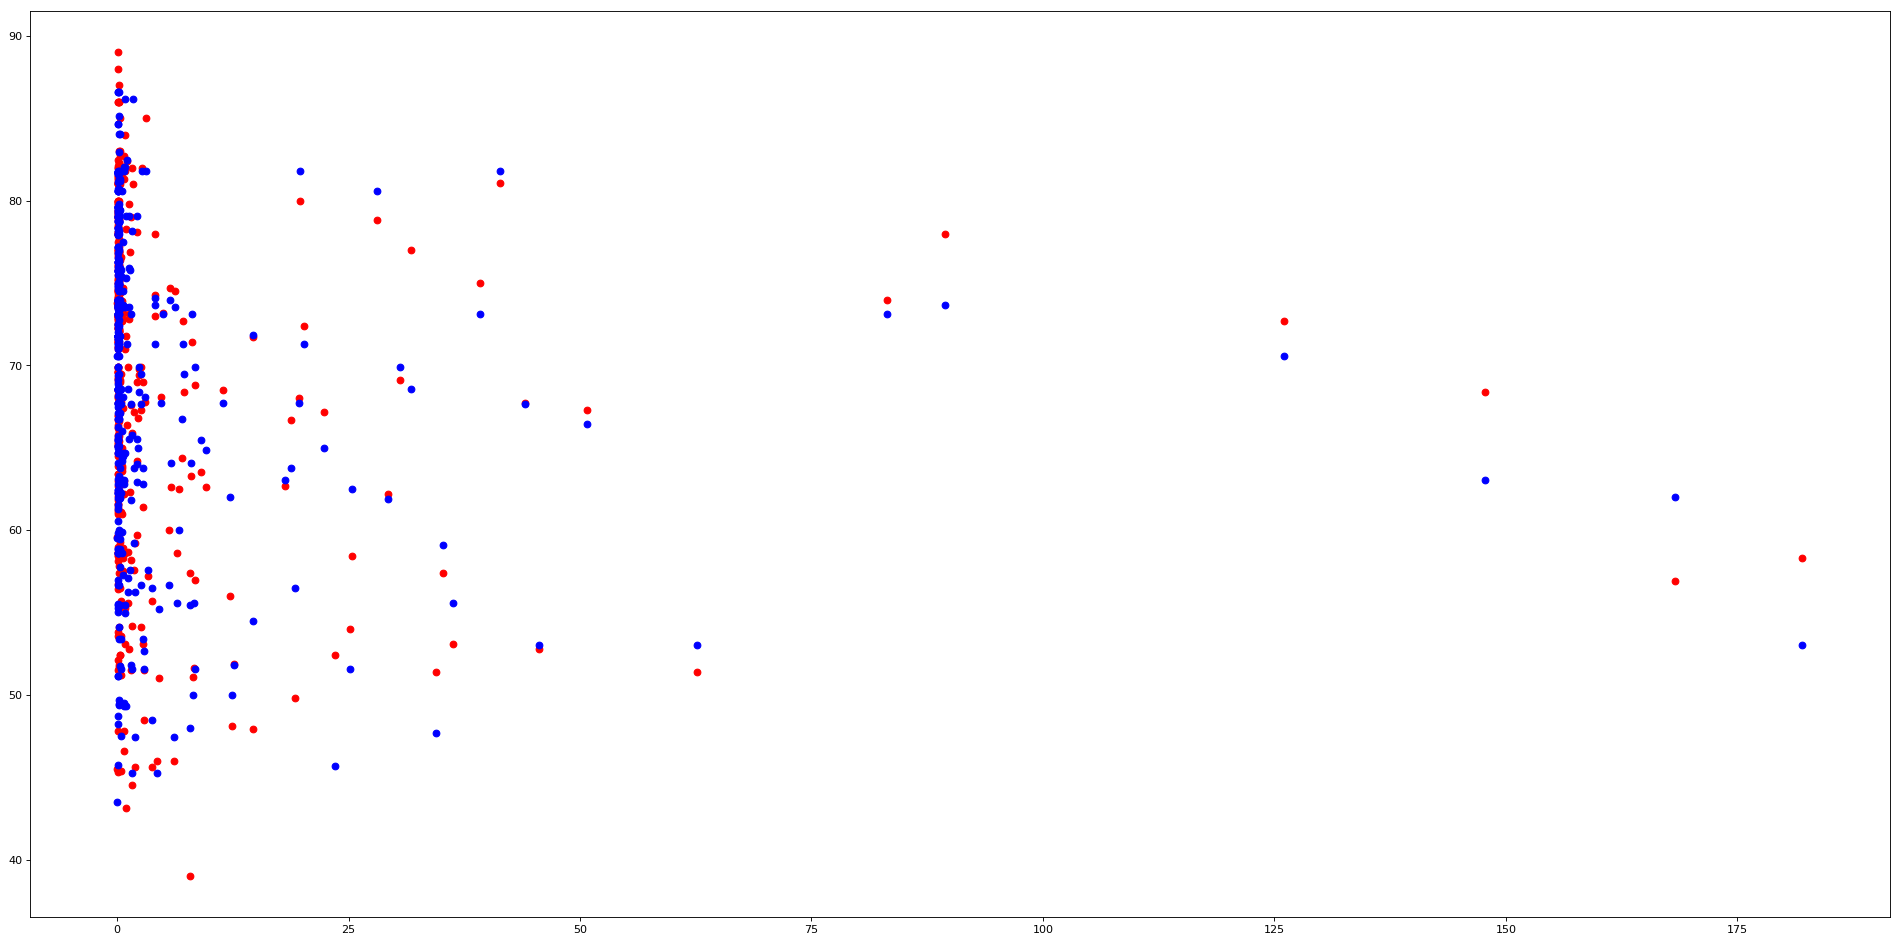

DecisionTreeRegressor {'criterion': 'mae'}
Mean squared error: 16.368894557823126
Variance: 0.8250801510363245
Coeficients for combinations between columns of power = 0 or 1 or 2 or 3 - (ex: a, b, c, a * b * c^3, c^3)
[0.0, 0.09998151200311911, 0.0018537914984769971, 0.00021431115589329503, 0.00030539339714794414, 0.004966661037827098, 0.0014305269655877407, 0.0014680314178690667, 0.0015323247646370534, 0.00039647563840259357, 0.0, 0.001446600302279733, 0.006273959088776187, 0.0004554112062732496, 0.004420167590299207, 0.0034879140621633603, 0.004278179130149813, 0.0019288004030396516, 0.0014090958499984097, 0.47031648861066827, 0.0008893912969571699, 6.429334676798843e-05, 0.001012620211595815, 0.0025824494285141973, 0.006016785701704251, 0.009322535281358377, 0.0006536490254745481, 0.0009322535281358332, 0.0006857956988585384, 0.0017252048049410155, 0.0018591492773743258, 0.0025770916496168634, 0.0012483624830784328, 0.00042728652674729257, 0.001430526965587741, 0.0003214667338399406

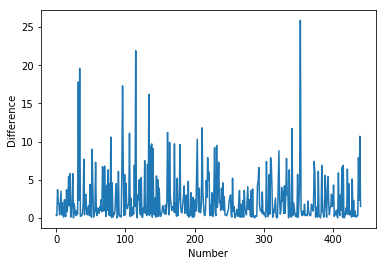

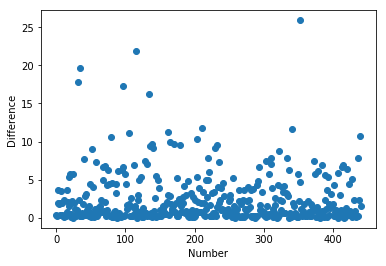

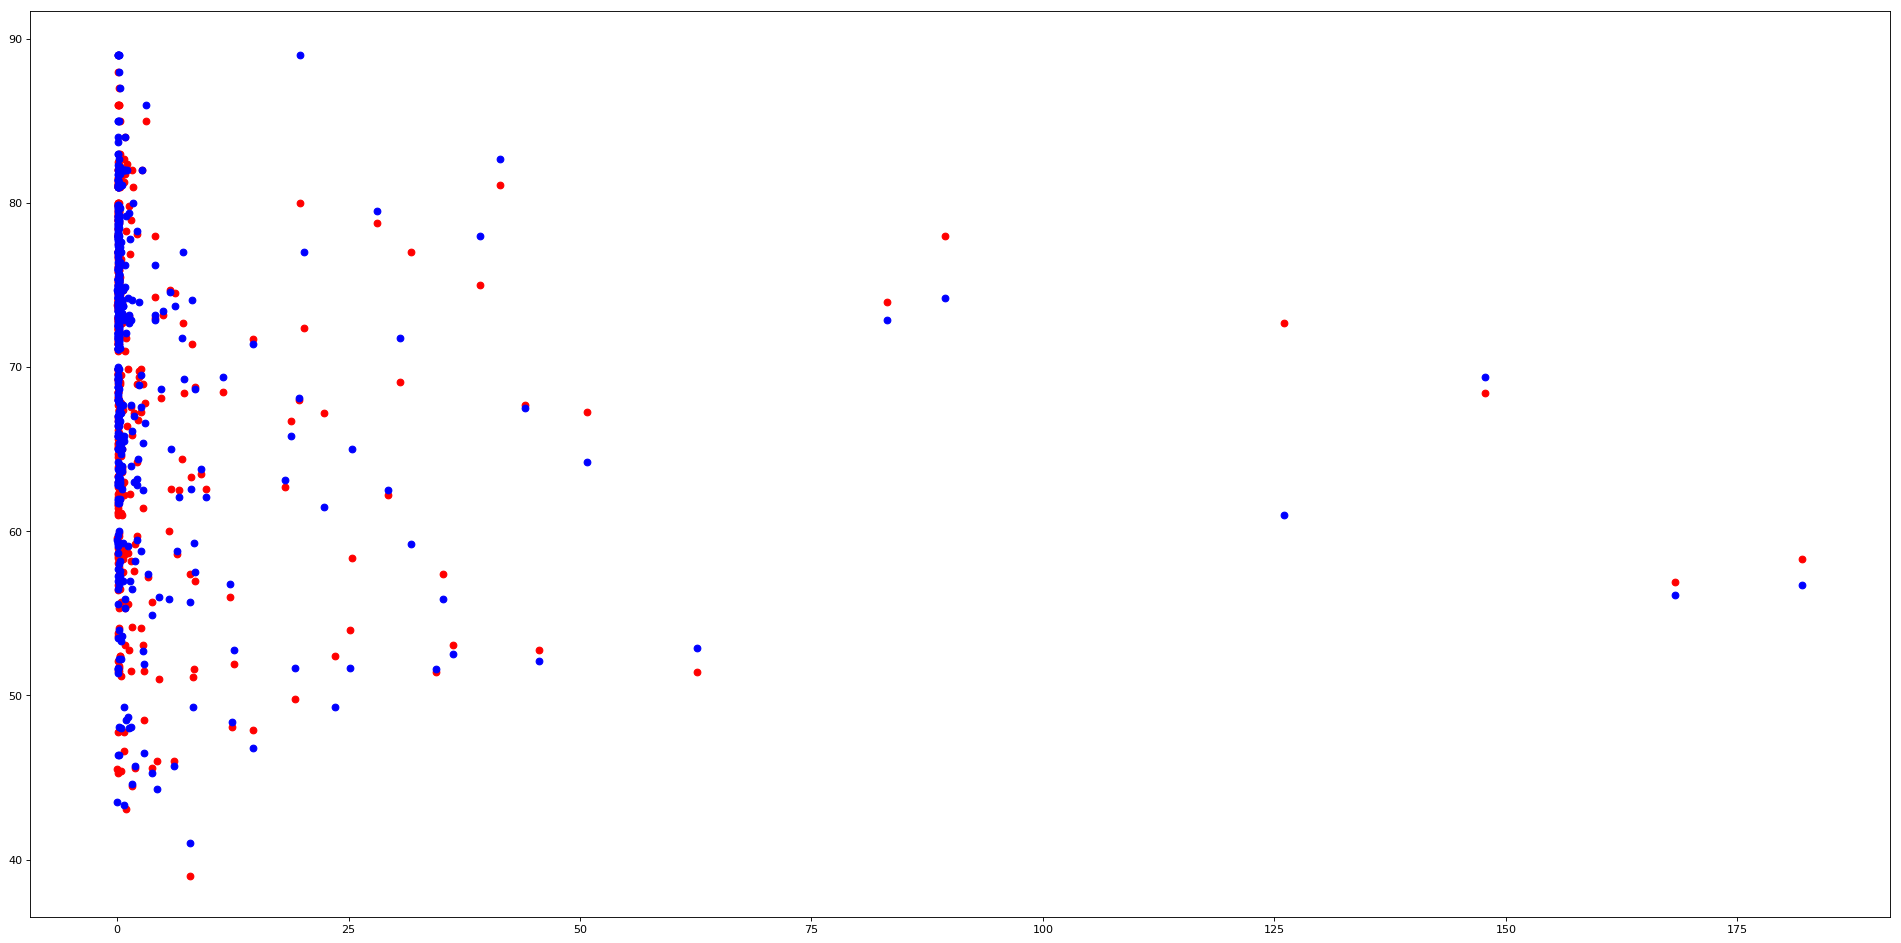

DecisionTreeRegressor {'criterion': 'mae', 'max_depth': 2}
Mean squared error: 39.77981859410431
Variance: 0.5749083827436843
Coeficients for combinations between columns of power = 0 or 1 or 2 or 3 - (ex: a, b, c, a * b * c^3, c^3)
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.8557366467645655, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.14426335323543443, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 

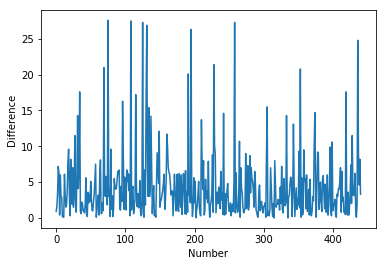

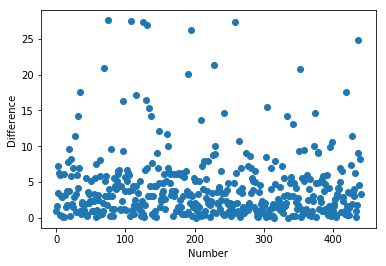

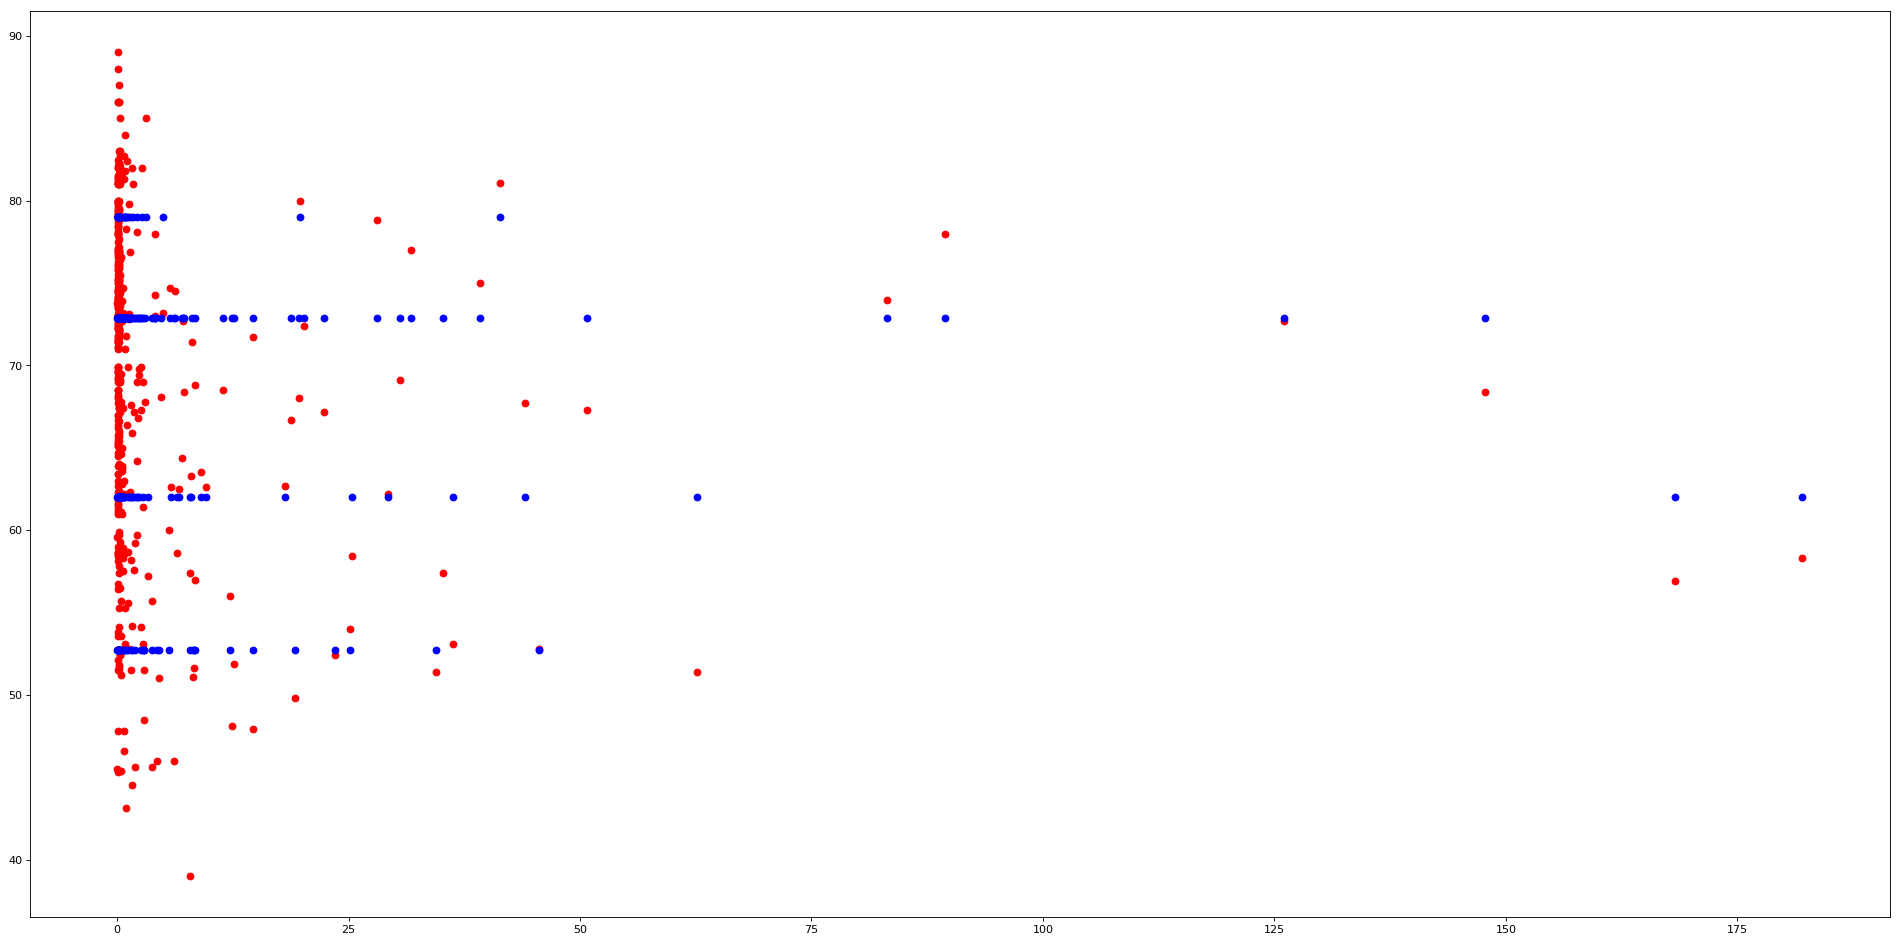

DecisionTreeRegressor {'criterion': 'mae', 'max_depth': 5}
Mean squared error: 14.984348072562359
Variance: 0.8398755705577517
Coeficients for combinations between columns of power = 0 or 1 or 2 or 3 - (ex: a, b, c, a * b * c^3, c^3)
[0.0, 0.18582464430973641, 0.0, 0.0, 0.0, 0.0004927606064148833, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0013473922831656905, 0.0, 0.0, 0.0, 0.5808415648115398, 0.0, 0.0, 0.0, 0.009208547978656409, 0.0, 0.009624230594040757, 0.0012396009005124348, 0.0, 0.0, 0.000692944602770926, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.002594692568153377, 0.0, 0.0, 0.0, 0.0, 0.00284107287136081, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0016476682776997633, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0027255821042323114, 0.0, 0.09636549609201188, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.010116991200455484, 0.0, 0.0010394169041563867, 0.0, 0.0, 0.0, 0.0020326375014613923, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00383429346866

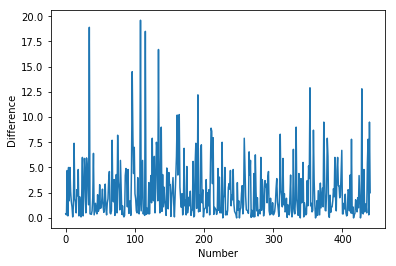

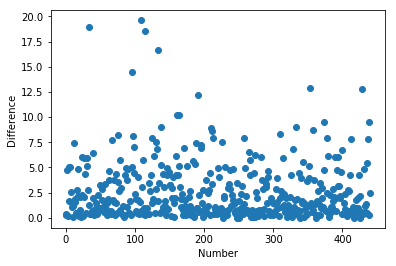

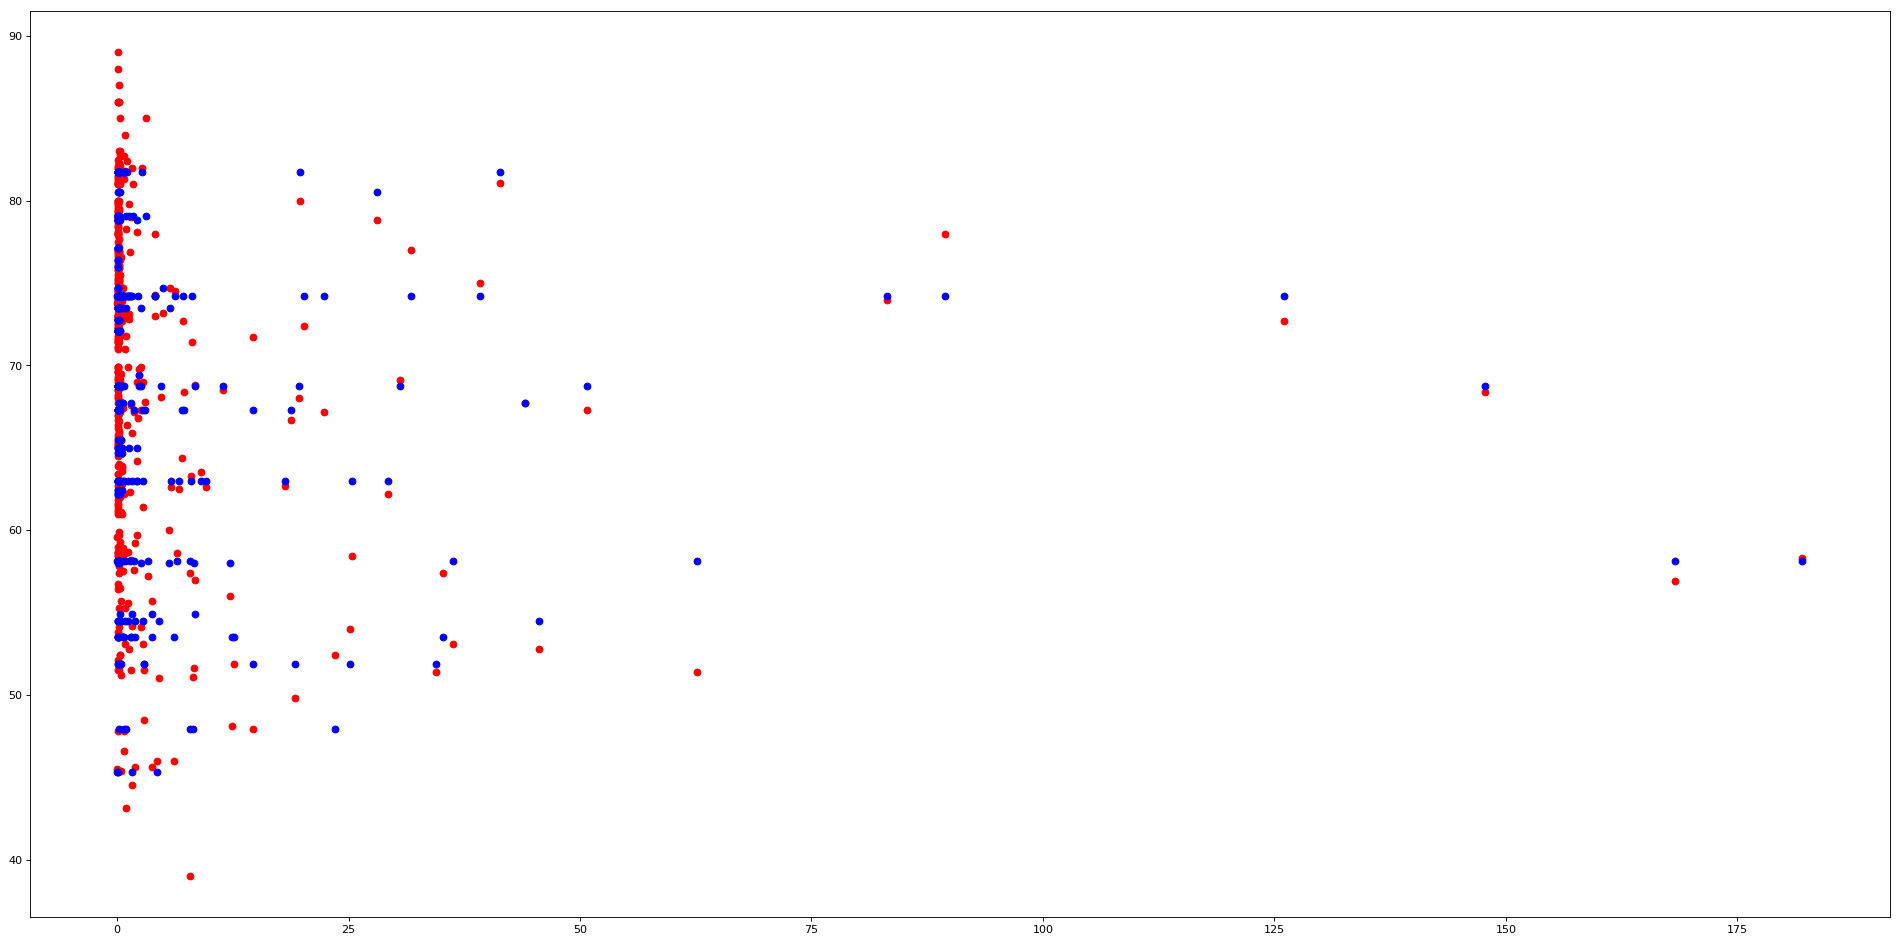

DecisionTreeRegressor {'criterion': 'mae', 'max_depth': 7}
Mean squared error: 11.589047619047617
Variance: 0.8761581332205587
Coeficients for combinations between columns of power = 0 or 1 or 2 or 3 - (ex: a, b, c, a * b * c^3, c^3)
[0.0, 0.16359709599991556, 0.0, 0.0, 0.0, 0.0022588064030486365, 0.0033743518965787893, 9.007510196206289e-05, 0.0, 0.0, 0.0, 0.004212743230225673, 0.0, 0.0, 0.00015936364193287885, 0.0015451344413492218, 0.0008799644576293748, 0.0012125494494892983, 0.0003395138458570031, 0.5561236795137711, 0.0, 0.0, 0.0, 0.0, 0.0016352095433112904, 0.009658822471931982, 0.0, 0.0004850197797957189, 0.0, 0.0, 0.0, 0.0006097391517431903, 0.0, 0.0003741581158424126, 0.0, 0.0, 0.0, 0.0002771541598832679, 0.0, 0.0, 0.0, 0.007081288785017501, 0.0, 0.005300573307767498, 0.00233502379701652, 0.0018153597472354071, 0.00011086166395330776, 0.0, 0.0, 0.0, 0.0, 0.005390648409729397, 0.001441201631392996, 0.0, 0.0016906403752879318, 0.0, 0.0, 0.0, 0.0, 0.0014827747553754849, 0.0, 0.0

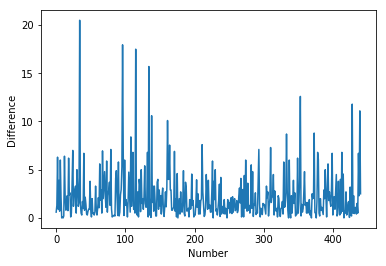

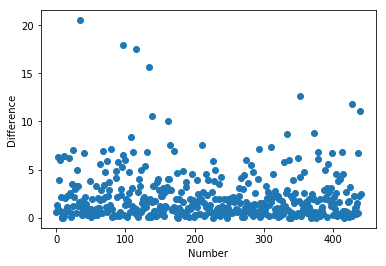

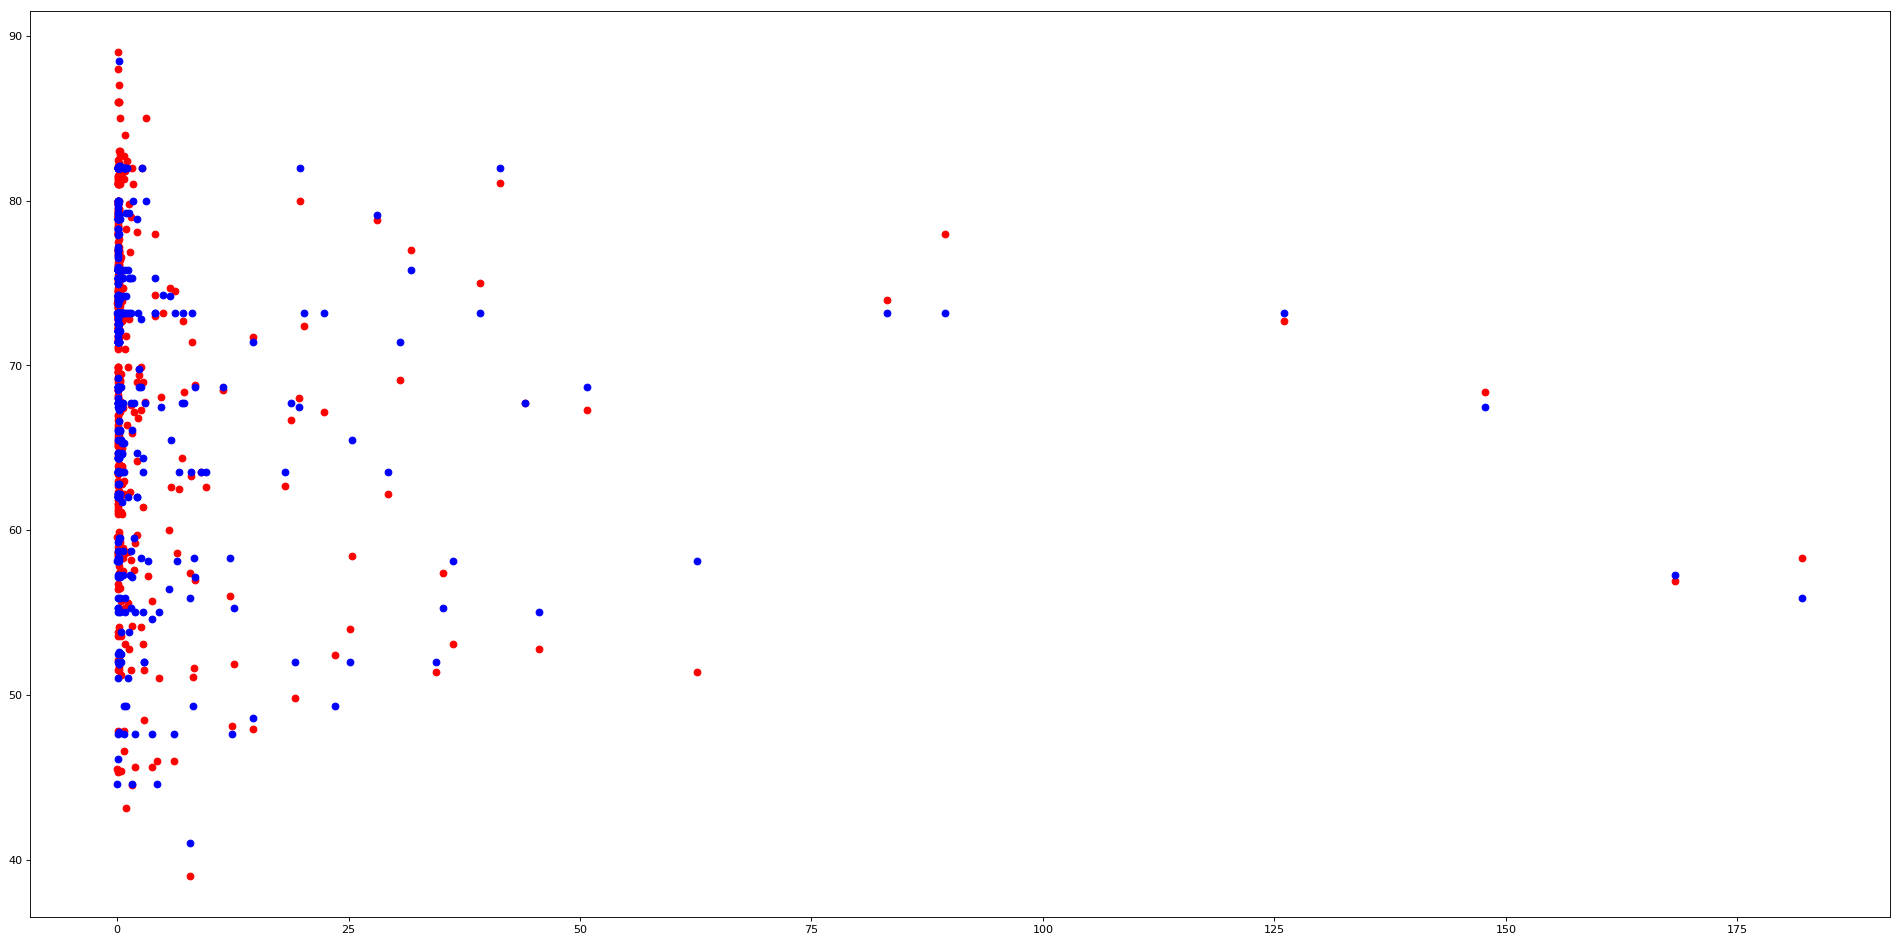

DecisionTreeRegressor {'criterion': 'mae', 'max_depth': 10}
Mean squared error: 14.56519105550675
Variance: 0.8443547296027583
Coeficients for combinations between columns of power = 0 or 1 or 2 or 3 - (ex: a, b, c, a * b * c^3, c^3)
[0.0, 0.13100707124105807, 0.0006135149838196083, 0.0, 0.00014873090516839035, 0.0037926380817939463, 0.0028382814402967815, 0.0015616745042680948, 0.0012394242097365827, 0.0002664762050933661, 0.0, 0.004375167460370139, 0.0013633666307102418, 1.8591363146048573e-05, 0.0029746181033678165, 0.0050754421388713505, 0.002218569335428489, 0.00026647620509336436, 0.001561674504268105, 0.5149187879350638, 6.197121048683005e-06, 0.00029746181033678027, 0.0003036589313854642, 0.00043379847340780465, 0.0016670255620957009, 0.008291747963137855, 0.0006630919522090728, 0.0002107021156552195, 0.0002664762050933661, 0.0010225249730326813, 0.00043379847340780416, 0.0005081639259919998, 3.718272629209891e-05, 0.00041520711026175563, 0.000650697710111708, 0.000669289073257

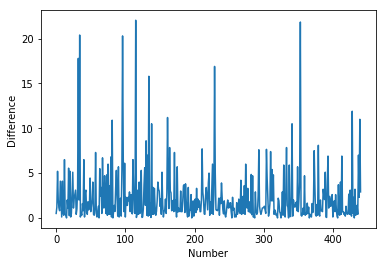

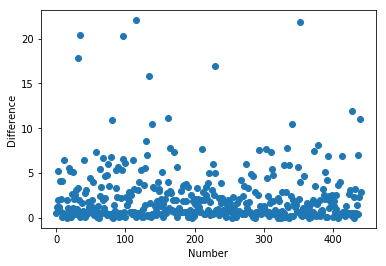

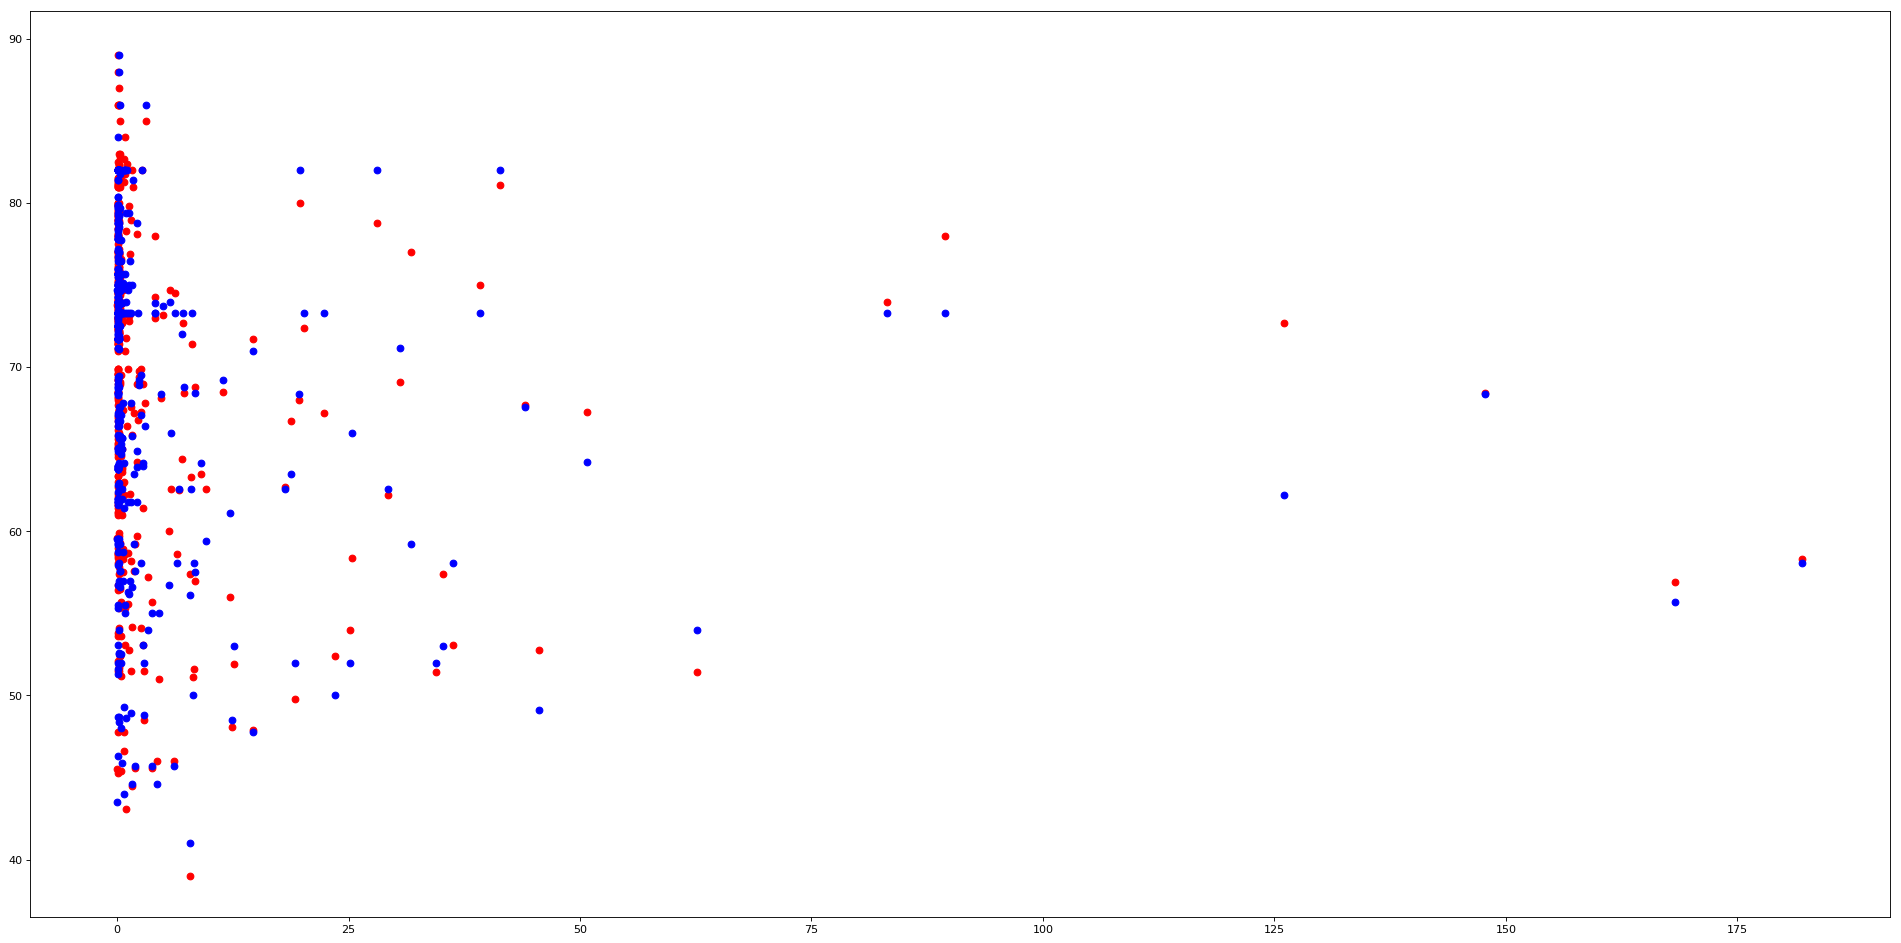

In [0]:
decision_tree_regressor_models = [
    (DecisionTreeRegressor, {}),
    (DecisionTreeRegressor, {"max_depth" : 2}),
    (DecisionTreeRegressor, {"max_depth" : 5}),
    (DecisionTreeRegressor, {"max_depth" : 7}),
    (DecisionTreeRegressor, {"max_depth" : 10}),
    (DecisionTreeRegressor, {'criterion': "friedman_mse"}),
    (DecisionTreeRegressor, {'criterion': "friedman_mse", "max_depth" : 2}),
    (DecisionTreeRegressor, {'criterion': "friedman_mse", "max_depth" : 5}),
    (DecisionTreeRegressor, {'criterion': "friedman_mse", "max_depth" : 7}),
    (DecisionTreeRegressor, {'criterion': "friedman_mse", "max_depth" : 10}),
    (DecisionTreeRegressor, {'criterion': "mae"}),
    (DecisionTreeRegressor, {'criterion': "mae", "max_depth" : 2}),
    (DecisionTreeRegressor, {'criterion': "mae", "max_depth" : 5}),
    (DecisionTreeRegressor, {'criterion': "mae", "max_depth" : 7}),
    (DecisionTreeRegressor, {'criterion': "mae", "max_depth" : 10}),
]


for i, (Model, kwargs) in enumerate(decision_tree_regressor_models):
  model = Model(**kwargs)
  model.fit(X_train_poly, y_train)
  y_predicted = model.predict(X_test_poly)
  mse = mean_squared_error(y_test, y_predicted)
  variance = r2_score(y_test, y_predicted)

  print(Model.__name__, kwargs)
  print("Mean squared error:", mse)
  print("Variance:", r2_score(y_test, y_predicted))
  pretty_print_coeficients_poly_decision_tree(model)
  print("--------------------------------------------------------------------------------------------------------")
  print()
  
  plot_y_difference(y_test, y_predicted)
  plot_expected_and_trained_data(X_test_poly, y_test, y_predicted)

# Random Forest - Regression

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor {}
Mean squared error: 6.0741171091352015
Variance: 0.9350913011526598
Adult Mortality: 0.6937264171867918
Alcohol: 0.01739831982270982
Hepatitis B: 0.005492325467192175
Measles : 0.0055051681831370875
 BMI : 0.07106403043945964
Polio: 0.036502031831579976
Total expenditure: 0.010544376086572887
Diphtheria : 0.0635171920653017
GDP: 0.027152038385548742
Status: 0.06909810053170615
Most important coeficient:  Adult Mortality
--------------------------------------------------------------------------------------------------------



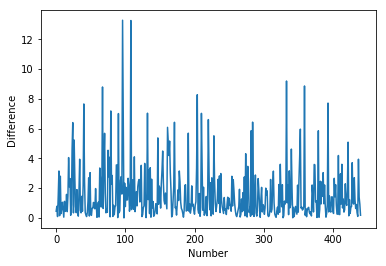

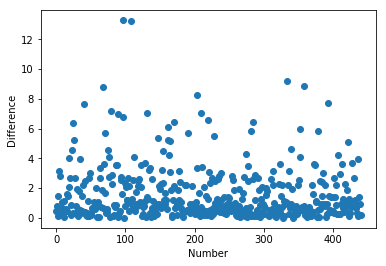

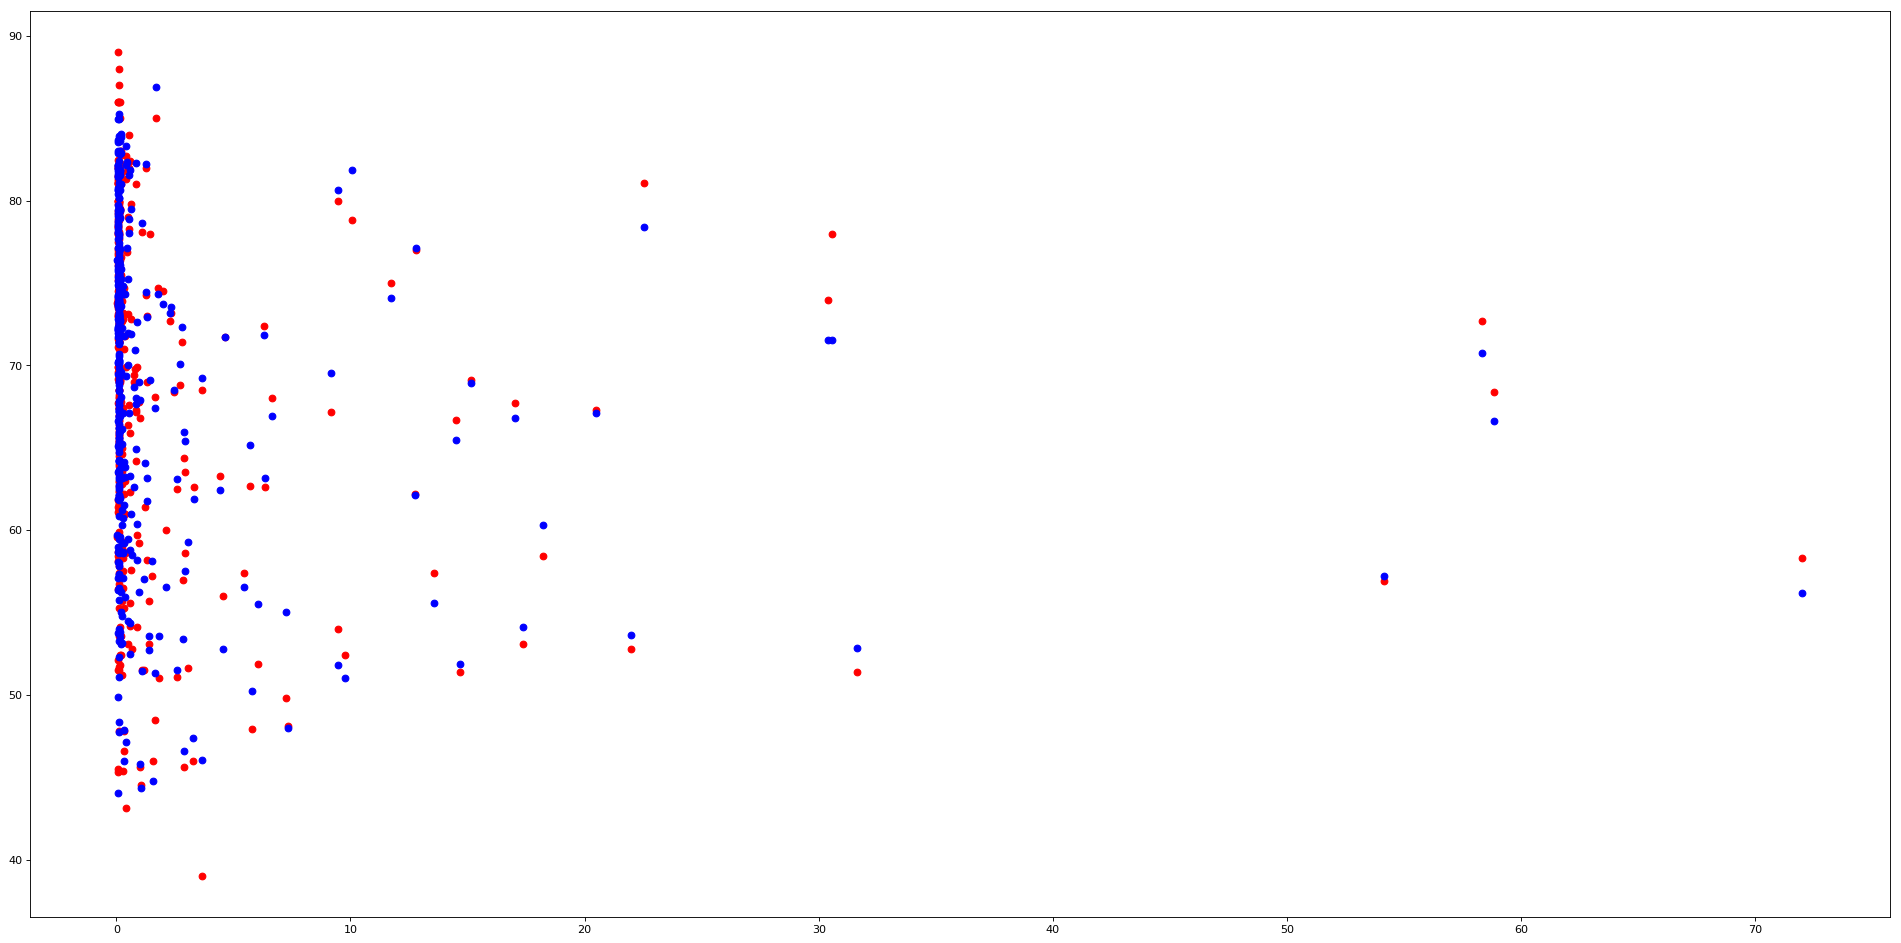

RandomForestRegressor {'n_estimators': 5}
Mean squared error: 7.198311981381982
Variance: 0.923078028260926
Adult Mortality: 0.6977757270376066
Alcohol: 0.02218959514659746
Hepatitis B: 0.004662298598696365
Measles : 0.007970927585222191
 BMI : 0.08216746070787405
Polio: 0.029954453603016948
Total expenditure: 0.011967713779301066
Diphtheria : 0.07728305371624426
GDP: 0.020649465454033927
Status: 0.045379304371407164
Most important coeficient:  Adult Mortality
--------------------------------------------------------------------------------------------------------



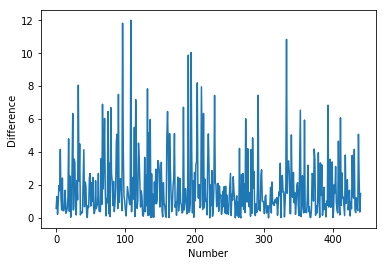

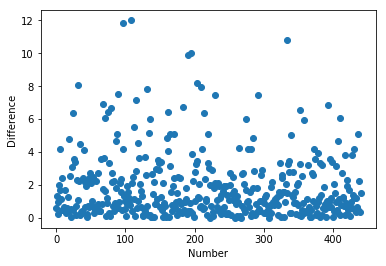

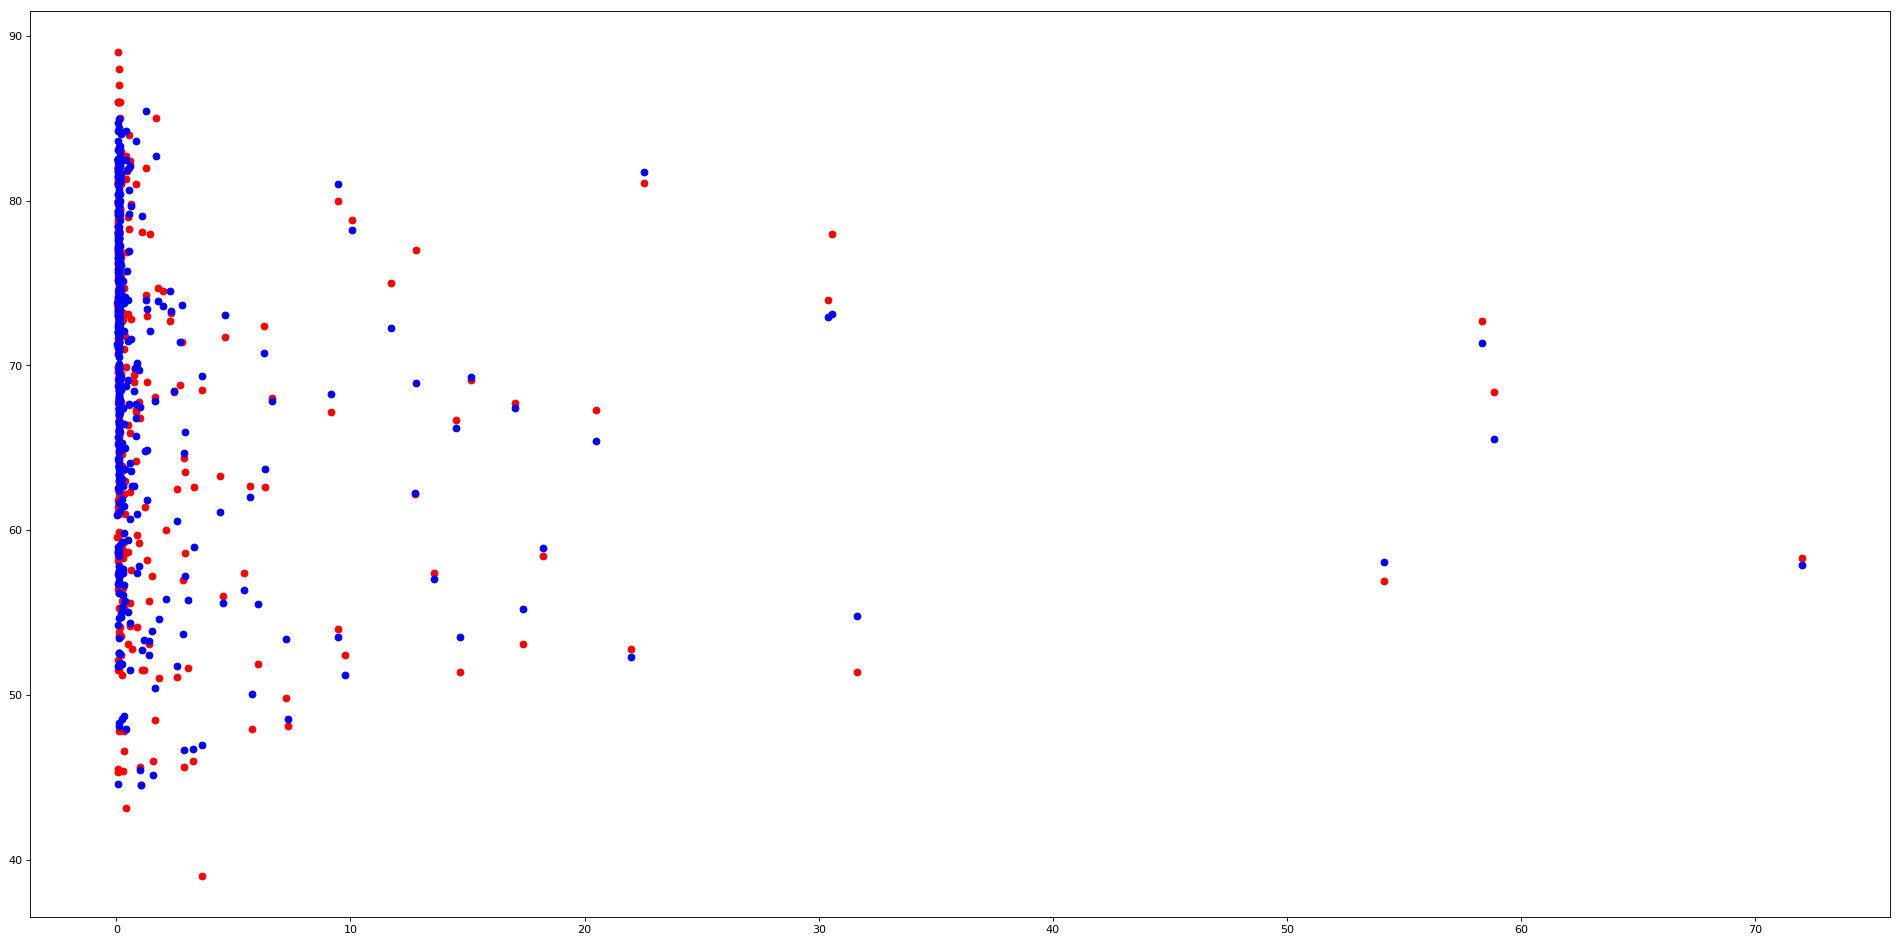

RandomForestRegressor {'n_estimators': 20}
Mean squared error: 5.965349459464141
Variance: 0.9362536044948548
Adult Mortality: 0.6870094780614686
Alcohol: 0.02086860761979533
Hepatitis B: 0.006048072524815073
Measles : 0.008081547056935045
 BMI : 0.08631937121928496
Polio: 0.018635551677813205
Total expenditure: 0.013435779529795341
Diphtheria : 0.08101554747740651
GDP: 0.023886206702476577
Status: 0.05469983813020938
Most important coeficient:  Adult Mortality
--------------------------------------------------------------------------------------------------------



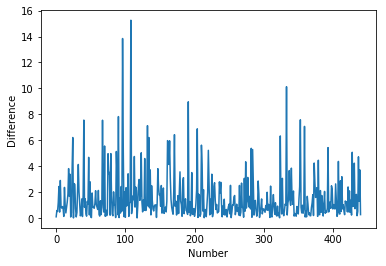

RandomForestRegressor {'n_estimators': 50}
Mean squared error: 5.5170861043548625
Variance: 0.9410437971431538
Adult Mortality: 0.7036930897932036
Alcohol: 0.02099173070833555
Hepatitis B: 0.006276523680209285
Measles : 0.006505213182882417
 BMI : 0.07724037417915457
Polio: 0.014895826127403837
Total expenditure: 0.011293208160324005
Diphtheria : 0.07417360293676718
GDP: 0.02236662091616933
Status: 0.06256381031555033
Most important coeficient:  Adult Mortality
--------------------------------------------------------------------------------------------------------



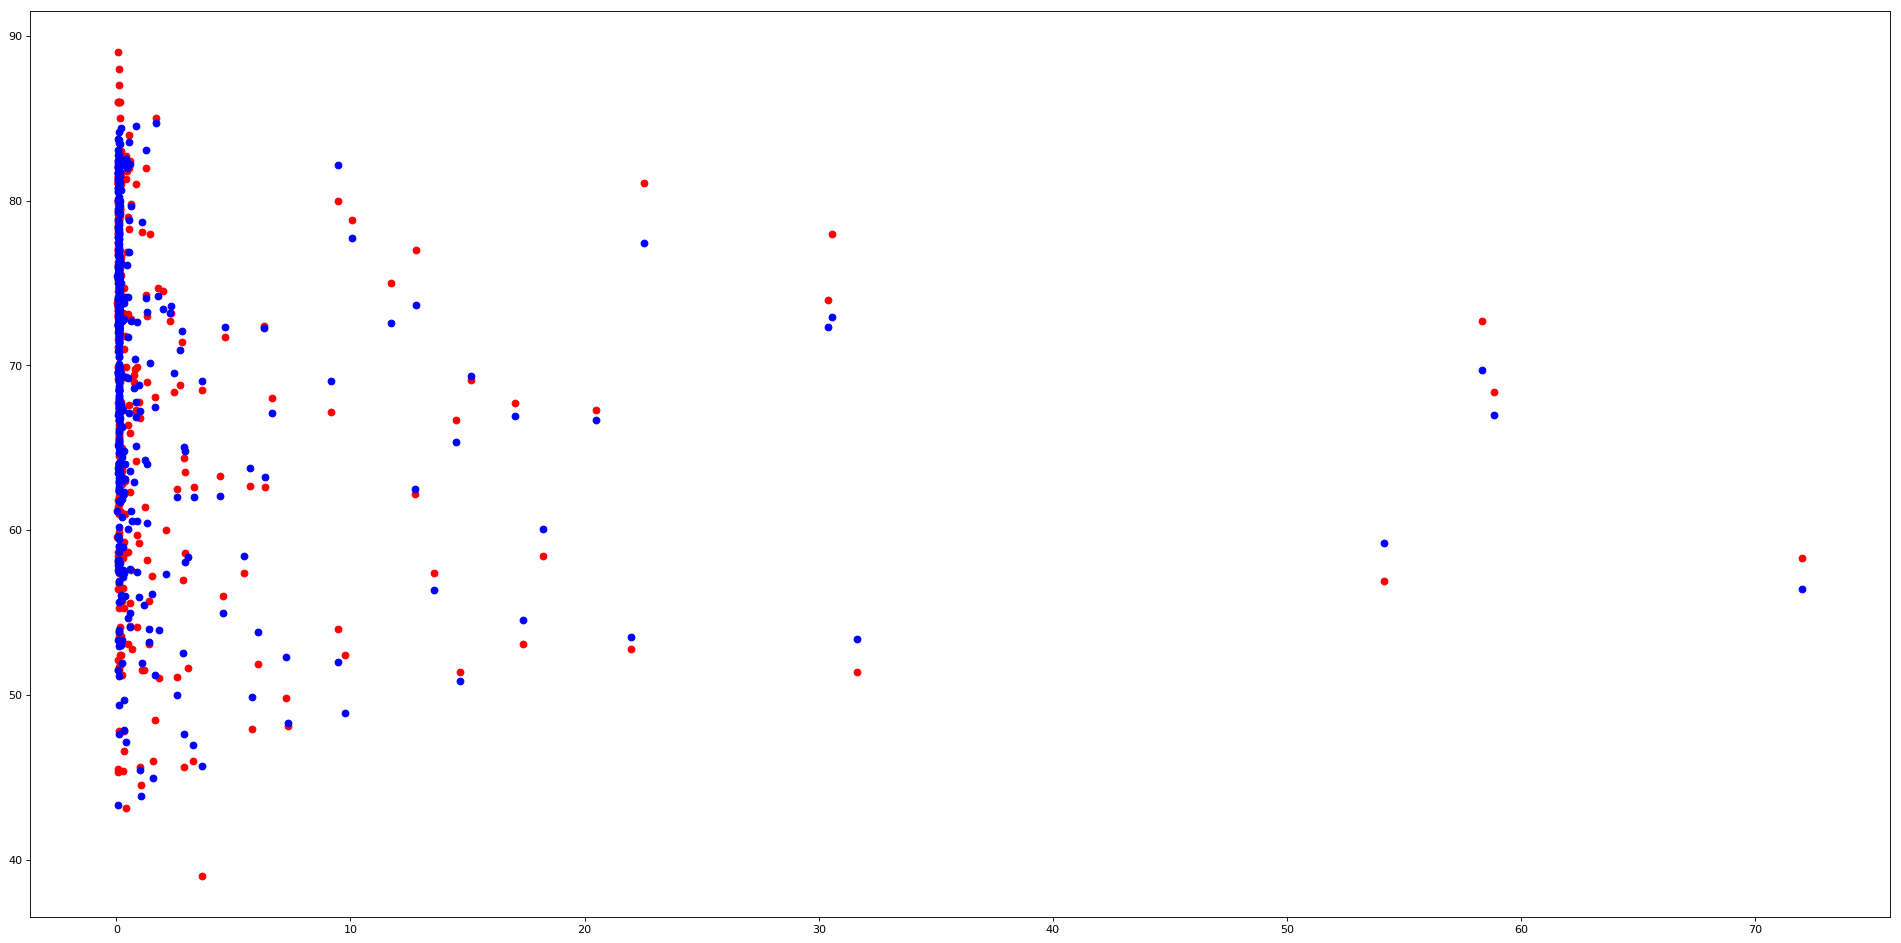

RandomForestRegressor {'n_estimators': 100}
Mean squared error: 5.526614461278294
Variance: 0.9409419760490029
Adult Mortality: 0.6951926744400253
Alcohol: 0.019683045926723642
Hepatitis B: 0.006269122771654764
Measles : 0.006624953200424558
 BMI : 0.08319248406493375
Polio: 0.013280375598429163
Total expenditure: 0.011852999334656906
Diphtheria : 0.08731837183360953
GDP: 0.02524126458001984
Status: 0.051344708249522544
Most important coeficient:  Adult Mortality
--------------------------------------------------------------------------------------------------------



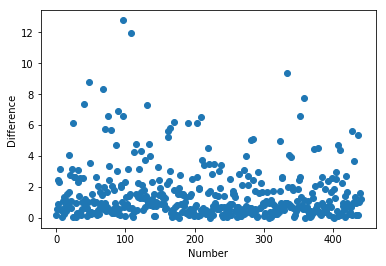

RandomForestRegressor {'n_estimators': 150}
Mean squared error: 5.537551908620847
Variance: 0.9408250972560918
Adult Mortality: 0.699938671211101
Alcohol: 0.019780079591413733
Hepatitis B: 0.00619844572989191
Measles : 0.006610673979796755
 BMI : 0.07821408926410942
Polio: 0.017315196713906755
Total expenditure: 0.01142238104588304
Diphtheria : 0.07971300621983751
GDP: 0.02396577816925274
Status: 0.05684167807480713
Most important coeficient:  Adult Mortality
--------------------------------------------------------------------------------------------------------



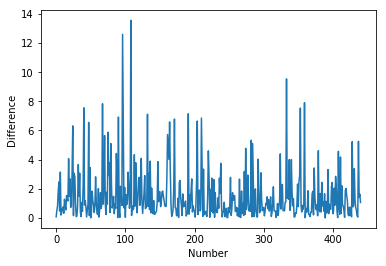

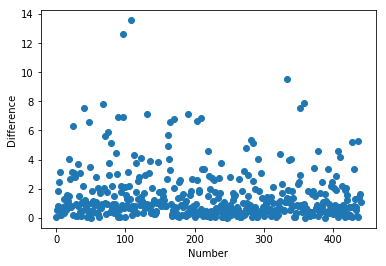

RandomForestRegressor {'n_estimators': 200}
Mean squared error: 5.43954236162052
Variance: 0.9418724383027175
Adult Mortality: 0.700343344891441
Alcohol: 0.019620692938494003
Hepatitis B: 0.006250834837006021
Measles : 0.006494915348341125
 BMI : 0.07838410867471028
Polio: 0.021190609650567828
Total expenditure: 0.011269465540902354
Diphtheria : 0.07917065628646133
GDP: 0.024073128758883306
Status: 0.05320224307319253
Most important coeficient:  Adult Mortality
--------------------------------------------------------------------------------------------------------



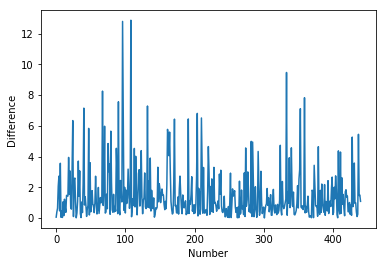

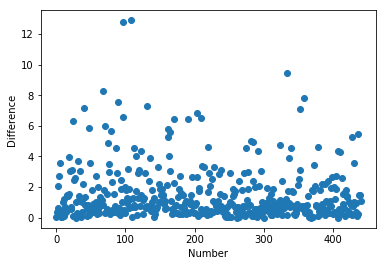

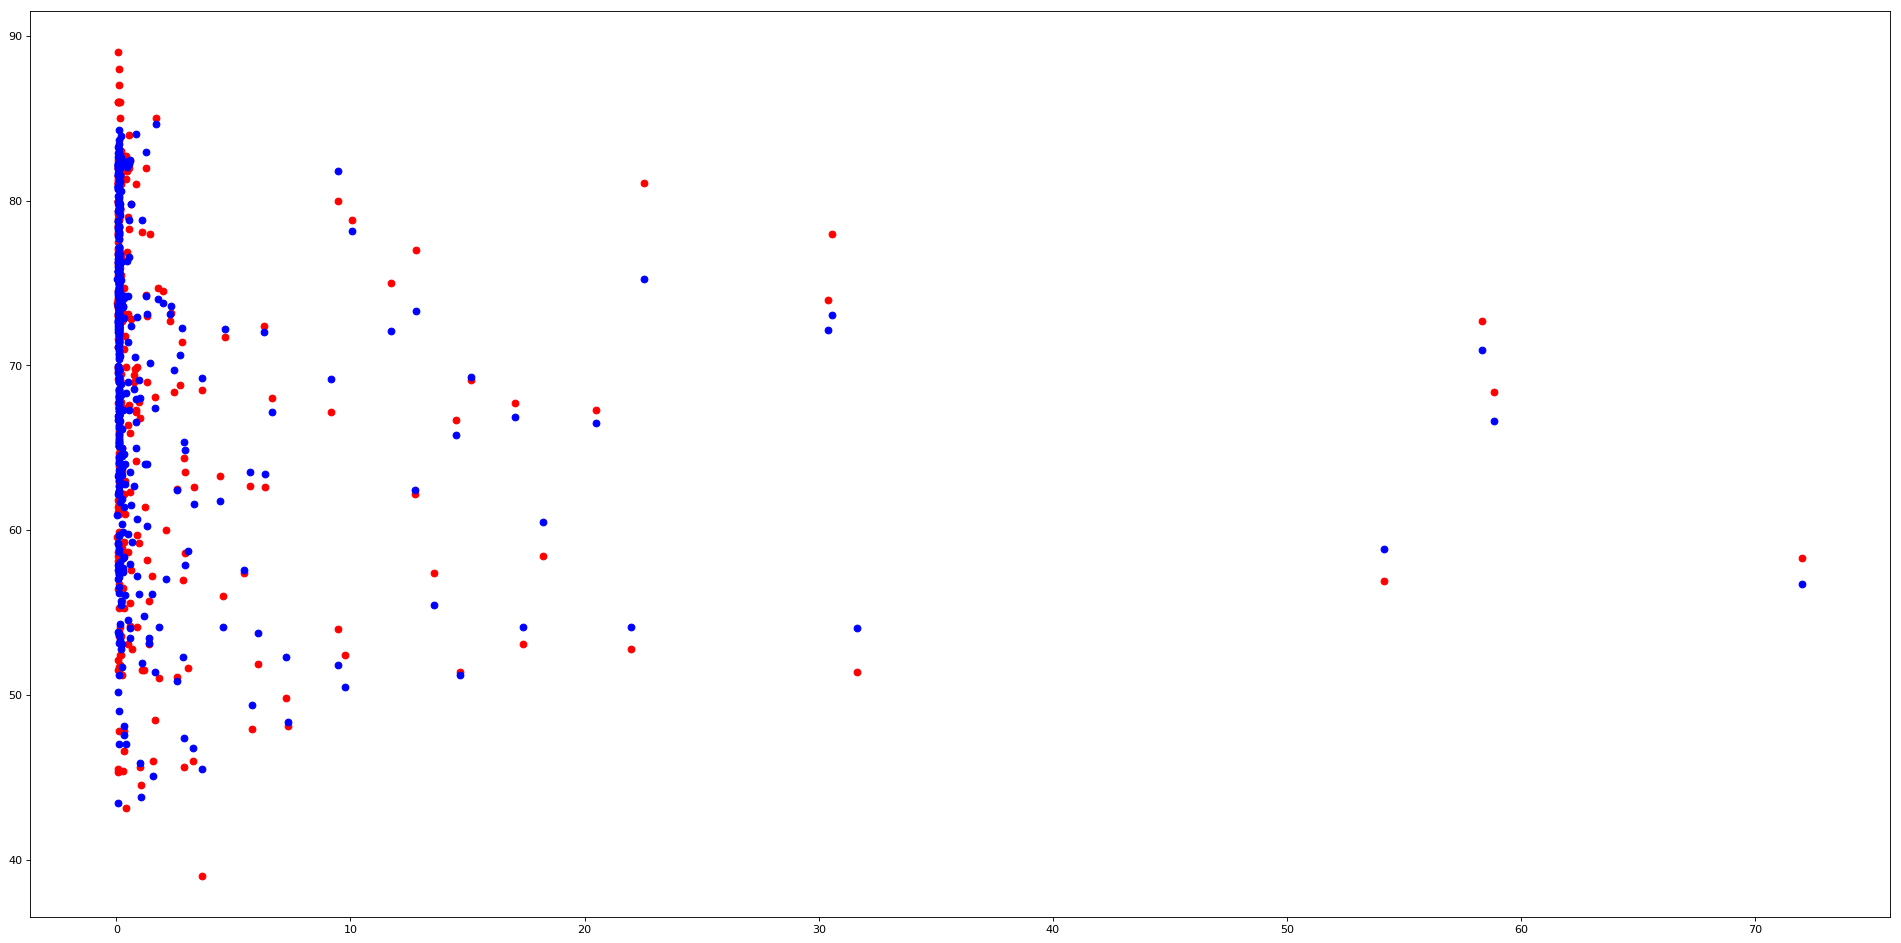

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor {'criterion': 'mae'}
Mean squared error: 6.603205691860974
Variance: 0.9294374010281358
Adult Mortality: 0.5980722166152171
Alcohol: 0.05462762747915211
Hepatitis B: 0.02297811004851801
Measles : 0.020661951677234985
 BMI : 0.08300709827982583
Polio: 0.022871349815330497
Total expenditure: 0.036642618408052455
Diphtheria : 0.04844156355728138
GDP: 0.045080142906198085
Status: 0.06761732121318963
Most important coeficient:  Adult Mortality
--------------------------------------------------------------------------------------------------------



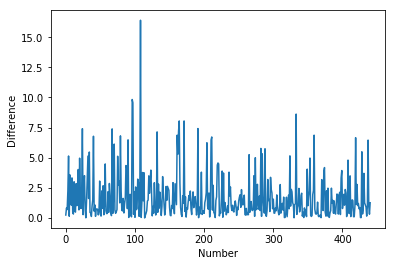

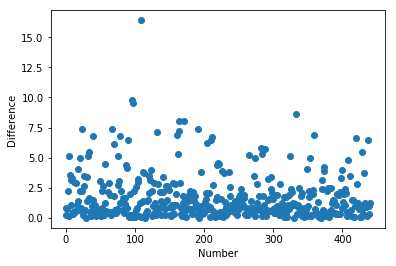

RandomForestRegressor {'criterion': 'mae', 'n_estimators': 5}
Mean squared error: 8.404435714907807
Variance: 0.9101892543394756
Adult Mortality: 0.6025327440107997
Alcohol: 0.05914607398402064
Hepatitis B: 0.020521582367675397
Measles : 0.02251356024888947
 BMI : 0.0832281268214867
Polio: 0.01883588794742815
Total expenditure: 0.031183207805684714
Diphtheria : 0.050482594318441286
GDP: 0.0459207279613762
Status: 0.06563549453419774
Most important coeficient:  Adult Mortality
--------------------------------------------------------------------------------------------------------



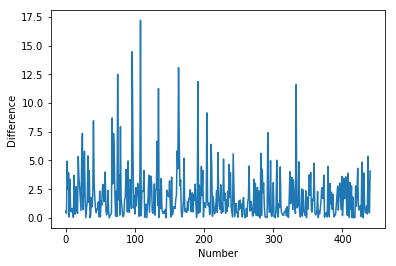

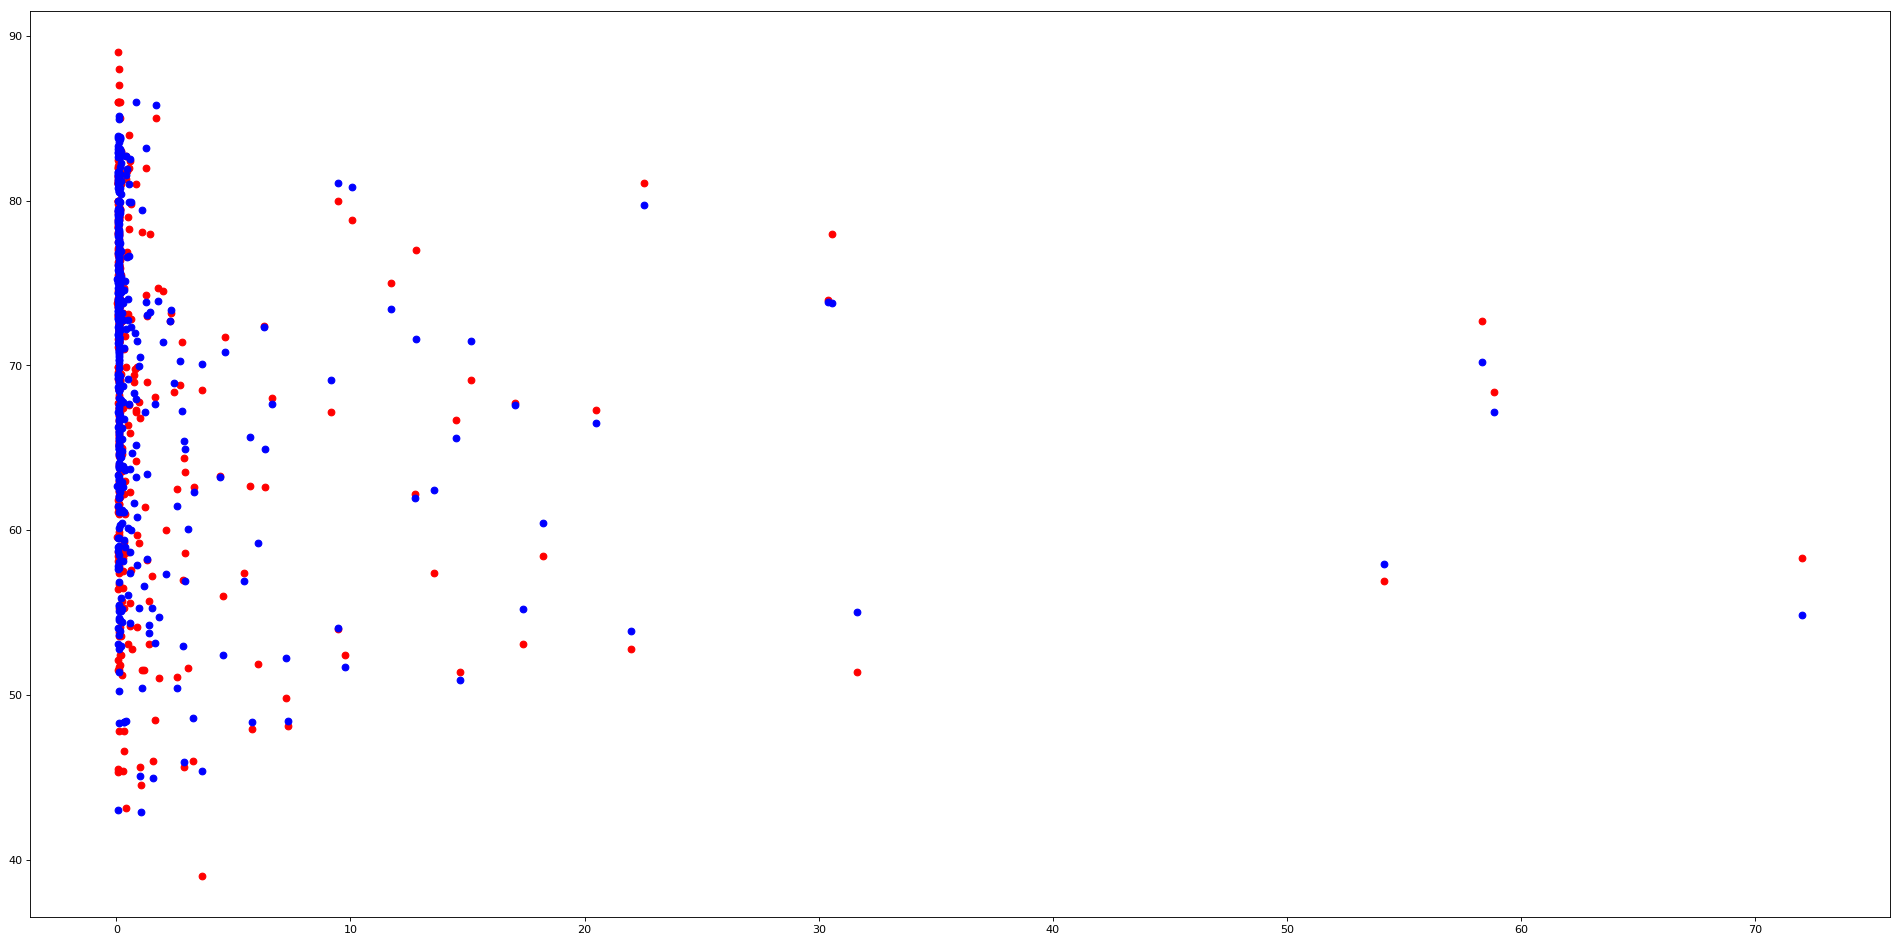

RandomForestRegressor {'criterion': 'mae', 'n_estimators': 20}
Mean squared error: 6.494529635633484
Variance: 0.9305987255924874
Adult Mortality: 0.59969705217277
Alcohol: 0.05762149026609699
Hepatitis B: 0.02074980787903486
Measles : 0.02217582896228944
 BMI : 0.07945333918905989
Polio: 0.02534938460678407
Total expenditure: 0.03505806541286256
Diphtheria : 0.04823791752793552
GDP: 0.04443117239668348
Status: 0.06722594158648312
Most important coeficient:  Adult Mortality
--------------------------------------------------------------------------------------------------------



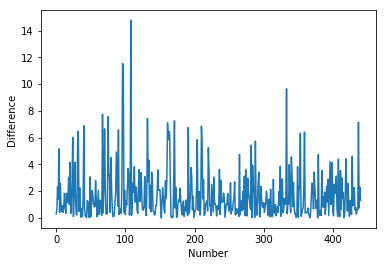

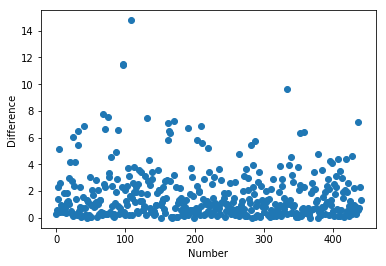

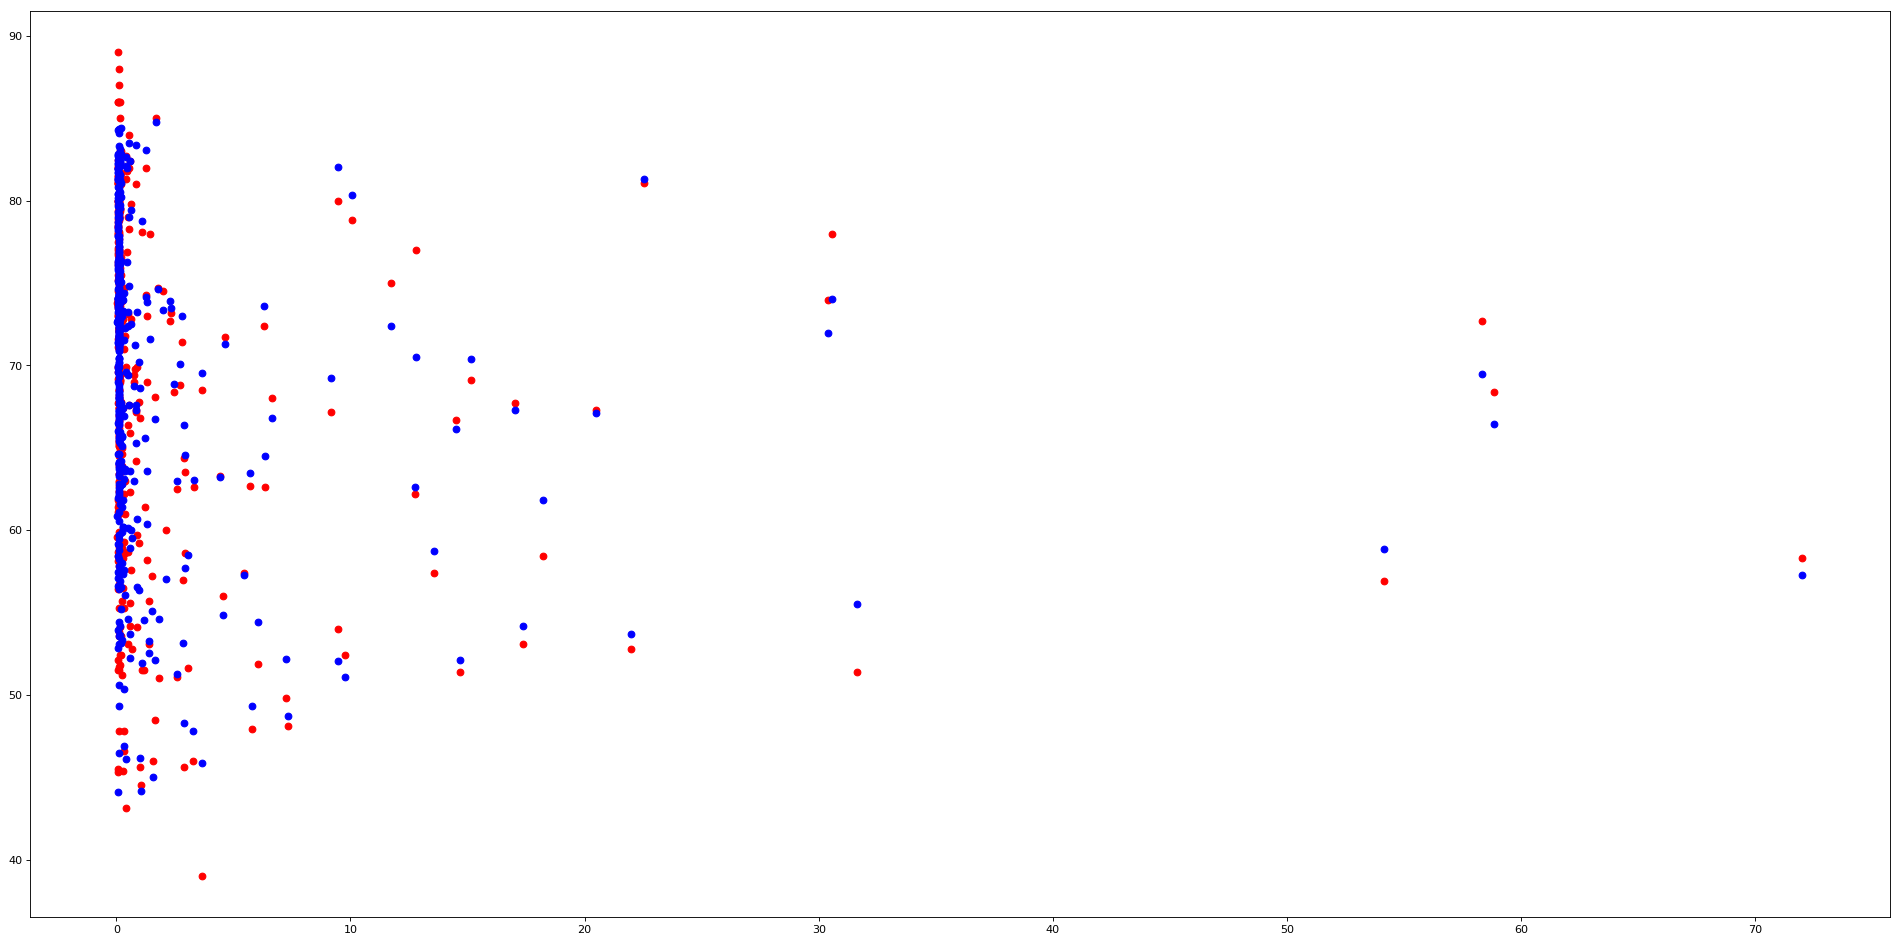

RandomForestRegressor {'criterion': 'mae', 'n_estimators': 50}
Mean squared error: 6.148635708054141
Variance: 0.9342949870202766
Adult Mortality: 0.6031556651835511
Alcohol: 0.056399380813389285
Hepatitis B: 0.019350229301388387
Measles : 0.021977414484884217
 BMI : 0.0781853627747012
Polio: 0.024023728436099984
Total expenditure: 0.035455662253513265
Diphtheria : 0.0502651290098723
GDP: 0.04670968731641567
Status: 0.0644777404261844
Most important coeficient:  Adult Mortality
--------------------------------------------------------------------------------------------------------



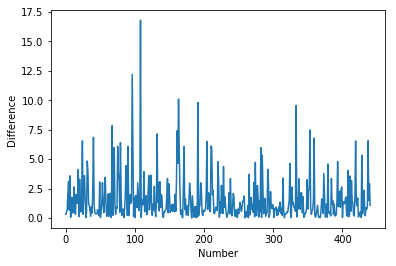

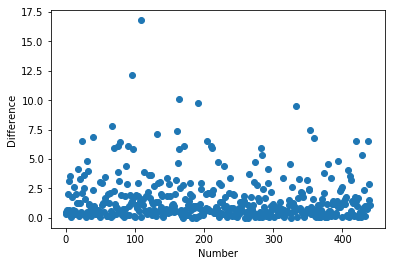

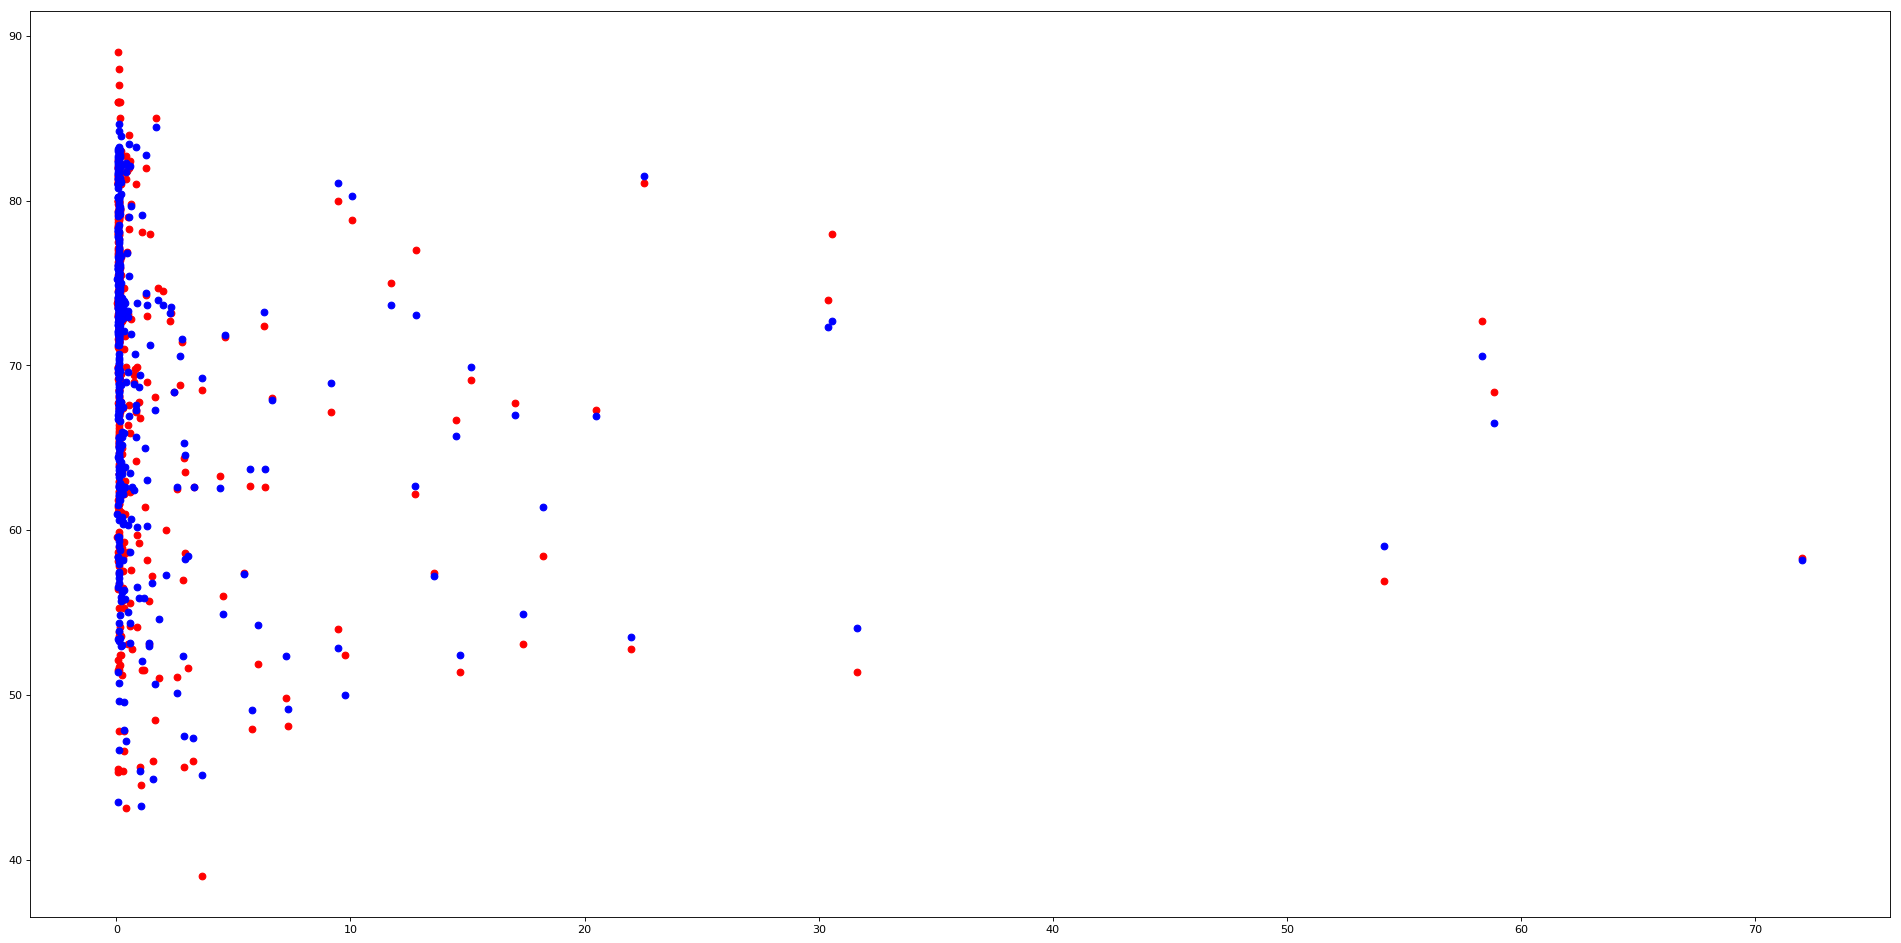

RandomForestRegressor {'criterion': 'mae', 'n_estimators': 100}
Mean squared error: 6.148913638368201
Variance: 0.9342920170256697
Adult Mortality: 0.6035069169200663
Alcohol: 0.055882803745168665
Hepatitis B: 0.02026760633554976
Measles : 0.0215774986550521
 BMI : 0.07683689395678153
Polio: 0.027119410733269525
Total expenditure: 0.035452933722192374
Diphtheria : 0.04843897243535102
GDP: 0.045715945609298834
Status: 0.06520101788727002
Most important coeficient:  Adult Mortality
--------------------------------------------------------------------------------------------------------



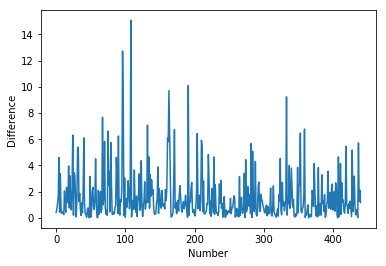

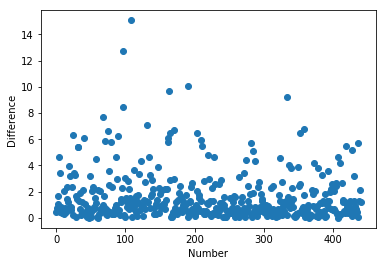

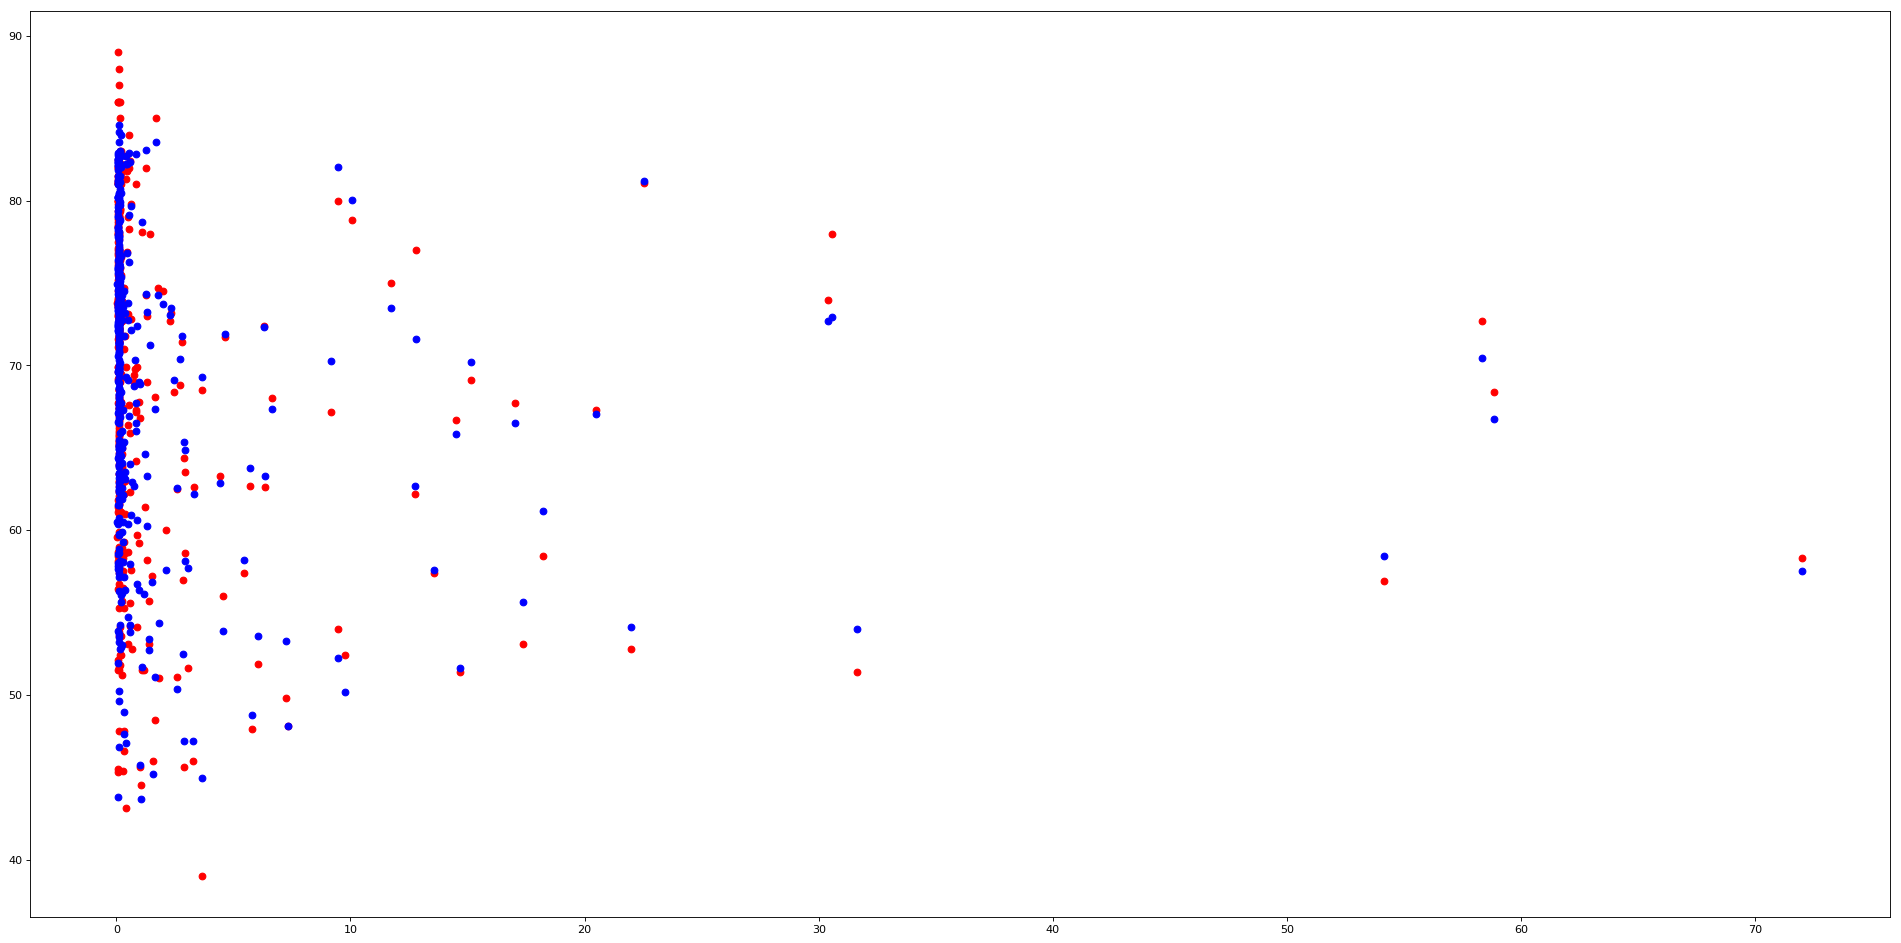

RandomForestRegressor {'criterion': 'mae', 'n_estimators': 150}
Mean squared error: 6.440885837881498
Variance: 0.9311719692509072
Adult Mortality: 0.6043675477914204
Alcohol: 0.056817269083669124
Hepatitis B: 0.01962152065907475
Measles : 0.0218356333190706
 BMI : 0.07590433230842782
Polio: 0.026139112535384673
Total expenditure: 0.03607001019601532
Diphtheria : 0.048467164050211134
GDP: 0.047011202699320784
Status: 0.06376620735740543
Most important coeficient:  Adult Mortality
--------------------------------------------------------------------------------------------------------



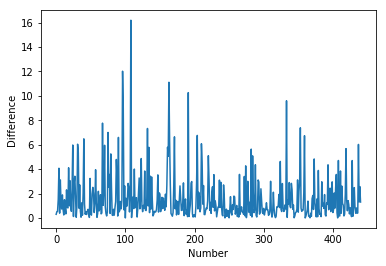

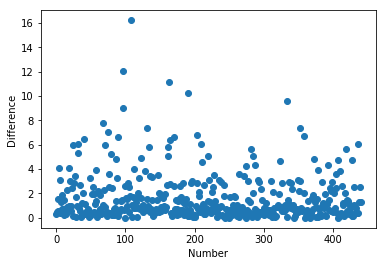

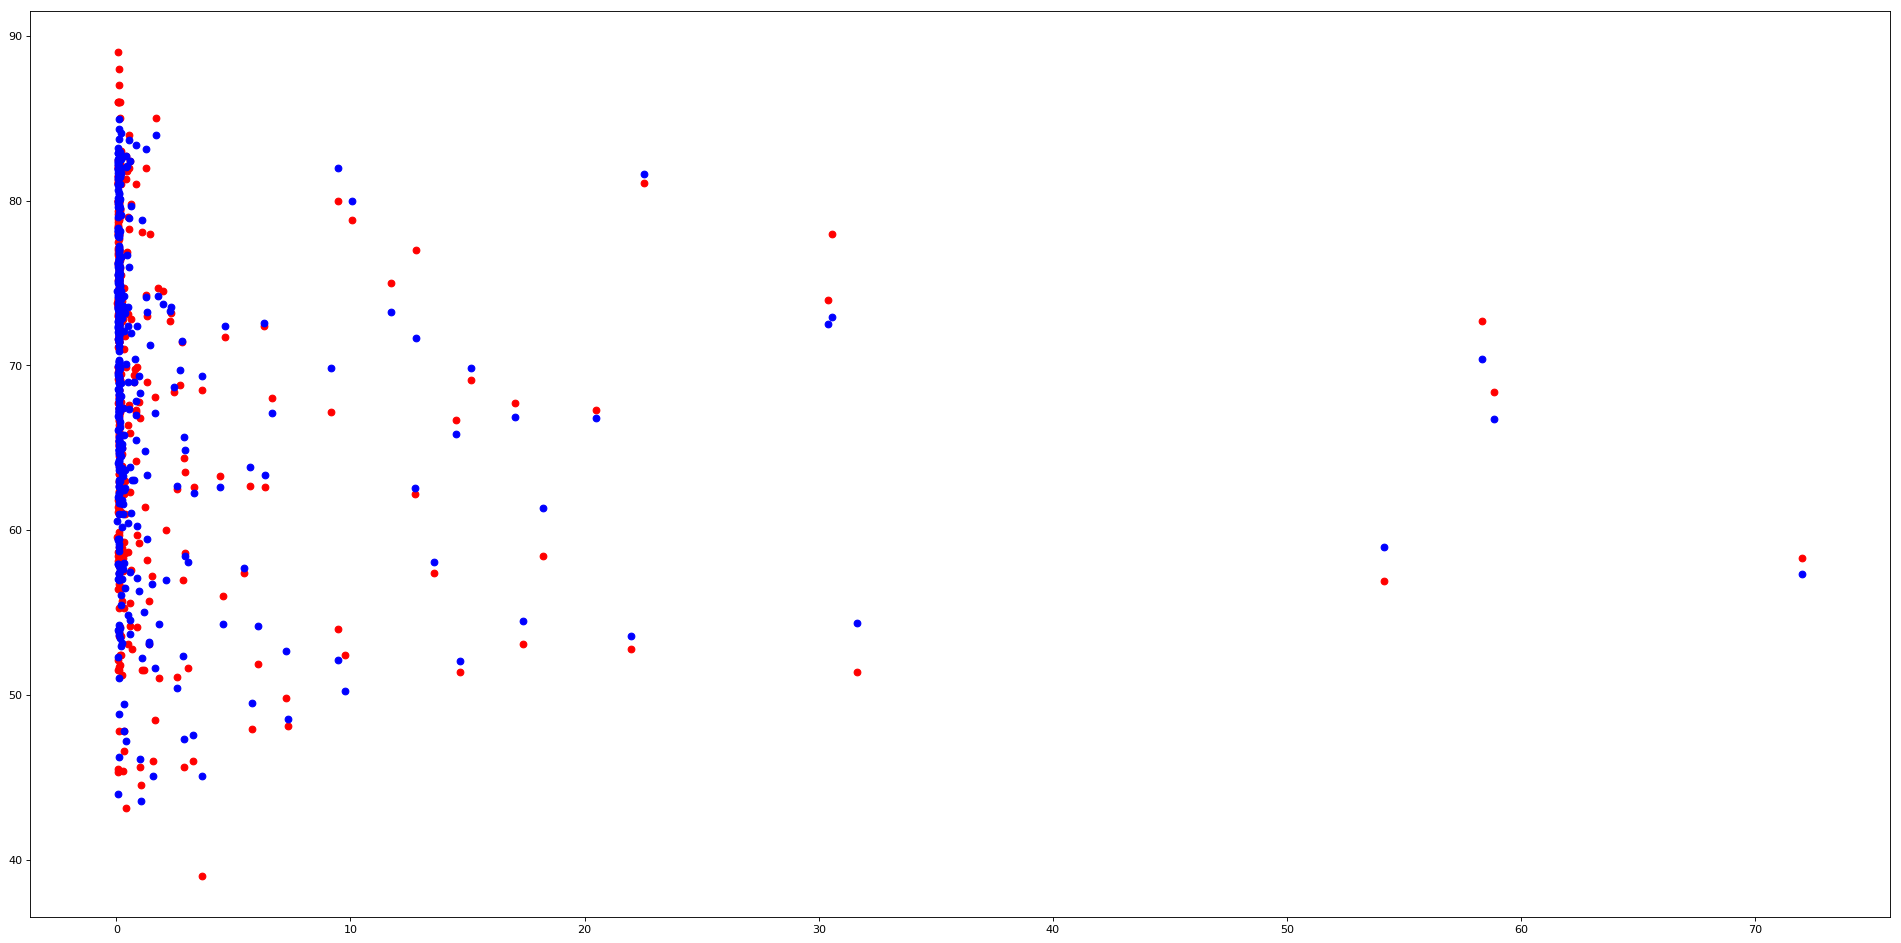

RandomForestRegressor {'criterion': 'mae', 'n_estimators': 200}
Mean squared error: 6.38954427624186
Variance: 0.9317206109551982
Adult Mortality: 0.603205950431188
Alcohol: 0.056163240220647975
Hepatitis B: 0.019969635353628366
Measles : 0.021940649124299227
 BMI : 0.07661648370102075
Polio: 0.026911288447412852
Total expenditure: 0.035670585183222664
Diphtheria : 0.047836732042475225
GDP: 0.04664667550692291
Status: 0.06503875998918214
Most important coeficient:  Adult Mortality
--------------------------------------------------------------------------------------------------------



In [0]:
random_forest_regressor_models = [
    (RandomForestRegressor, {}),
    (RandomForestRegressor, {"n_estimators" : 5}),
    (RandomForestRegressor, {"n_estimators" : 20}),
    (RandomForestRegressor, {"n_estimators" : 50}),
    (RandomForestRegressor, {"n_estimators" : 100}),
    (RandomForestRegressor, {"n_estimators" : 150}),
    (RandomForestRegressor, {"n_estimators" : 200}),
    (RandomForestRegressor, {"criterion": "mae"}),
    (RandomForestRegressor, {"criterion": "mae", "n_estimators" : 5}),
    (RandomForestRegressor, {"criterion": "mae", "n_estimators" : 20}),
    (RandomForestRegressor, {"criterion": "mae", "n_estimators" : 50}),
    (RandomForestRegressor, {"criterion": "mae", "n_estimators" : 100}),
    (RandomForestRegressor, {"criterion": "mae", "n_estimators" : 150}),
    (RandomForestRegressor, {"criterion": "mae", "n_estimators" : 200}),

]

for i, (Model, kwargs) in enumerate(random_forest_regressor_models):
  model = Model(**kwargs)
  model.fit(X_train, y_train)
  y_predicted = model.predict(X_test)
  mse = mean_squared_error(y_test, y_predicted)
  variance = r2_score(y_test, y_predicted)

  print(Model.__name__, kwargs)
  print("Mean squared error:", mse)
  print("Variance:", r2_score(y_test, y_predicted))
  pretty_print_coeficients_decision_tree(model)
  print("--------------------------------------------------------------------------------------------------------")
  print()
  
  plot_y_difference(y_test, y_predicted)
  plot_expected_and_trained_data(X_test, y_test, y_predicted)

# Random Forest - Regression - Polynomial Features

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor {}
Mean squared error: 8.06812643840886
Variance: 0.9137830931074188
Coeficients for combinations between columns of power = 0 or 1 or 2 or 3 - (ex: a, b, c, a * b * c^3, c^3)
[0.0, 0.24455562493092556, 0.0010915723378509914, 0.0004310182322215479, 0.00016834943675431784, 0.006052204281098597, 0.001677811198546344, 0.0008771683319310108, 0.003194095539916227, 0.00024564979297971007, 0.0, 0.0004729232475216033, 0.004937089788093779, 0.00010337980700062048, 0.0009922004902284231, 0.004447483473892041, 0.0006602798253660276, 0.009783926224128502, 0.0005809285437400336, 0.4226036103934806, 0.0004285879394436943, 0.0001173865723213328, 0.0008439057650160638, 0.0005115272958965396, 0.000595434227762731, 0.0005822442899624069, 0.0005051143883687503, 0.001109199900365172, 5.2931430083787e-05, 0.00041932180485392223, 0.0009064360789684355, 0.0009911257926593215, 0.001660605752340992, 0.0009250508243867256, 0.00040198685975659855, 5.351085879906462e-05, 8.860041405234467e-0

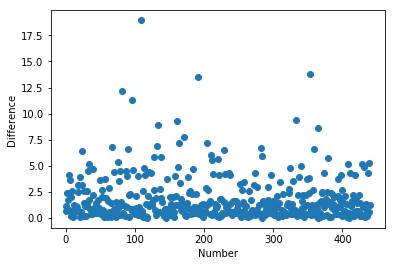

RandomForestRegressor {'n_estimators': 5}
Mean squared error: 8.281291197561046
Variance: 0.9115051905072424
Coeficients for combinations between columns of power = 0 or 1 or 2 or 3 - (ex: a, b, c, a * b * c^3, c^3)
[0.0, 0.4794003059817938, 0.0002573831804913138, 0.00010282374921072397, 3.851358438534081e-05, 0.02843856165710965, 0.002006977260630645, 0.0010502180483843704, 0.022600452100093562, 0.00032986014278643645, 0.0, 0.0010777984623096014, 0.0047857728473709735, 0.0002491588590708812, 0.006398165109991206, 0.007025832833159982, 0.000619395160100357, 0.007716224142389389, 0.00035023696032921727, 0.1533029020789755, 0.0003577761868322124, 0.00011944968534325543, 0.004010223531210014, 0.00024172503966812976, 0.001995868467029781, 0.0006018252586482242, 0.0005560047511567973, 0.0003352984964032052, 0.00010995227332381994, 0.00043916547717095546, 0.0003033032952455698, 0.0005182028882904197, 0.0018050976716990816, 0.0003192490259358124, 0.000418107078981928, 5.875487484727377e-05, 5

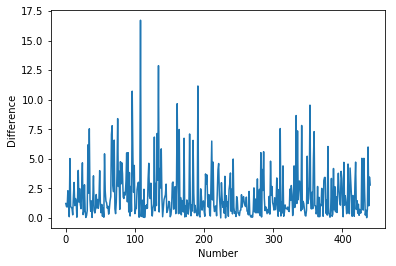

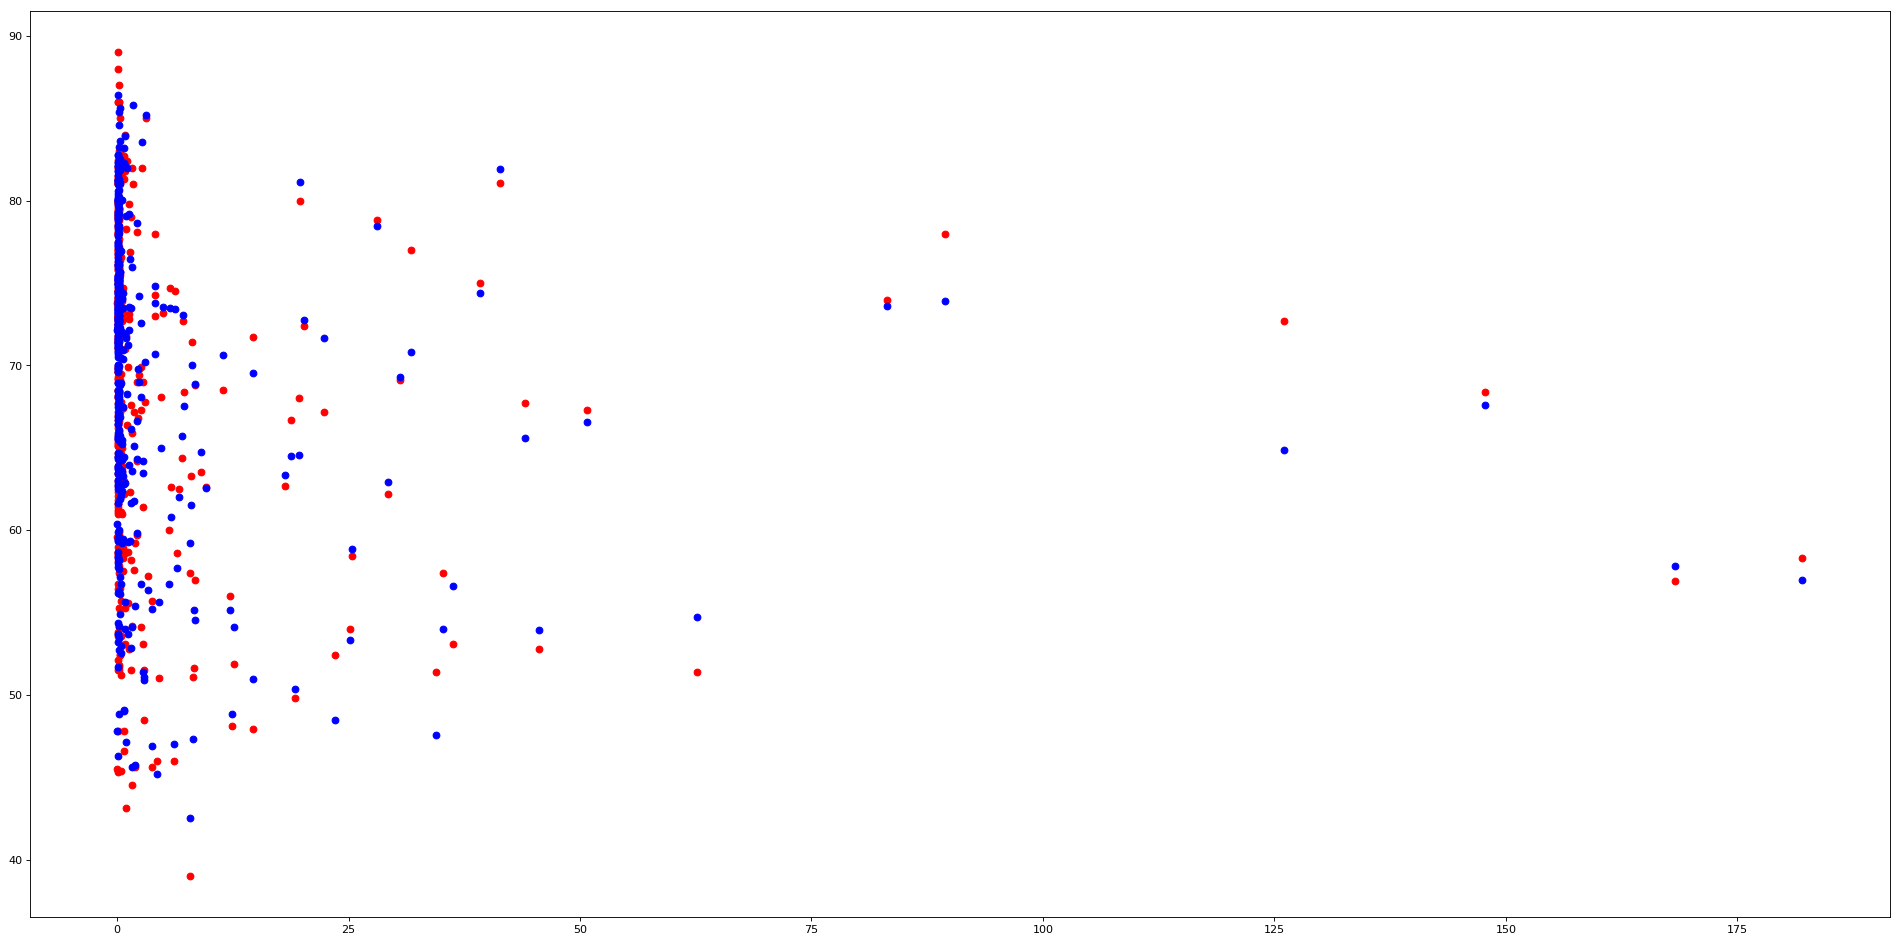

RandomForestRegressor {'n_estimators': 20}
Mean squared error: 7.054264912963503
Variance: 0.9246173314412607
Coeficients for combinations between columns of power = 0 or 1 or 2 or 3 - (ex: a, b, c, a * b * c^3, c^3)
[0.0, 0.3374365067219476, 0.0008377889025133589, 0.00034693960177798096, 0.00010977882617057978, 0.008473823236953611, 0.000788209094471874, 0.000803740582998866, 0.012981432647340967, 0.0002845627013127397, 4.143284177345346e-06, 0.000829487729428289, 0.002328684002533856, 0.00011438604882119628, 0.0015417866695518322, 0.005557812738537839, 0.0007094290531865328, 0.010852069172355065, 0.002877206262982714, 0.3378386209341952, 0.0016019076069539804, 7.44047117589757e-05, 0.0007775703124117602, 0.0005613305908859451, 0.0005242928565788504, 0.0003408036022812518, 0.0009187454515059869, 0.0006091155987409403, 4.9363242659697215e-05, 0.0005751681595114376, 0.00030064269038084315, 0.0006907161668654606, 0.0004410449377753294, 0.0003010676150899671, 0.0006159211151981449, 0.0003

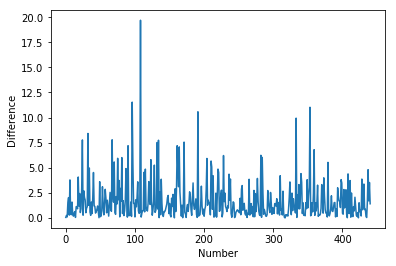

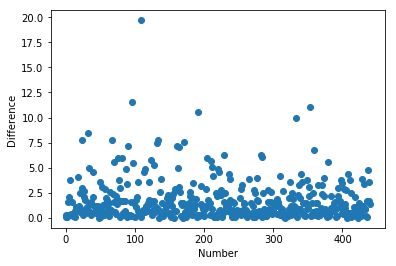

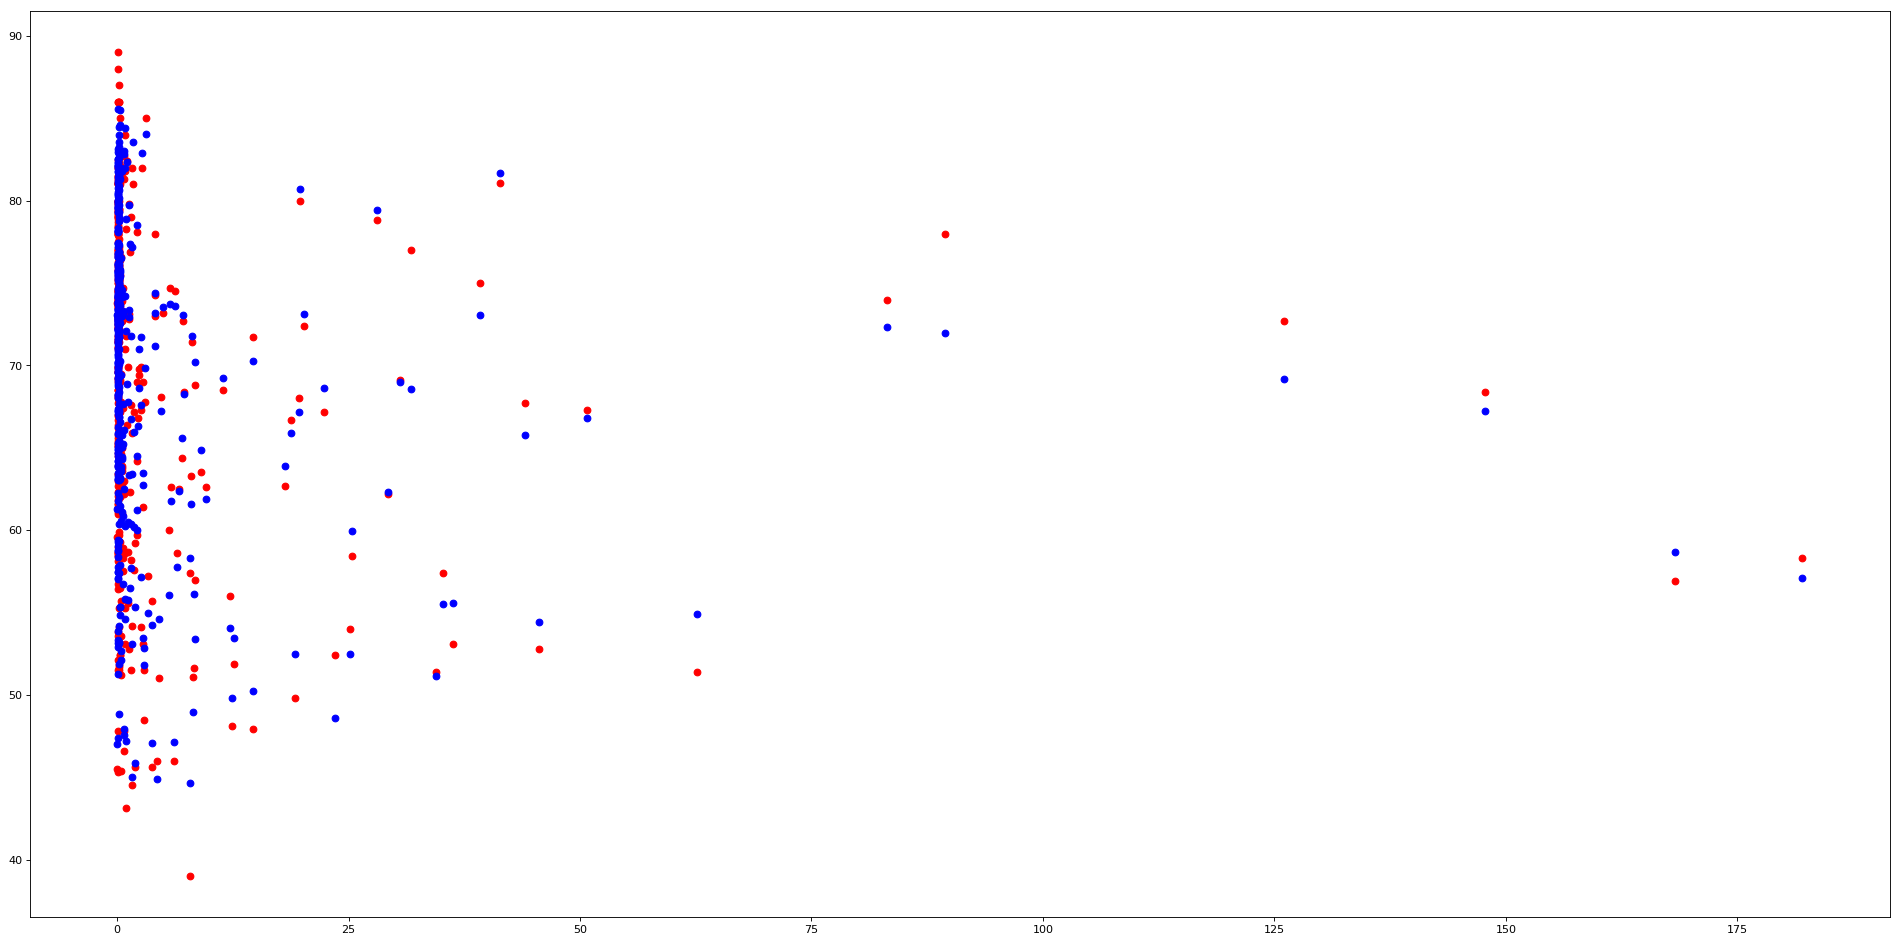

RandomForestRegressor {'n_estimators': 50}
Mean squared error: 7.671607497765915
Variance: 0.9180203391207944
Coeficients for combinations between columns of power = 0 or 1 or 2 or 3 - (ex: a, b, c, a * b * c^3, c^3)
[0.0, 0.3877376337255231, 0.0007139227589072871, 0.0005441688317339838, 7.797570380765831e-05, 0.005625534149068233, 0.0016942812965237714, 0.001140647973734429, 0.0024689398311058836, 0.001697052433564754, 2.732359327047197e-08, 0.0004837773114085385, 0.0025740429183924328, 8.426708882102883e-05, 0.0013081601467752565, 0.004577147719019462, 0.001112474745724048, 0.005902284149035499, 0.0015642902305431309, 0.2923140614244397, 0.0005633083227174591, 0.00012157711725219904, 0.0008226283476930432, 0.0007725749942224193, 0.0015215116002696735, 0.0002583244222751211, 0.0008374542334751959, 0.0005658679585415709, 0.00015521689544575743, 0.0007674386498387239, 0.0010398711384716965, 0.0008699629553152188, 0.0008839735742399202, 0.00032859893705606283, 0.0003556623096295343, 0.00

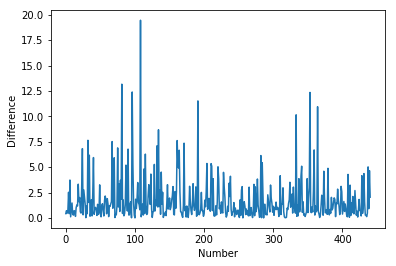

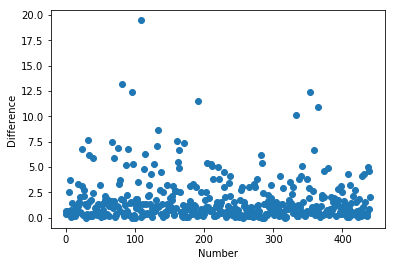

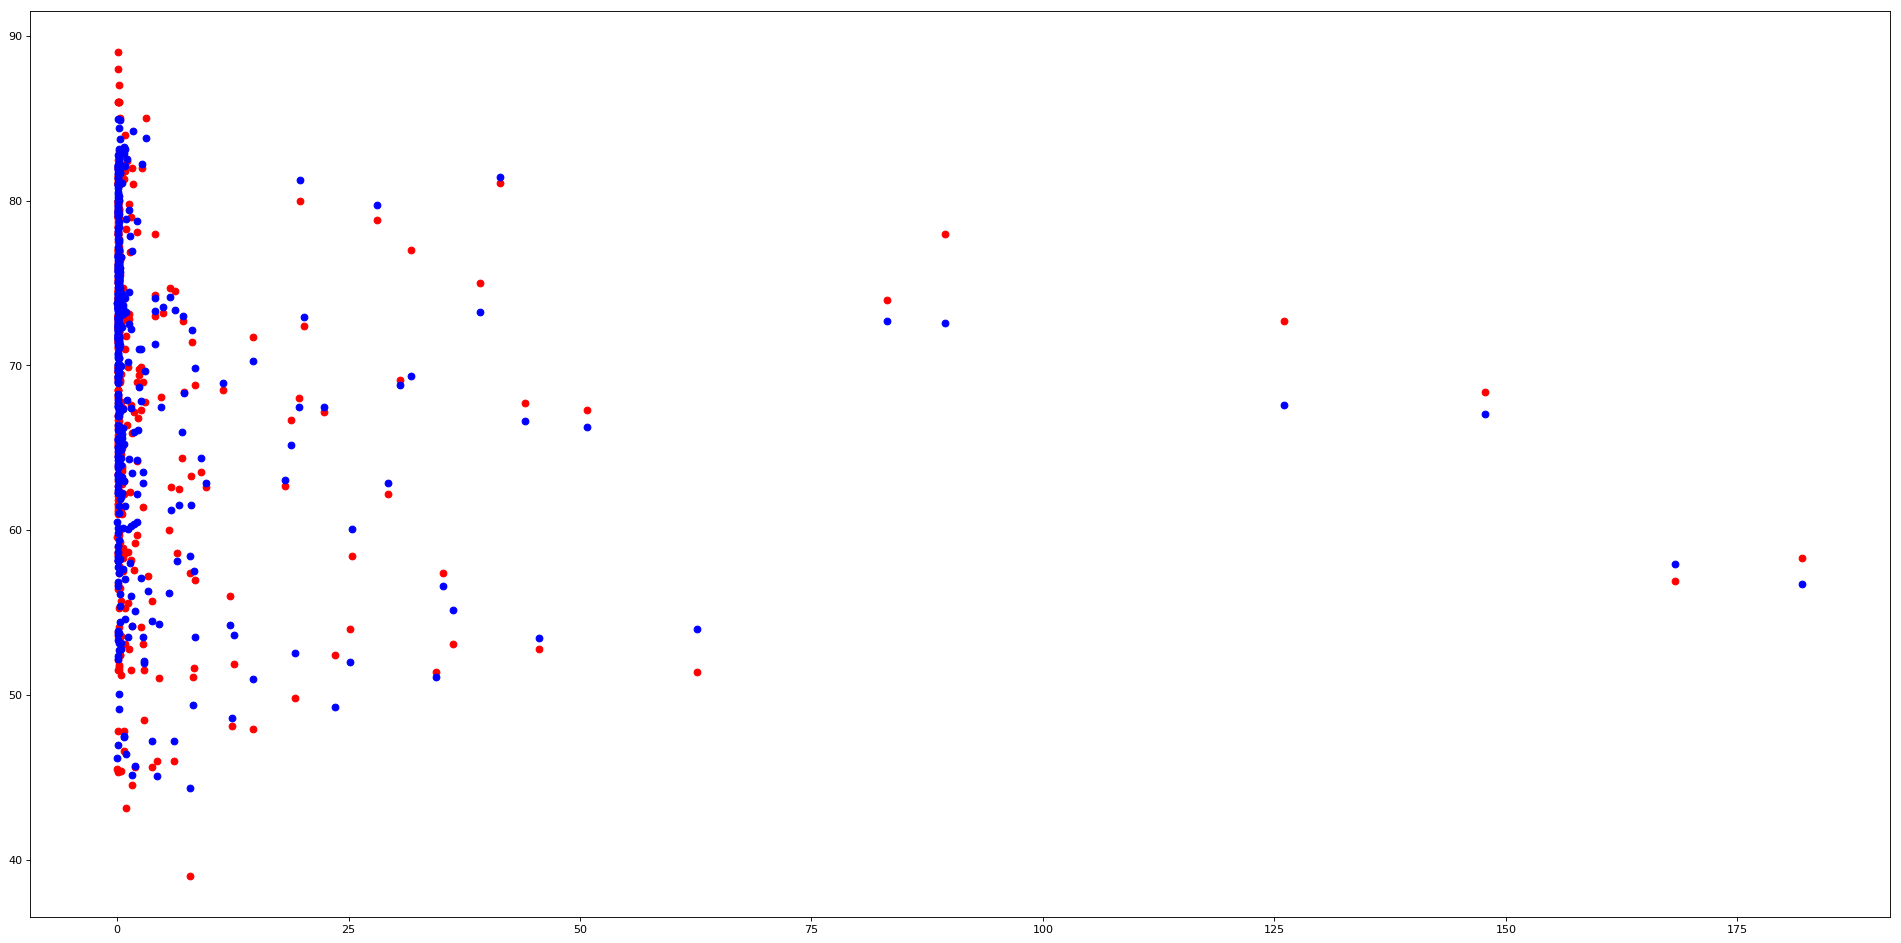

RandomForestRegressor {'n_estimators': 100}
Mean squared error: 6.89106066318199
Variance: 0.926361350417079
Coeficients for combinations between columns of power = 0 or 1 or 2 or 3 - (ex: a, b, c, a * b * c^3, c^3)
[0.0, 0.34503570641058495, 0.0006880174490756033, 0.0004640248133351182, 6.836513292319421e-05, 0.008018837413006075, 0.0029764105649675477, 0.0012951655504966901, 0.0047095677329071165, 0.0008287861094581404, 5.381831112750618e-07, 0.0007352584599987919, 0.0034439980733608428, 0.00015200399157561489, 0.0011304236907178399, 0.004836453337766553, 0.0010856222064911645, 0.007375768338797114, 0.0005932085003858208, 0.3313670282227336, 0.0009407975779783494, 0.000114882024111017, 0.0007211601928009861, 0.000525603810050274, 0.0018176384656526138, 0.0005170525194689087, 0.0009667141849574996, 0.000383911193568841, 0.000168929659907448, 0.0007707834709176626, 0.0005459940054174006, 0.0007054714336693827, 0.0007842377867214505, 0.0004590377252136403, 0.0009087078503240629, 0.00019

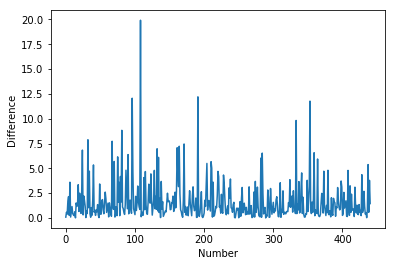

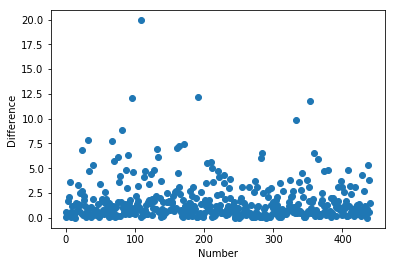

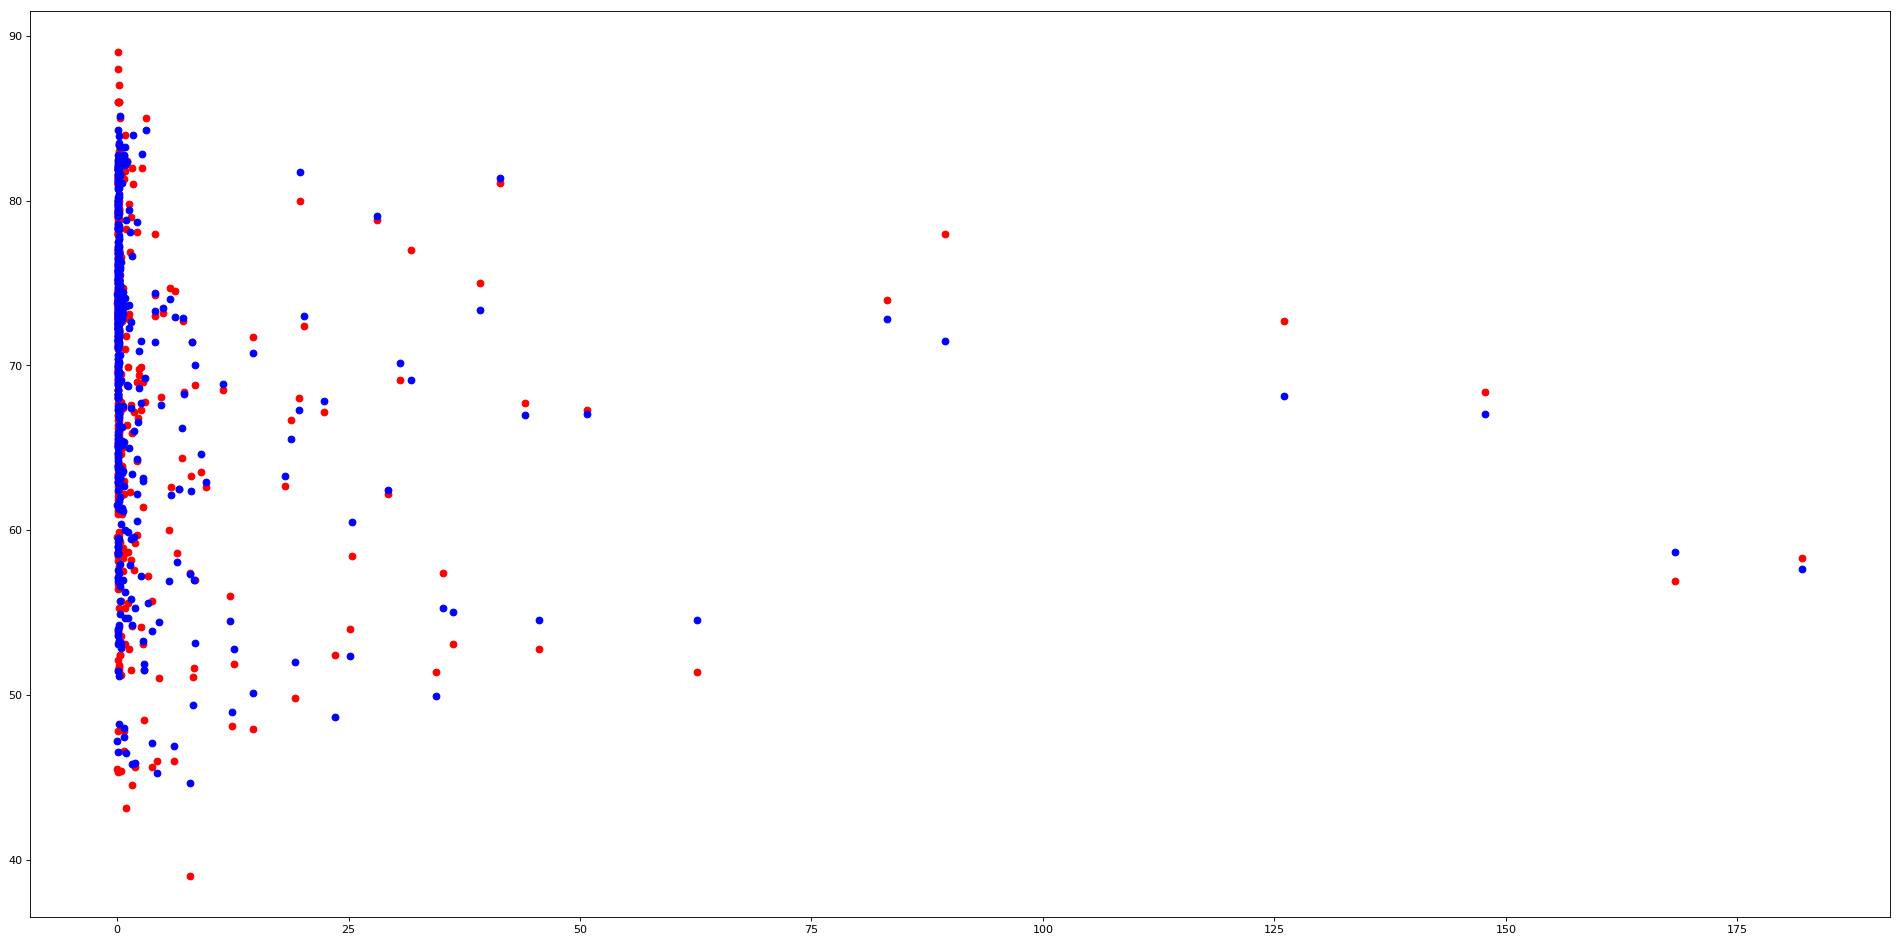

RandomForestRegressor {'n_estimators': 150}
Mean squared error: 7.25676963822288
Variance: 0.9224533431626588
Coeficients for combinations between columns of power = 0 or 1 or 2 or 3 - (ex: a, b, c, a * b * c^3, c^3)
[0.0, 0.36517643350837425, 0.0006984082471622862, 0.0005325251536342766, 7.519524282714144e-05, 0.004533966568298235, 0.00140712831932908, 0.0008750073927166492, 0.0031575580687406087, 0.0007395612428918785, 7.006949733617311e-06, 0.0009039345442550254, 0.004304069996316301, 0.00020955841726873618, 0.0010855462667459389, 0.0038962747124374883, 0.0010561522222218714, 0.00783492371899345, 0.00057963507382773, 0.31024499028833125, 0.0004892819686178933, 0.00011808756209312721, 0.0007561242477113113, 0.0006688566476516273, 0.0014521668155569323, 0.000390730532457625, 0.0010918070907746944, 0.000511403402608528, 0.0001644372693583688, 0.0008985278013391226, 0.0005645314446593975, 0.0008301107600498101, 0.0008506250498602264, 0.00030709174779736164, 0.0006383216856869255, 0.0001

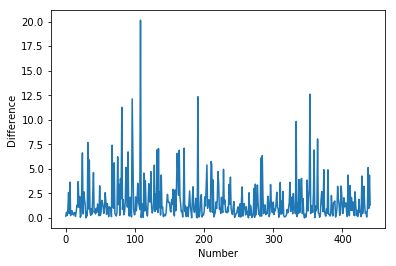

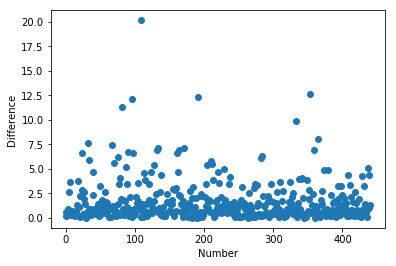

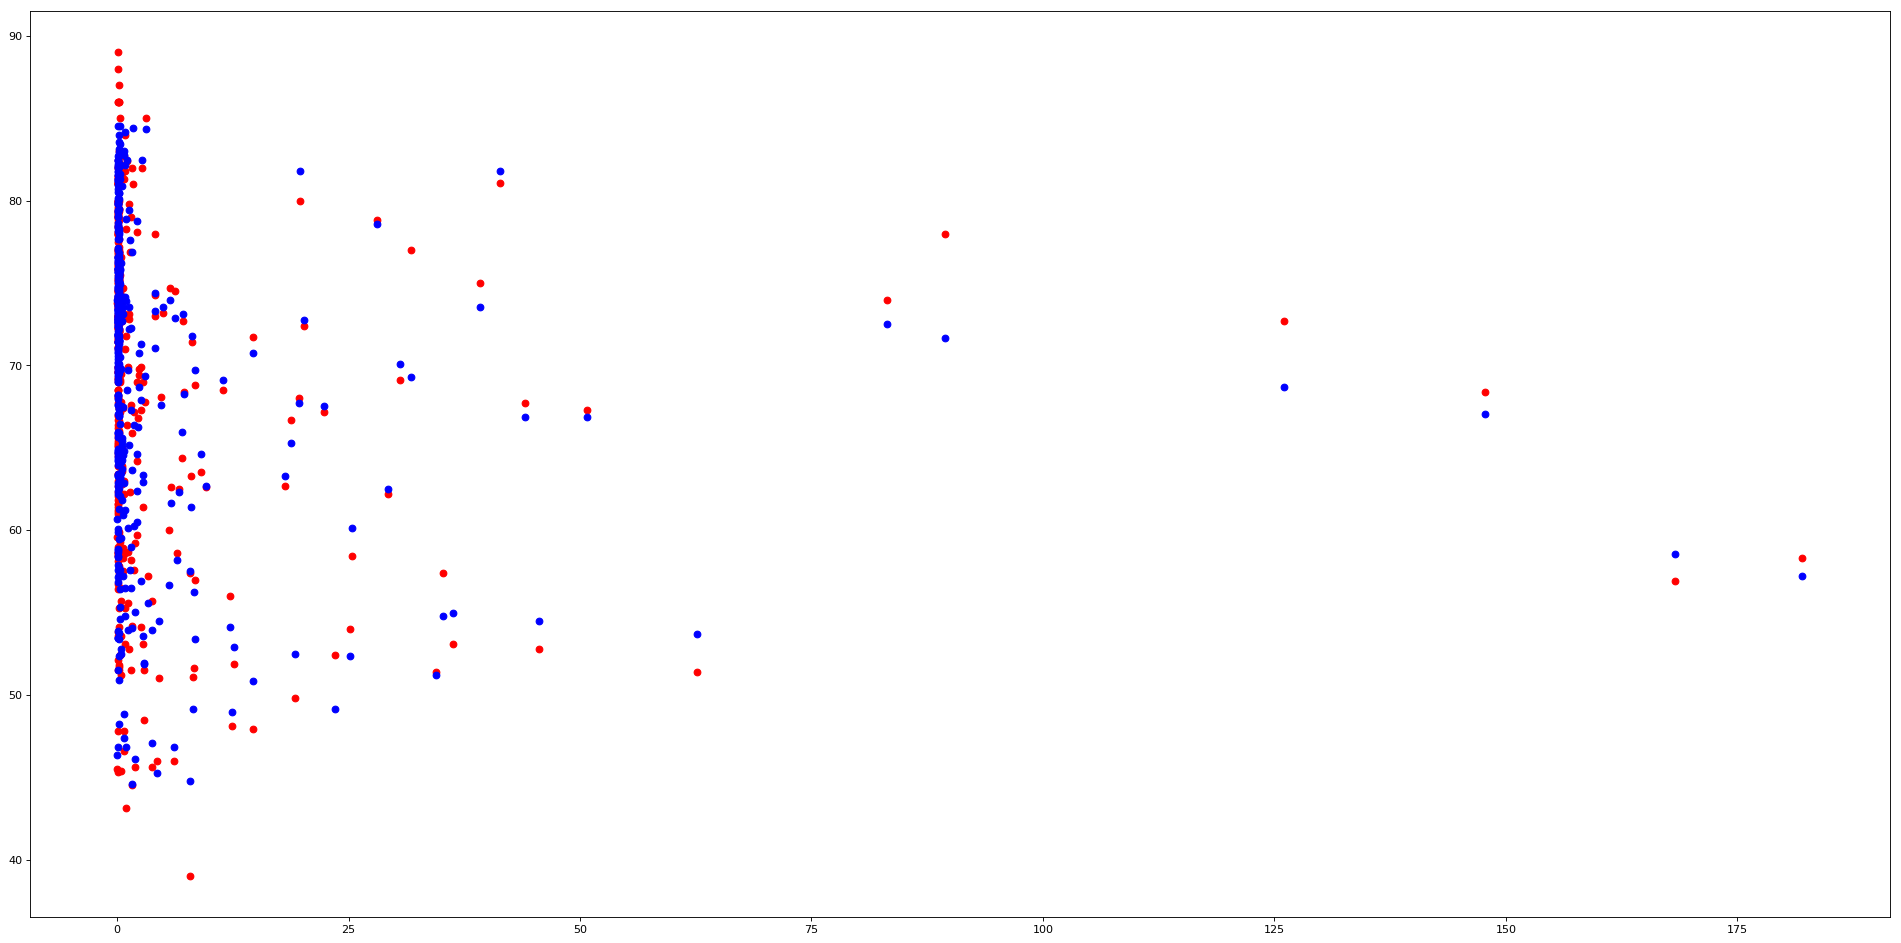

RandomForestRegressor {'n_estimators': 200}
Mean squared error: 6.996341468931726
Variance: 0.9252363078813437
Coeficients for combinations between columns of power = 0 or 1 or 2 or 3 - (ex: a, b, c, a * b * c^3, c^3)
[0.0, 0.3466531966030002, 0.000861303859436311, 0.00044001608999017845, 0.00015984784693978376, 0.005830315064295159, 0.0018670927709627855, 0.0008332337754735704, 0.0032681243023055984, 0.0007018045677242101, 5.0126699372758905e-06, 0.0007177425362271995, 0.0038801007240802676, 0.0001787525916847959, 0.0011721983727188783, 0.004579748123986465, 0.000955393722421888, 0.006798516231367147, 0.0005739956697491124, 0.32927220598775186, 0.000408899048697177, 9.843847014447802e-05, 0.0008608723033829125, 0.0004963406786946982, 0.0013413696993610181, 0.000539199782446746, 0.0009074478220443252, 0.0005247693062424791, 0.00016516118685343297, 0.0008477709883111993, 0.0008143022098226234, 0.0007998072890647855, 0.0006817848573304617, 0.00047794067789089234, 0.000509105760452402, 0.

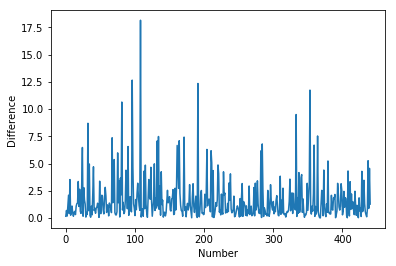

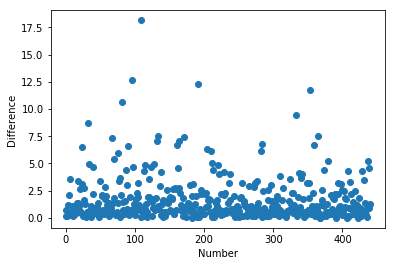

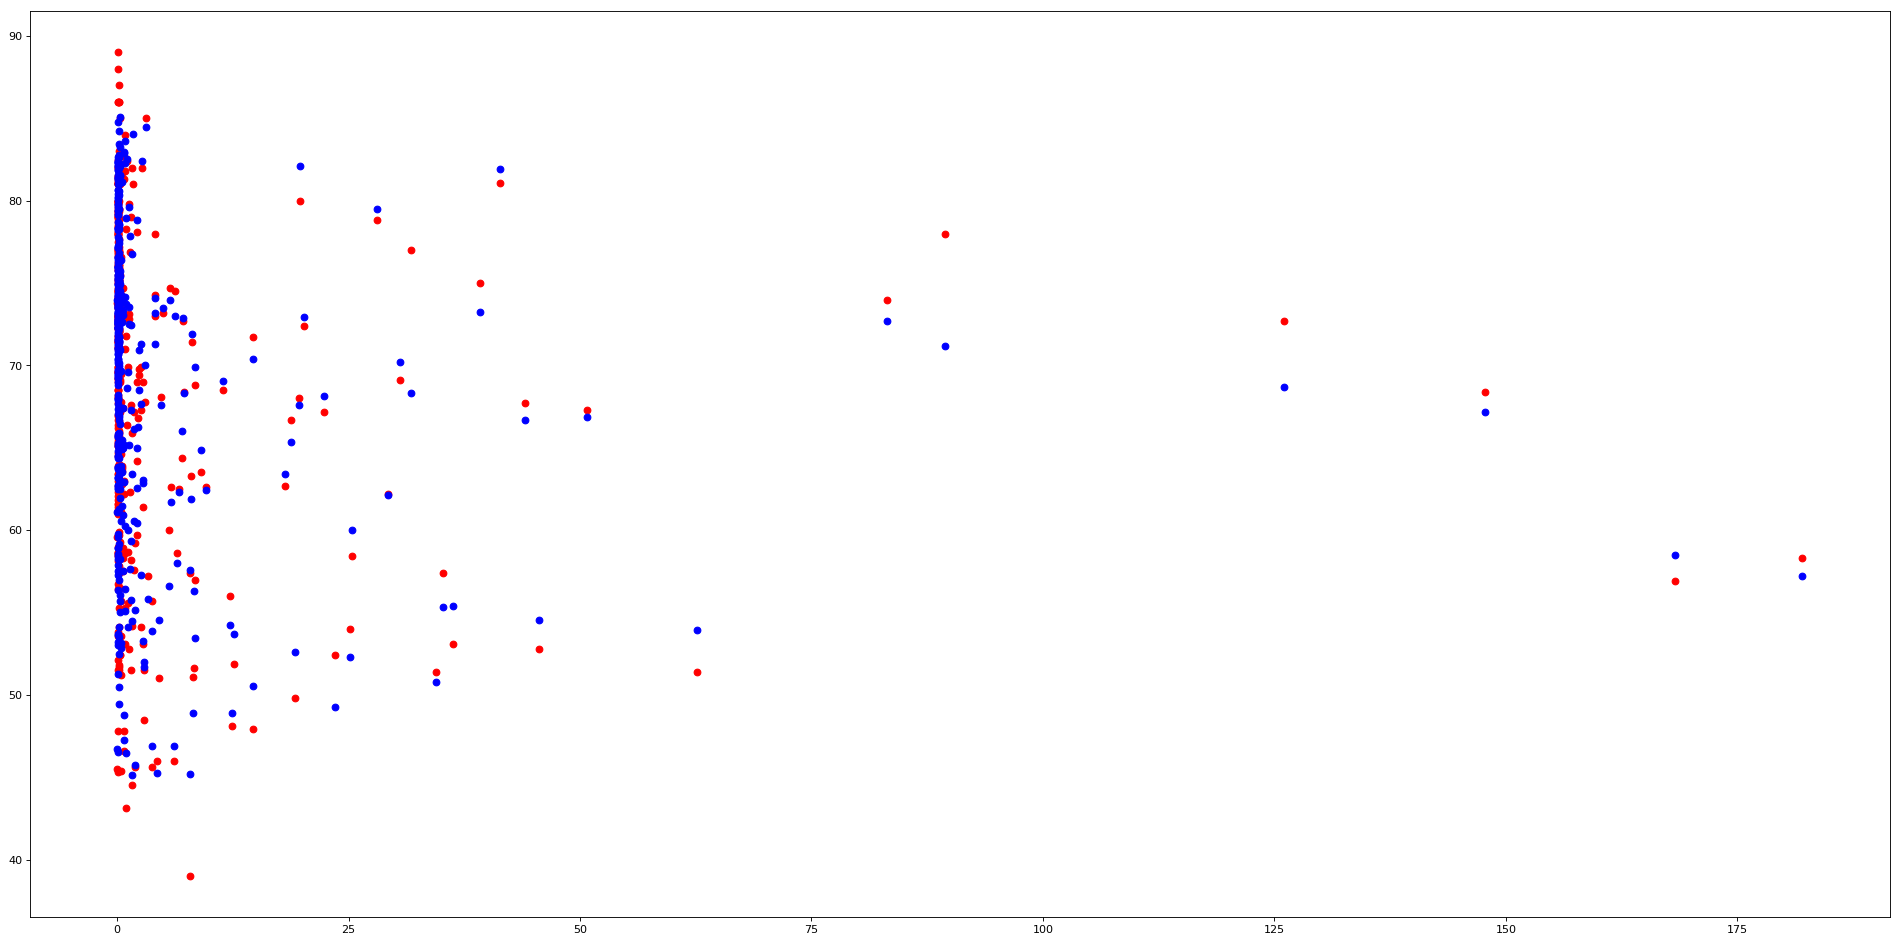

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor {'criterion': 'mae'}
Mean squared error: 8.448342516853502
Variance: 0.9097200613137836
Coeficients for combinations between columns of power = 0 or 1 or 2 or 3 - (ex: a, b, c, a * b * c^3, c^3)
[0.0, 0.23496580665152464, 0.004420255372330274, 0.0012495613395159867, 0.00043914910868298585, 0.003652548259188663, 0.0028099425470590736, 0.002839194164418703, 0.0026805412067179356, 0.000930684090667017, 0.006631739602107575, 0.0019113501281741514, 0.011336286151862036, 0.0003213482831478362, 0.0024141659705065777, 0.014944881978611255, 0.004476710617925582, 0.004096959100936413, 0.0026732105630011467, 0.3169028135774129, 0.0013854344538068327, 0.0005529817894706601, 0.002969508255592235, 0.0019728079045179857, 0.002098955482938457, 0.0018526063564732096, 0.001346537246390884, 0.0007752215378995087, 0.0006122909813122063, 0.0034613615173381086, 0.0011293465188057096, 0.001473277028123894, 0.0014431114893094712, 0.0011702410076226675, 0.0007137975843582561, 0.0003131014

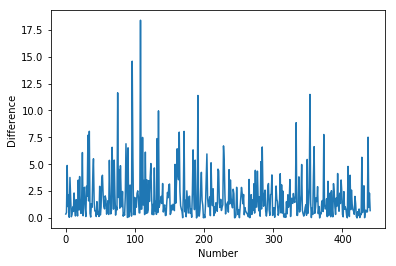

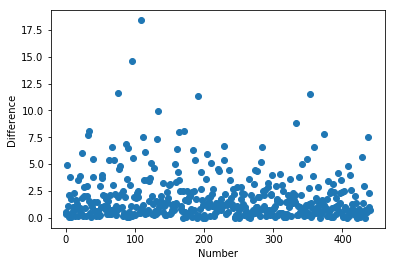

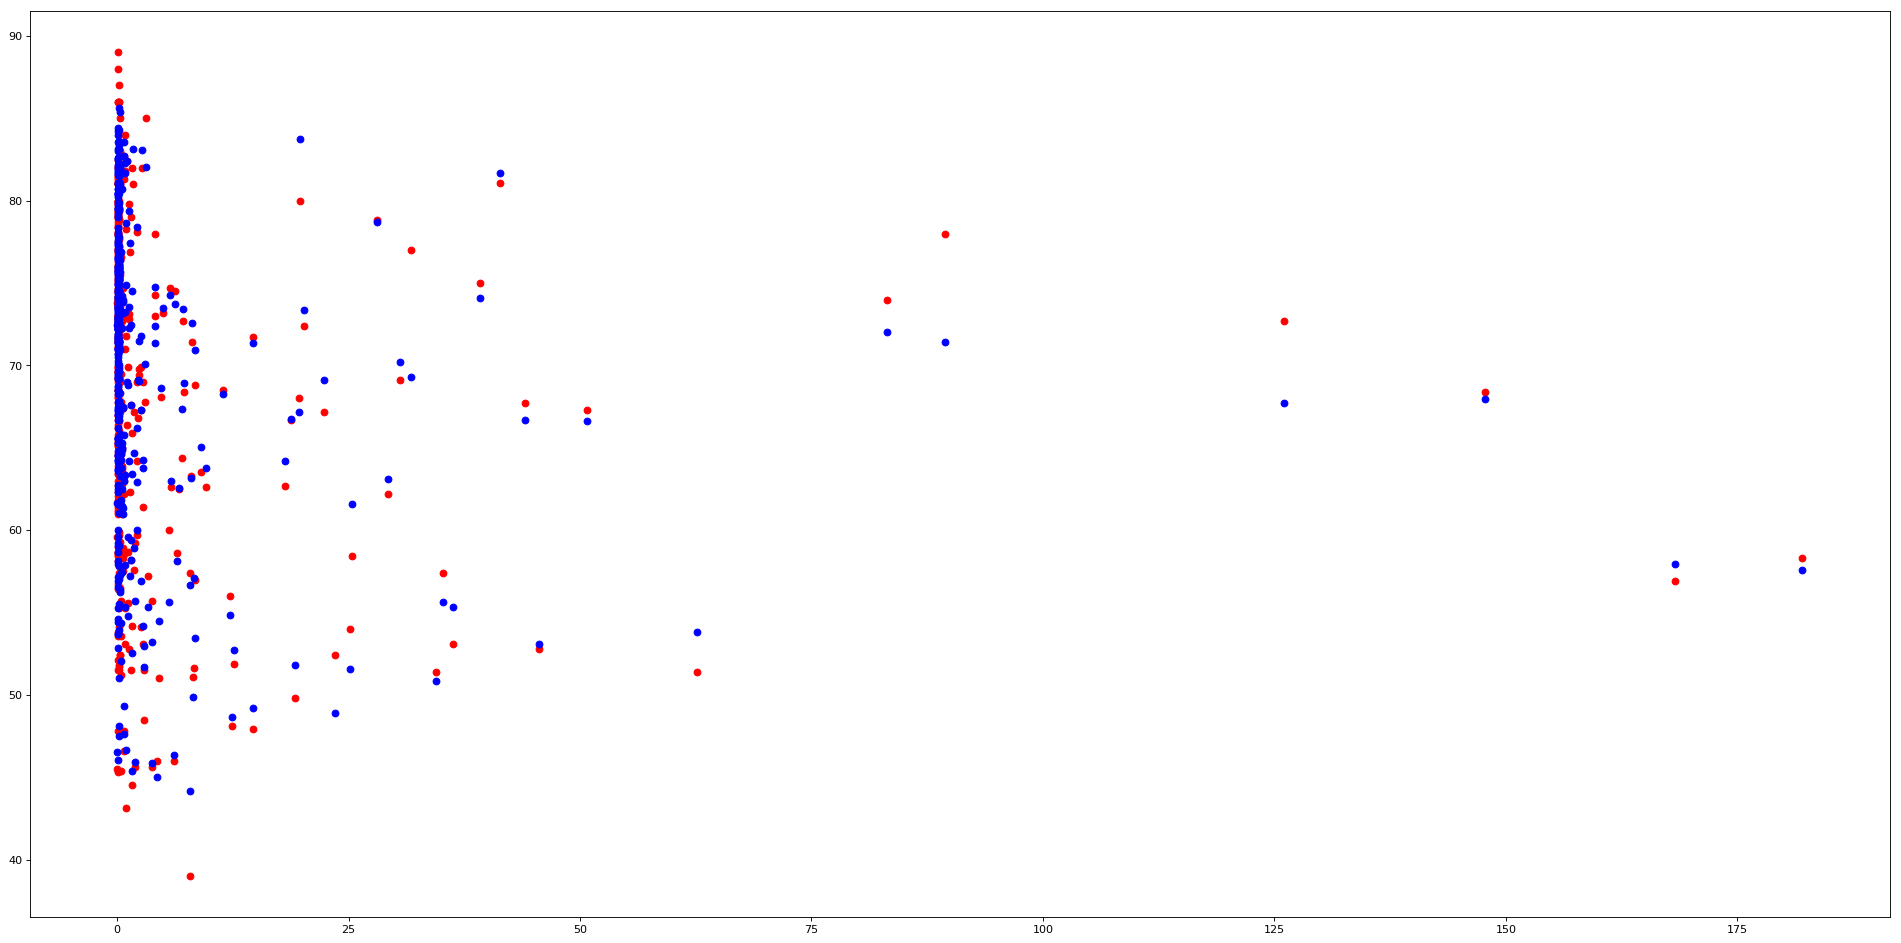

RandomForestRegressor {'criterion': 'mae', 'n_estimators': 5}
Mean squared error: 9.366931329694577
Variance: 0.8999039179062809
Coeficients for combinations between columns of power = 0 or 1 or 2 or 3 - (ex: a, b, c, a * b * c^3, c^3)
[0.0, 0.18028356832398978, 0.001426633616091776, 0.001676775436133512, 0.0006539348587985605, 0.006030852663017163, 0.0021049181918087936, 0.001970570684667188, 0.0035818679924408082, 0.009541050980162488, 0.0, 0.0024425387287611714, 0.014247871632632947, 0.0004120444486973065, 0.0027440030288336096, 0.01333285111332778, 0.0038010687514838963, 0.003963189535663184, 0.0011363196465935792, 0.3914576388362236, 0.0007521889633519749, 0.000328952509424533, 0.0036735302551157136, 0.0011576141302683158, 0.004091795399161702, 0.002588893118150639, 0.0030181454570027875, 0.0023524620507101913, 0.0008189829958991417, 0.002314859931612417, 0.0009082727570161375, 0.0023865880522316836, 0.0023282461211378905, 0.0009867290547695092, 0.0015489989054508295, 0.0004252100

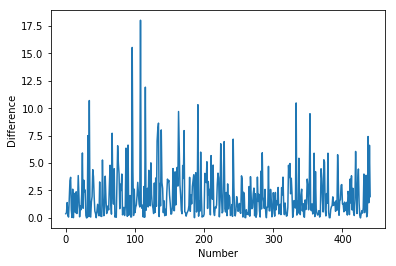

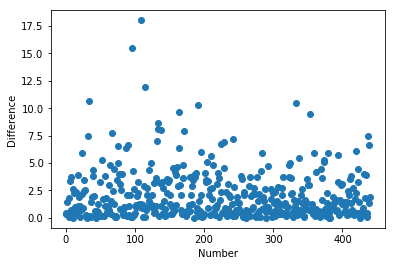

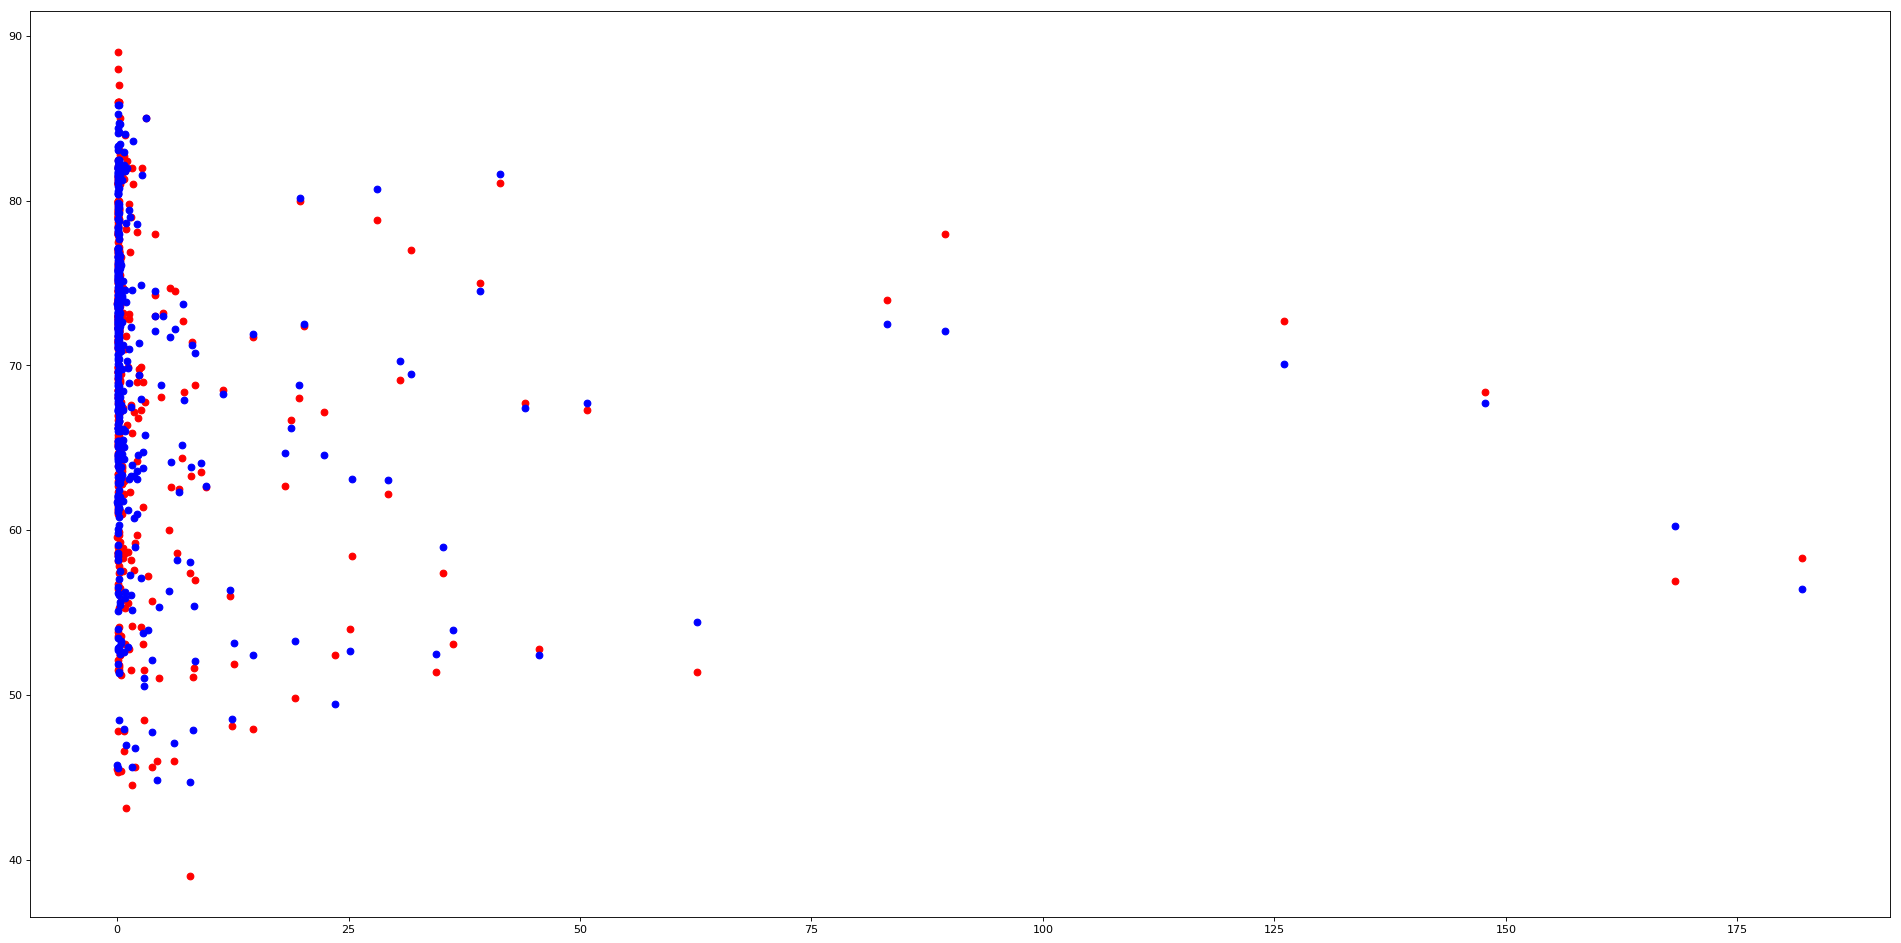

RandomForestRegressor {'criterion': 'mae', 'n_estimators': 20}
Mean squared error: 7.781443651220094
Variance: 0.916846617626952
Coeficients for combinations between columns of power = 0 or 1 or 2 or 3 - (ex: a, b, c, a * b * c^3, c^3)
[0.0, 0.1681470483754435, 0.003462054955067625, 0.0012393465766942758, 0.0005542879173067065, 0.0070087199300052595, 0.004387548852810814, 0.0024298549099929993, 0.002031535859792762, 0.0021346521150281987, 0.0, 0.0017675849902258074, 0.010384265970168048, 0.0005555475936026209, 0.003048968586655194, 0.00688912213862812, 0.00329778712018427, 0.00582238471439029, 0.0021201720588003995, 0.38559113214072144, 0.0015035627060783685, 0.0006274782741365343, 0.003774292039974718, 0.0022396281816388633, 0.001958616833787493, 0.0032304874630647135, 0.002386916203711683, 0.001303909404303629, 0.00048386737176206305, 0.0017493827045590407, 0.001604253139399286, 0.0022133830713042526, 0.0016505652964851382, 0.0013639277379933511, 0.0014251368941500535, 0.000480219380

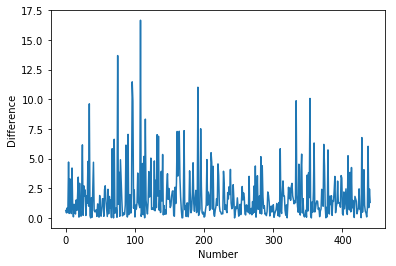

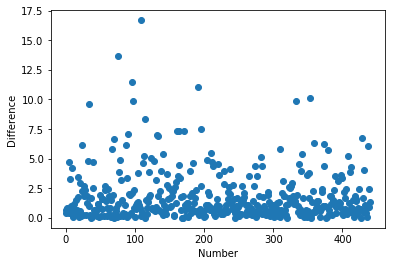

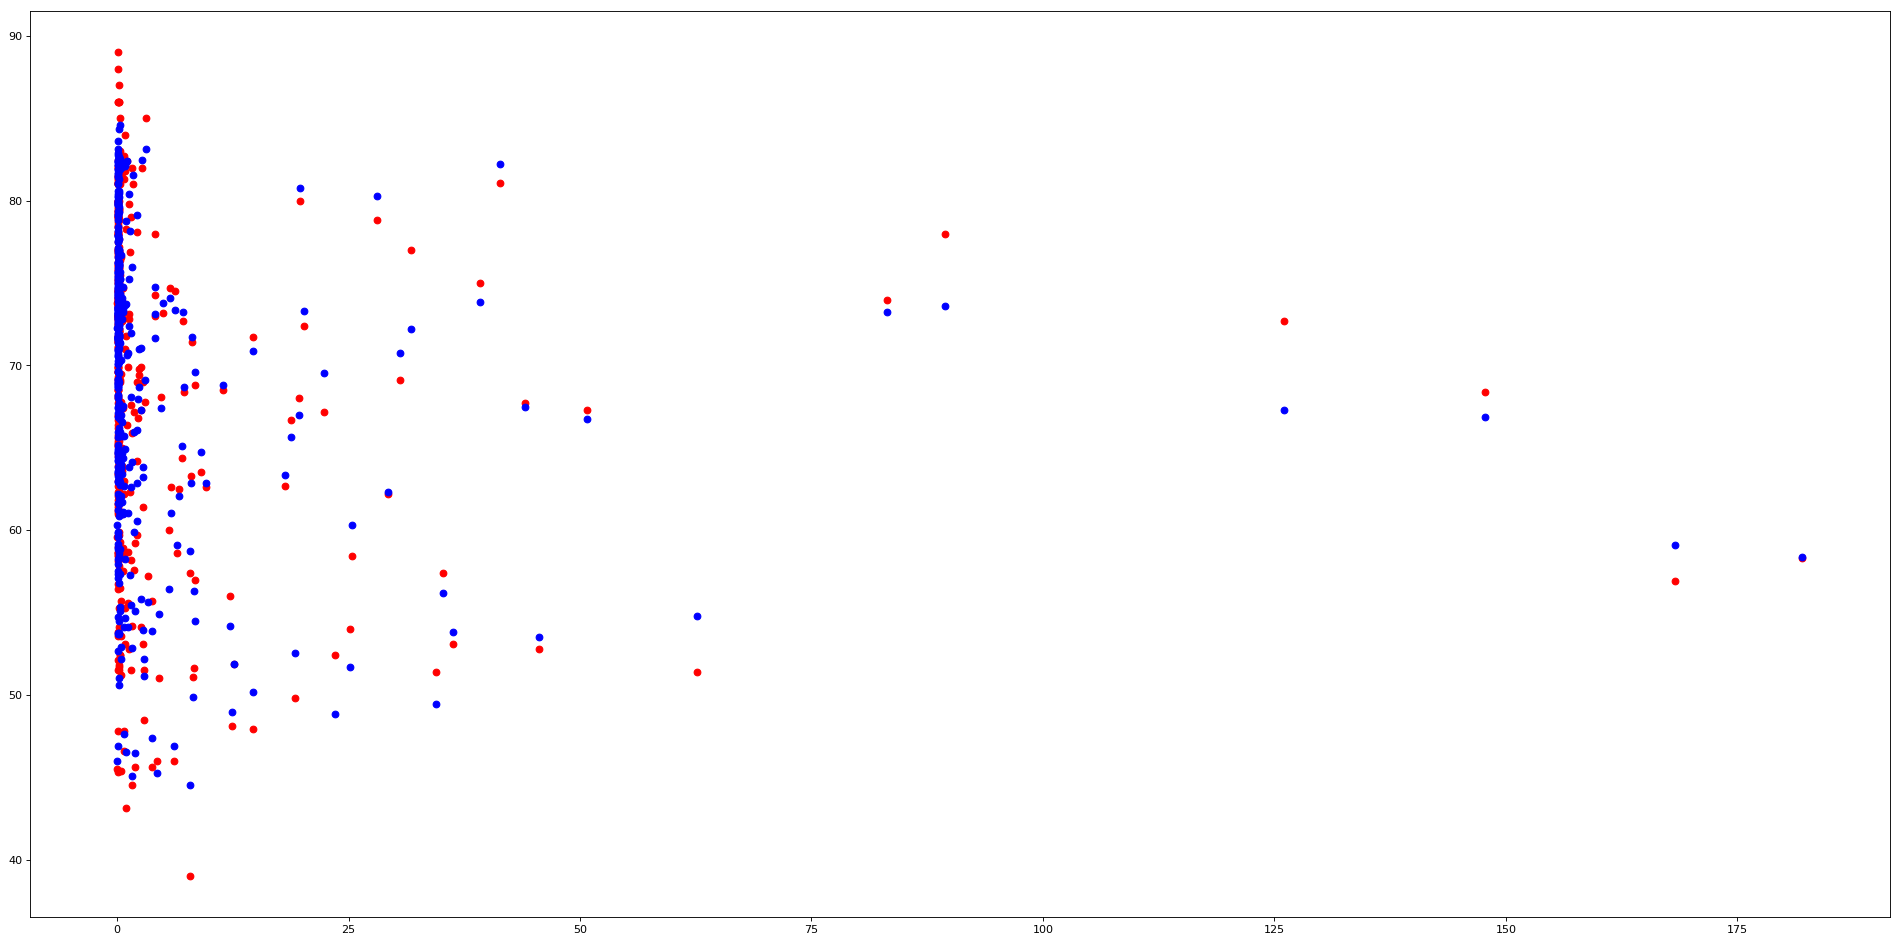

RandomForestRegressor {'criterion': 'mae', 'n_estimators': 50}
Mean squared error: 7.840880888834024
Variance: 0.9162114646183283
Coeficients for combinations between columns of power = 0 or 1 or 2 or 3 - (ex: a, b, c, a * b * c^3, c^3)
[0.0, 0.1767284536026671, 0.0033491277893565267, 0.0018690827541675602, 0.000525399386665465, 0.00957684237904367, 0.00327503543790613, 0.002359667479199608, 0.00647712039687688, 0.009447829662381346, 1.0729052176952116e-07, 0.002561638876219522, 0.0076616007051984155, 0.0005778956635147411, 0.0032271038260389883, 0.014109735434754099, 0.0025874873004114703, 0.0057332366871004755, 0.0015776907424014568, 0.37904524763266534, 0.001670293748276473, 0.0003873788223602017, 0.002191763483525481, 0.0020568672987405314, 0.002478587557073455, 0.002363526400282152, 0.0023520327972332993, 0.0020532997397762114, 0.0008701875653603204, 0.002203193845099167, 0.0015405649976237515, 0.0018436148275607067, 0.0014575232083365128, 0.001712435555735795, 0.00135407506402635

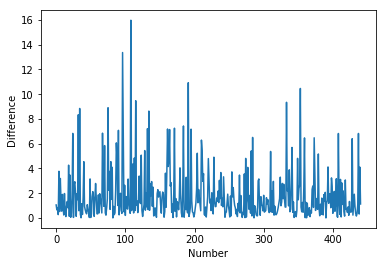

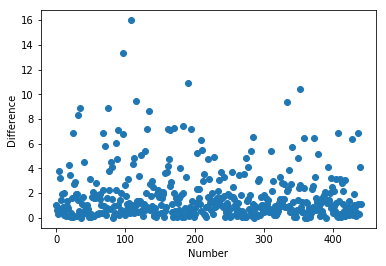

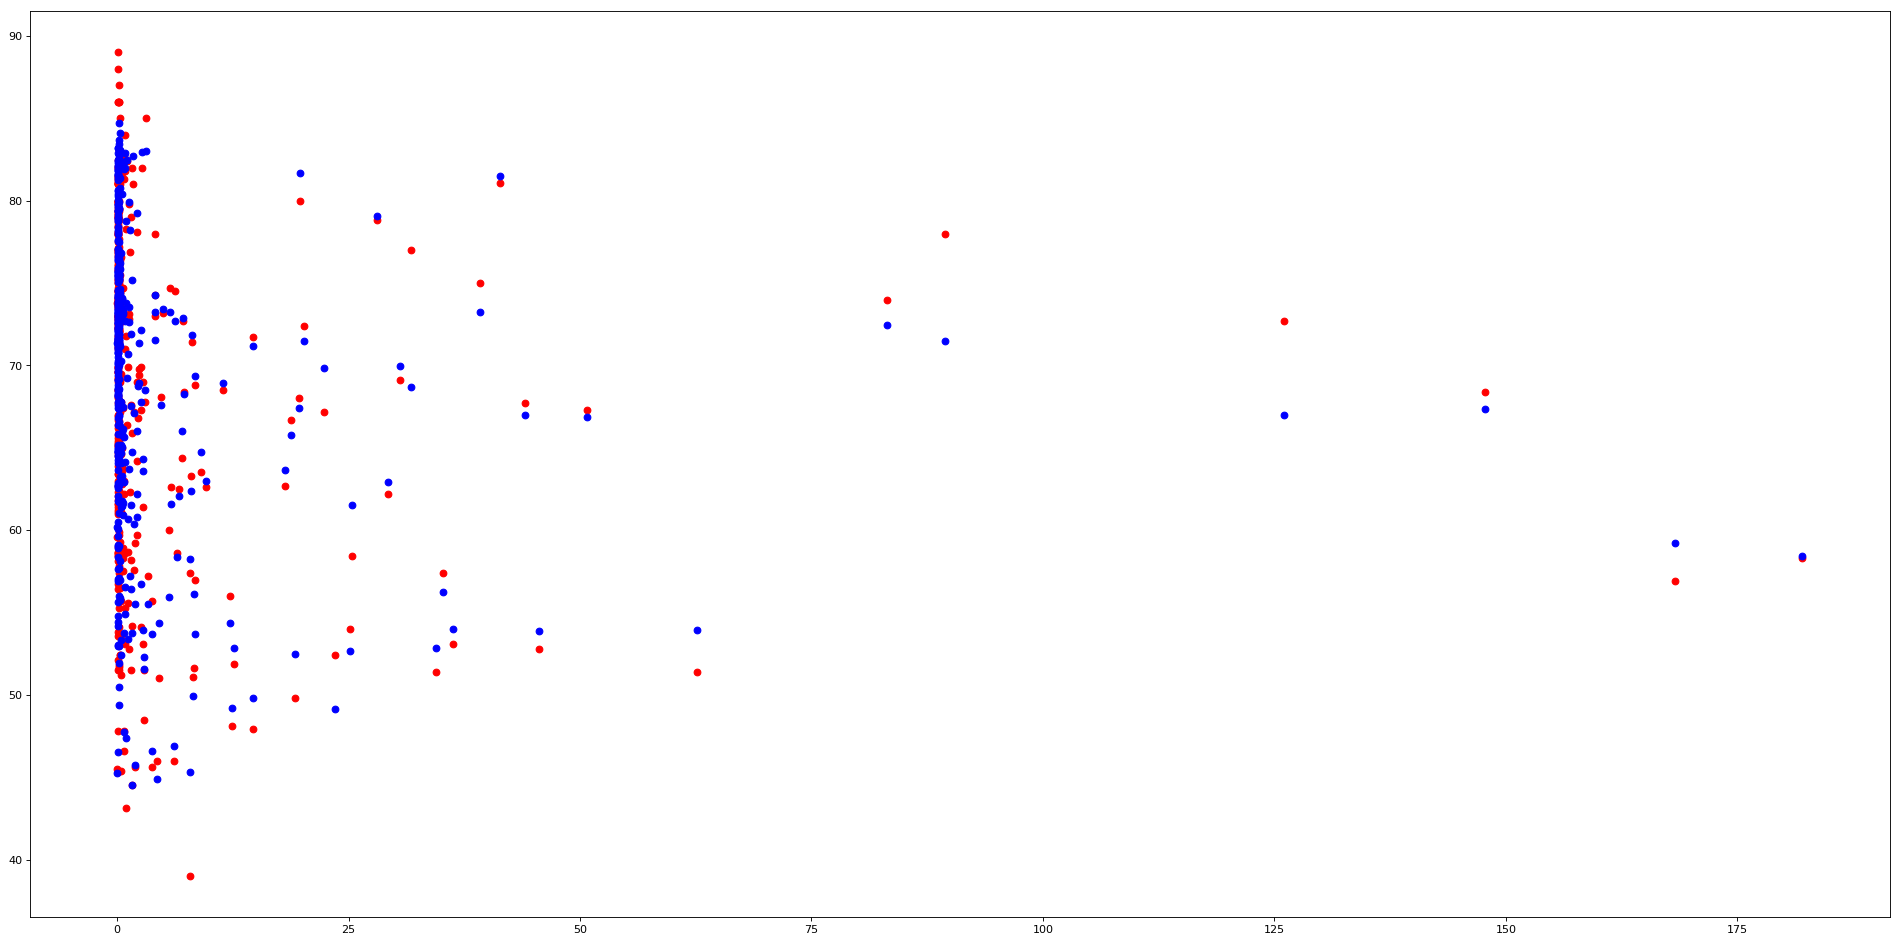

RandomForestRegressor {'criterion': 'mae', 'n_estimators': 100}
Mean squared error: 7.398025746208656
Variance: 0.9209438644995281
Coeficients for combinations between columns of power = 0 or 1 or 2 or 3 - (ex: a, b, c, a * b * c^3, c^3)
[0.0, 0.1698558872455099, 0.003656777294993539, 0.0014827244095223311, 0.0005308895494669085, 0.006732624256738306, 0.0028084617501714887, 0.0025581519386500516, 0.004220007696536034, 0.006615437728874821, 6.501218729232839e-06, 0.002597276529723204, 0.007893495712433186, 0.0005141380579494957, 0.0031714502217257295, 0.01239410415740338, 0.0026738315482513334, 0.006586682763910165, 0.0018286448604157388, 0.38587331242393175, 0.0016416305816465305, 0.0005243975337715848, 0.0027656851776255427, 0.001927207371600233, 0.0024817485232615935, 0.0032021339205021704, 0.0017806025186347316, 0.00200747767002557, 0.0006610676492627657, 0.0021427594951795395, 0.0015524031072001864, 0.0020779131877548995, 0.0017713344741682778, 0.0011560667742093796, 0.001376635666

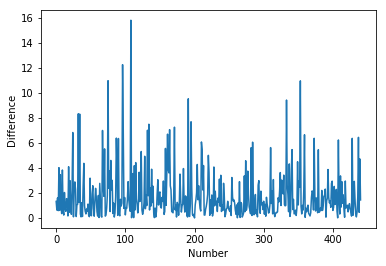

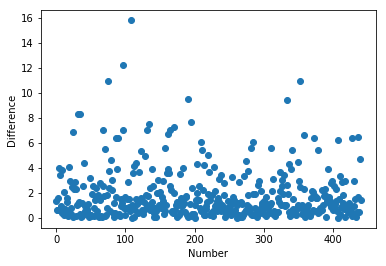

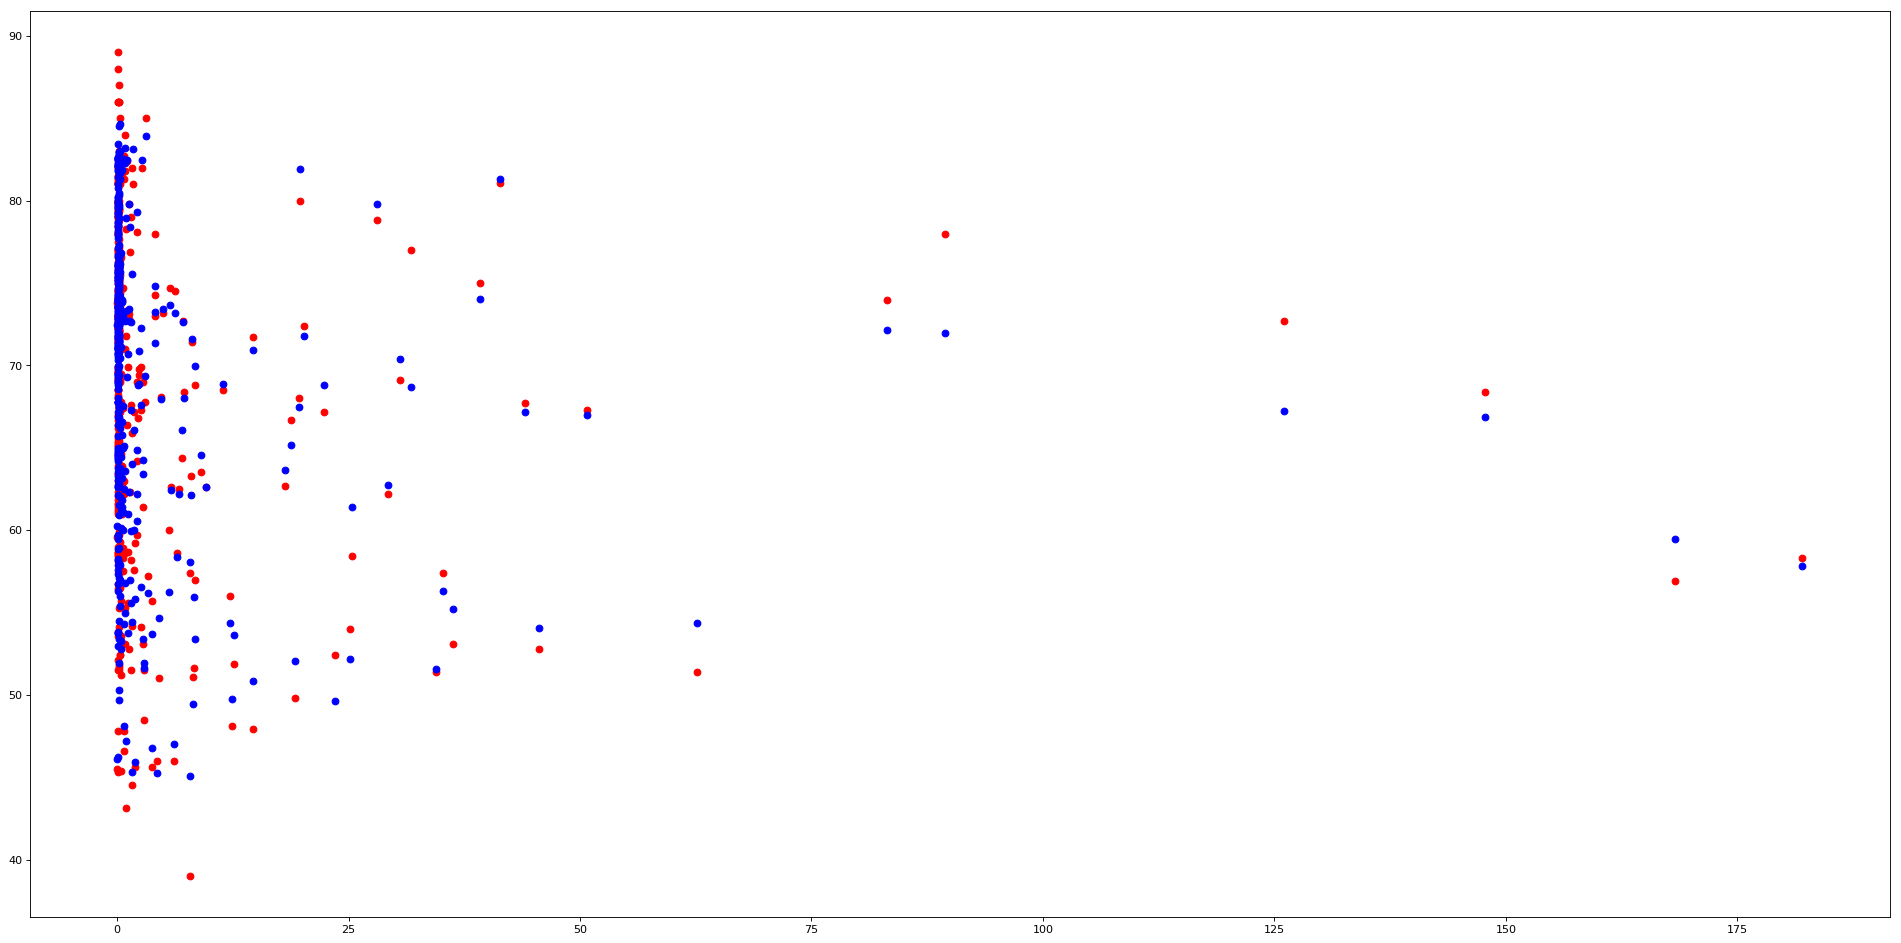

In [0]:
random_forest_regressor_models = [
    (RandomForestRegressor, {}),
    (RandomForestRegressor, {"n_estimators" : 5}),
    (RandomForestRegressor, {"n_estimators" : 20}),
    (RandomForestRegressor, {"n_estimators" : 50}),
    (RandomForestRegressor, {"n_estimators" : 100}),
    (RandomForestRegressor, {"n_estimators" : 150}),
    (RandomForestRegressor, {"n_estimators" : 200}),
    (RandomForestRegressor, {"criterion": "mae"}),
    (RandomForestRegressor, {"criterion": "mae", "n_estimators" : 5}),
    (RandomForestRegressor, {"criterion": "mae", "n_estimators" : 20}),
    (RandomForestRegressor, {"criterion": "mae", "n_estimators" : 50}),
    (RandomForestRegressor, {"criterion": "mae", "n_estimators" : 100})
]

for i, (Model, kwargs) in enumerate(random_forest_regressor_models):
  model = Model(**kwargs)
  model.fit(X_train_poly, y_train)
  y_predicted = model.predict(X_test_poly)
  mse = mean_squared_error(y_test, y_predicted)
  variance = r2_score(y_test, y_predicted)

  print(Model.__name__, kwargs)
  print("Mean squared error:", mse)
  print("Variance:", r2_score(y_test, y_predicted))
  pretty_print_coeficients_poly_decision_tree(model)
  print("--------------------------------------------------------------------------------------------------------")
  print()
  
  plot_y_difference(y_test, y_predicted)
  plot_expected_and_trained_data(X_test_poly, y_test, y_predicted)